**Lecture des fichiers**

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import wfdb
import ast
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Cellule 2 : Importations (version compatible)
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack
import pywt  # pywavelets
import os
import warnings
warnings.filterwarnings('ignore')

print("✅ Toutes les bibliothèques sont importées")

print(f"PyWavelets version: {pywt.__version__}")

✅ Toutes les bibliothèques sont importées
PyWavelets version: 1.8.0


In [ ]:
PATH_TO_DATA = '/content/drive/MyDrive/ECG data/'
ECG_df = pd.read_csv(PATH_TO_DATA+ 'ptbxl_database.csv', index_col='ecg_id')
SCP_df = pd.read_csv(PATH_TO_DATA+ 'scp_statements.csv', index_col=0)
print (ECG_df.shape ,  SCP_df.shape)

(21837, 27) (71, 12)


In [ ]:
ECG_df.head()

patient_id   age  sex  height  weight  \
ecg_id                                          
1            15709  56.0    1     NaN    63.0   
2            13243  19.0    0     NaN    70.0   
3            20372  37.0    1     NaN    69.0   
4            17014  24.0    0     NaN    82.0   
5            17448  19.0    1     NaN    70.0   

                                        report  \
ecg_id                                           
1       sinusrhythmus periphere niederspannung   
2          sinusbradykardie sonst normales ekg   
3                   sinusrhythmus normales ekg   
4                   sinusrhythmus normales ekg   
5                   sinusrhythmus normales ekg   

                                       scp_codes heart_axis  \
ecg_id                                                        
1       {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}        NaN   
2                   {'NORM': 80.0, 'SBRAD': 0.0}        NaN   
3                     {'NORM': 100.0, 'SR': 0.0}        NaN   
4                     {'NORM': 100.0, 'SR': 0.0}        NaN   
5                     {'NORM': 100.0, 'SR': 0.0}        NaN   

       infarction_stadium1 infarction_stadium2  baseline_drift static_noise  \
ecg_id                                                                        
1                      NaN                 NaN             NaN    , I-V1,     
2                      NaN                 NaN             NaN          NaN   
3                      NaN                 NaN             NaN          NaN   
4                      NaN                 NaN    , II,III,AVF          NaN   
5                      NaN                 NaN   , III,AVR,AVF          NaN   

       burst_noise electrodes_problems extra_beats pacemaker  strat_fold  \
ecg_id                                                                     
1              NaN                 NaN         NaN       NaN           3   
2              NaN                 NaN         NaN       NaN           2   
3              NaN                 NaN         NaN       NaN           5   
4              NaN                 NaN         NaN       NaN           3   
5              NaN                 NaN         NaN       NaN           4   

                      filename_lr scp_classes  
ecg_id                                         
1       records100/00000/00001_lr      [NORM]  
2       records100/00000/00002_lr      [NORM]  
3       records100/00000/00003_lr      [NORM]  
4       records100/00000/00004_lr      [NORM]  
5       records100/00000/00005_lr      [NORM]

In [ ]:
SCP_df = SCP_df[SCP_df.diagnostic == 1]
SCP_df.shape

(44, 12)

In [ ]:
SCP_df.head

<bound method NDFrame.head of                                                description  diagnostic  form  \
NDT                         non-diagnostic T abnormalities         1.0   1.0   
NST_                               non-specific ST changes         1.0   1.0   
DIG                                       digitalis-effect         1.0   1.0   
LNGQT                                     long QT-interval         1.0   1.0   
NORM                                            normal ECG         1.0   NaN   
IMI                         inferior myocardial infarction         1.0   NaN   
ASMI                    anteroseptal myocardial infarction         1.0   NaN   
LVH                           left ventricular hypertrophy         1.0   NaN   
LAFB                        left anterior fascicular block         1.0   NaN   
ISC_                                 non-specific ischemic         1.0   NaN   
IRBBB                 incomplete right bundle branch block         1.0   NaN   
1AVB                                 first degree AV block         1.0   NaN   
IVCD     non-specific intraventricular conduction distu...         1.0   NaN   
ISCAL                      ischemic in anterolateral leads         1.0   NaN   
CRBBB                   complete right bundle branch block         1.0   NaN   
CLBBB                    complete left bundle branch block         1.0   NaN   
ILMI                   inferolateral myocardial infarction         1.0   NaN   
LAO/LAE                   left atrial overload/enlargement         1.0   NaN   
AMI                         anterior myocardial infarction         1.0   NaN   
ALMI                   anterolateral myocardial infarction         1.0   NaN   
ISCIN                           ischemic in inferior leads         1.0   NaN   
INJAS          subendocardial injury in anteroseptal leads         1.0   NaN   
LMI                          lateral myocardial infarction         1.0   NaN   
ISCIL                      ischemic in inferolateral leads         1.0   NaN   
LPFB                       left posterior fascicular block         1.0   NaN   
ISCAS                       ischemic in anteroseptal leads         1.0   NaN   
INJAL         subendocardial injury in anterolateral leads         1.0   NaN   
ISCLA                            ischemic in lateral leads         1.0   NaN   
RVH                          right ventricular hypertrophy         1.0   NaN   
ANEUR    ST-T changes compatible with ventricular aneurysm         1.0   NaN   
RAO/RAE                  right atrial overload/enlargement         1.0   NaN   
EL          electrolytic disturbance or drug (former EDIS)         1.0   NaN   
WPW                          Wolf-Parkinson-White syndrome         1.0   NaN   
ILBBB                  incomplete left bundle branch block         1.0   NaN   
IPLMI           inferoposterolateral myocardial infarction         1.0   NaN   
ISCAN                           ischemic in anterior leads         1.0   NaN   
IPMI                 inferoposterior myocardial infarction         1.0   NaN   
SEHYP                                   septal hypertrophy         1.0   NaN   
INJIN              subendocardial injury in inferior leads         1.0   NaN   
INJLA               subendocardial injury in lateral leads         1.0   NaN   
PMI                        posterior myocardial infarction         1.0   NaN   
3AVB                                 third degree AV block         1.0   NaN   
INJIL         subendocardial injury in inferolateral leads         1.0   NaN   
2AVB                                second degree AV block         1.0   NaN   

         rhythm diagnostic_class diagnostic_subclass  \
NDT         NaN             STTC                STTC   
NST_        NaN             STTC                NST_   
DIG         NaN             STTC                STTC   
LNGQT       NaN             STTC                STTC   
NORM        NaN             NORM                NORM   
IMI         NaN               MI 

**Mapping entre les codes SCP dans ECG_df et SCP_df**

In [ ]:
ECG_df['scp_codes']

ecg_id
1                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                             {'NORM': 80.0, 'SBRAD': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
5                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21833    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21834             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21835                           {'ISCAS': 50.0, 'SR': 0.0}
21836                           {'NORM': 100.0, 'SR': 0.0}
21837                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21837, dtype: object

In [ ]:

sampling_rate=100

ECG_df.scp_codes = ECG_df.scp_codes.apply(lambda x: ast.literal_eval(x)) # convertir les chaînes de caractères en dictionnaire python



In [ ]:
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_class)
    return list(res)

ECG_df['scp_classes'] = ECG_df.scp_codes.apply(diagnostic_class)
ECG_df['scp_classes']

ecg_id
1        [NORM]
2        [NORM]
3        [NORM]
4        [NORM]
5        [NORM]
          ...  
21833    [STTC]
21834    [NORM]
21835    [STTC]
21836    [NORM]
21837    [NORM]
Name: scp_classes, Length: 21837, dtype: object

In [ ]:
ECG_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21837 entries, 1 to 21837
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21837 non-null  int64  
 1   age                           21748 non-null  float64
 2   sex                           21837 non-null  int64  
 3   height                        6983 non-null   float64
 4   weight                        9429 non-null   float64
 5   nurse                         20328 non-null  Int64  
 6   site                          21819 non-null  Int64  
 7   device                        21837 non-null  object 
 8   recording_date                21837 non-null  object 
 9   report                        21837 non-null  object 
 10  scp_codes                     21837 non-null  object 
 11  heart_axis                    13332 non-null  object 
 12  infarction_stadium1           5626 non-null   object 
 13  infarc

In [ ]:
ECG_df.patient_id = ECG_df.patient_id.astype(int)
ECG_df.nurse = ECG_df.nurse.astype('Int64')
ECG_df.site = ECG_df.site.astype('Int64')
ECG_df.validated_by = ECG_df.validated_by.astype('Int64')

ECG_df.shape

(21837, 28)

In [ ]:
ECG_df=ECG_df.drop('nurse' , axis=1)
ECG_df=ECG_df.drop('site' , axis=1)
ECG_df=ECG_df.drop('filename_hr' , axis=1)
ECG_df=ECG_df.drop('device' , axis=1)
ECG_df=ECG_df.drop('recording_date' , axis=1)
ECG_df=ECG_df.drop('second_opinion' , axis=1)
ECG_df=ECG_df.drop('validated_by' , axis=1)
ECG_df=ECG_df.drop('initial_autogenerated_report' , axis=1)
ECG_df=ECG_df.drop('validated_by_human' , axis=1)


ECG_df.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'report', 'scp_codes',
       'heart_axis', 'infarction_stadium1', 'infarction_stadium2',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'scp_classes'],
      dtype='object')

**Chargement des données des signaux**

In [ ]:
import zipfile

import os
with zipfile.ZipFile('/content/drive/MyDrive/ECG data/records100.zip', 'r') as z:
    # 2. Lister les fichiers dans le ZIP
    print("Fichiers dans le ZIP:")
    files = [f for f in z.namelist() ]

    for file in files:
        print(f" - {file}")

    print(f"\n✅ {len(files)} fichier(s) CSV trouvé(s)")

Fichiers dans le ZIP:
 - records100/
 - records100/00000/
 - records100/00000/00001_lr.dat
 - records100/00000/00001_lr.hea
 - records100/00000/00002_lr.dat
 - records100/00000/00002_lr.hea
 - records100/00000/00003_lr.dat
 - records100/00000/00003_lr.hea
 - records100/00000/00004_lr.dat
 - records100/00000/00004_lr.hea
 - records100/00000/00005_lr.dat
 - records100/00000/00005_lr.hea
 - records100/00000/00006_lr.dat
 - records100/00000/00006_lr.hea
 - records100/00000/00007_lr.dat
 - records100/00000/00007_lr.hea
 - records100/00000/00008_lr.dat
 - records100/00000/00008_lr.hea
 - records100/00000/00009_lr.dat
 - records100/00000/00009_lr.hea
 - records100/00000/00010_lr.dat
 - records100/00000/00010_lr.hea
 - records100/00000/00011_lr.dat
 - records100/00000/00011_lr.hea
 - records100/00000/00012_lr.dat
 - records100/00000/00012_lr.hea
 - records100/00000/00013_lr.dat
 - records100/00000/00013_lr.hea
 - records100/00000/00014_lr.dat
 - records100/00000/00014_lr.hea
 - records100/0000

In [ ]:
def load_ecg_fast(zip_path, df, n_files=100):
    """
    Version rapide pour Google Colab
    Extrait tout d'abord dans /tmp, puis charge
    """
    import zipfile
    import os
    import shutil
    from tqdm import tqdm

    # Dossier temporaire dans /tmp (plus rapide sur Colab)
    temp_dir = "/tmp/ecg_extracted"

    # Nettoyer si existe déjà
    if os.path.exists(temp_dir):
        shutil.rmtree(temp_dir)

    # Extraire tout le ZIP
    print(f"Extraction vers {temp_dir}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)

    print("Extraction terminée!")

    # Charger les fichiers
    all_signals = []
    filenames = df.filename_lr.head(n_files).tolist()

    print(f"\nChargement de {n_files} fichiers...")
    for filename in tqdm(filenames, desc="Lecture ECG"):
        clean_name = filename.replace('records100/', '').replace('_lr', '')
        record_path = os.path.join(temp_dir, 'records100', clean_name + '_lr')

        try:
            signals, fields = wfdb.rdsamp(record_path)
            all_signals.append(signals)
        except Exception as e:
            print(f"\nErreur {filename}: {e}")
            all_signals.append(None)

    # Nettoyer
    shutil.rmtree(temp_dir, ignore_errors=True)

    print(f"\nTerminé! {len([x for x in all_signals if x is not None])}/{n_files} chargés")
    return all_signals


ecg_signals = load_ecg_fast('/content/drive/MyDrive/ECG data/records100.zip', ECG_df, len(ECG_df))

Extraction vers /tmp/ecg_extracted...
Extraction terminée!

Chargement de 21837 fichiers...


Lecture ECG: 100%|██████████| 21837/21837 [01:08<00:00, 318.07it/s]



Terminé! 21837/21837 chargés


In [ ]:
type(ecg_signals)

list

In [ ]:
ecg_signals[0]

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]])

In [ ]:
ecg_signals[0].shape

(1000, 12)

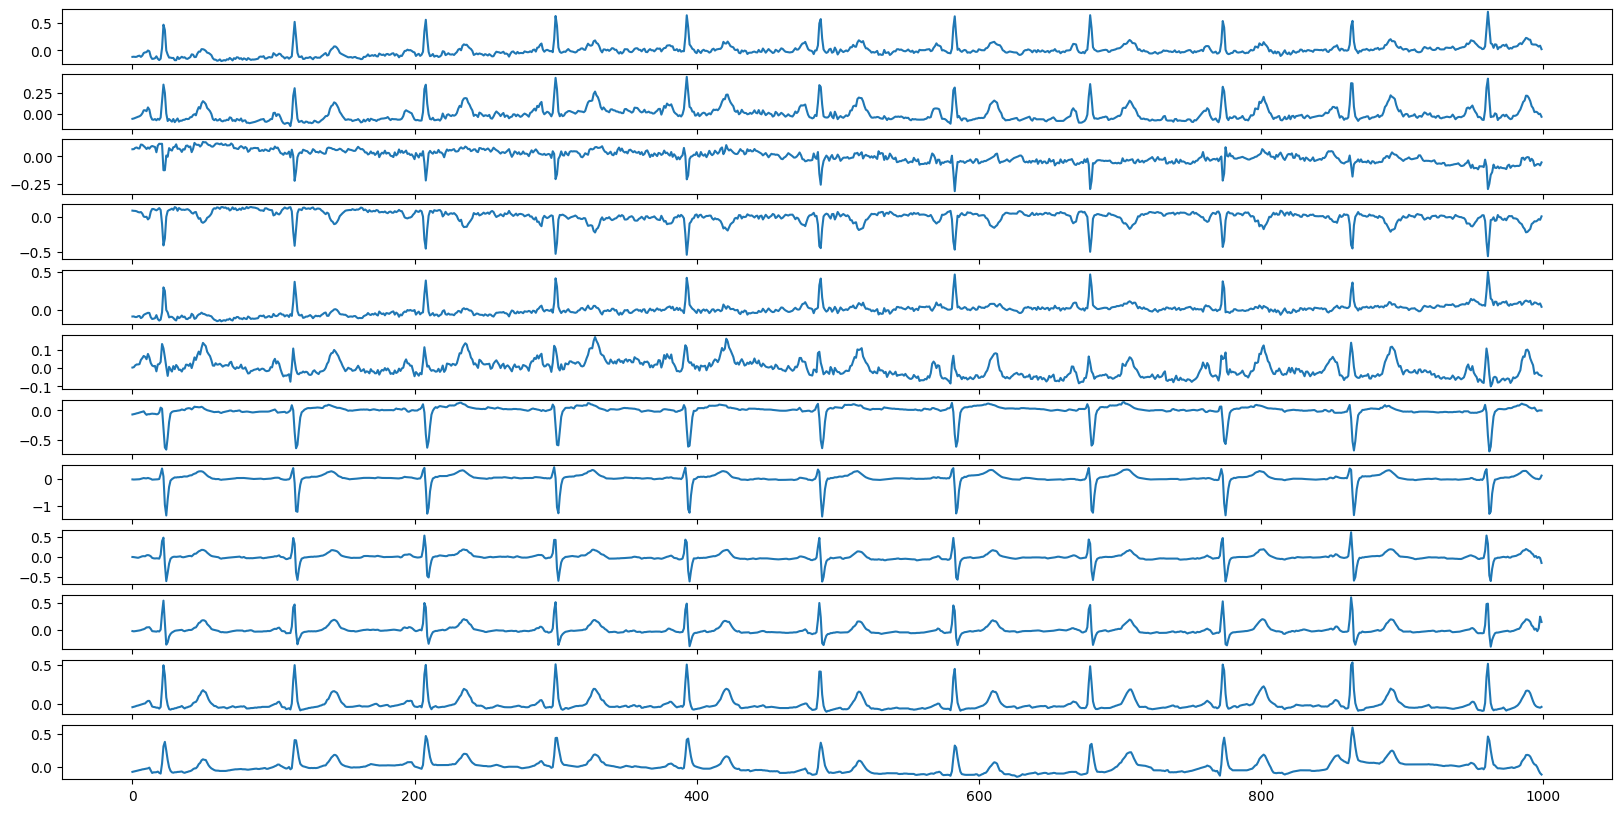

In [ ]:
sample = ecg_signals[0]
bar, axes = plt.subplots(sample.shape[1], 1, figsize=(20,10))
for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])
plt.show()

**EDA**

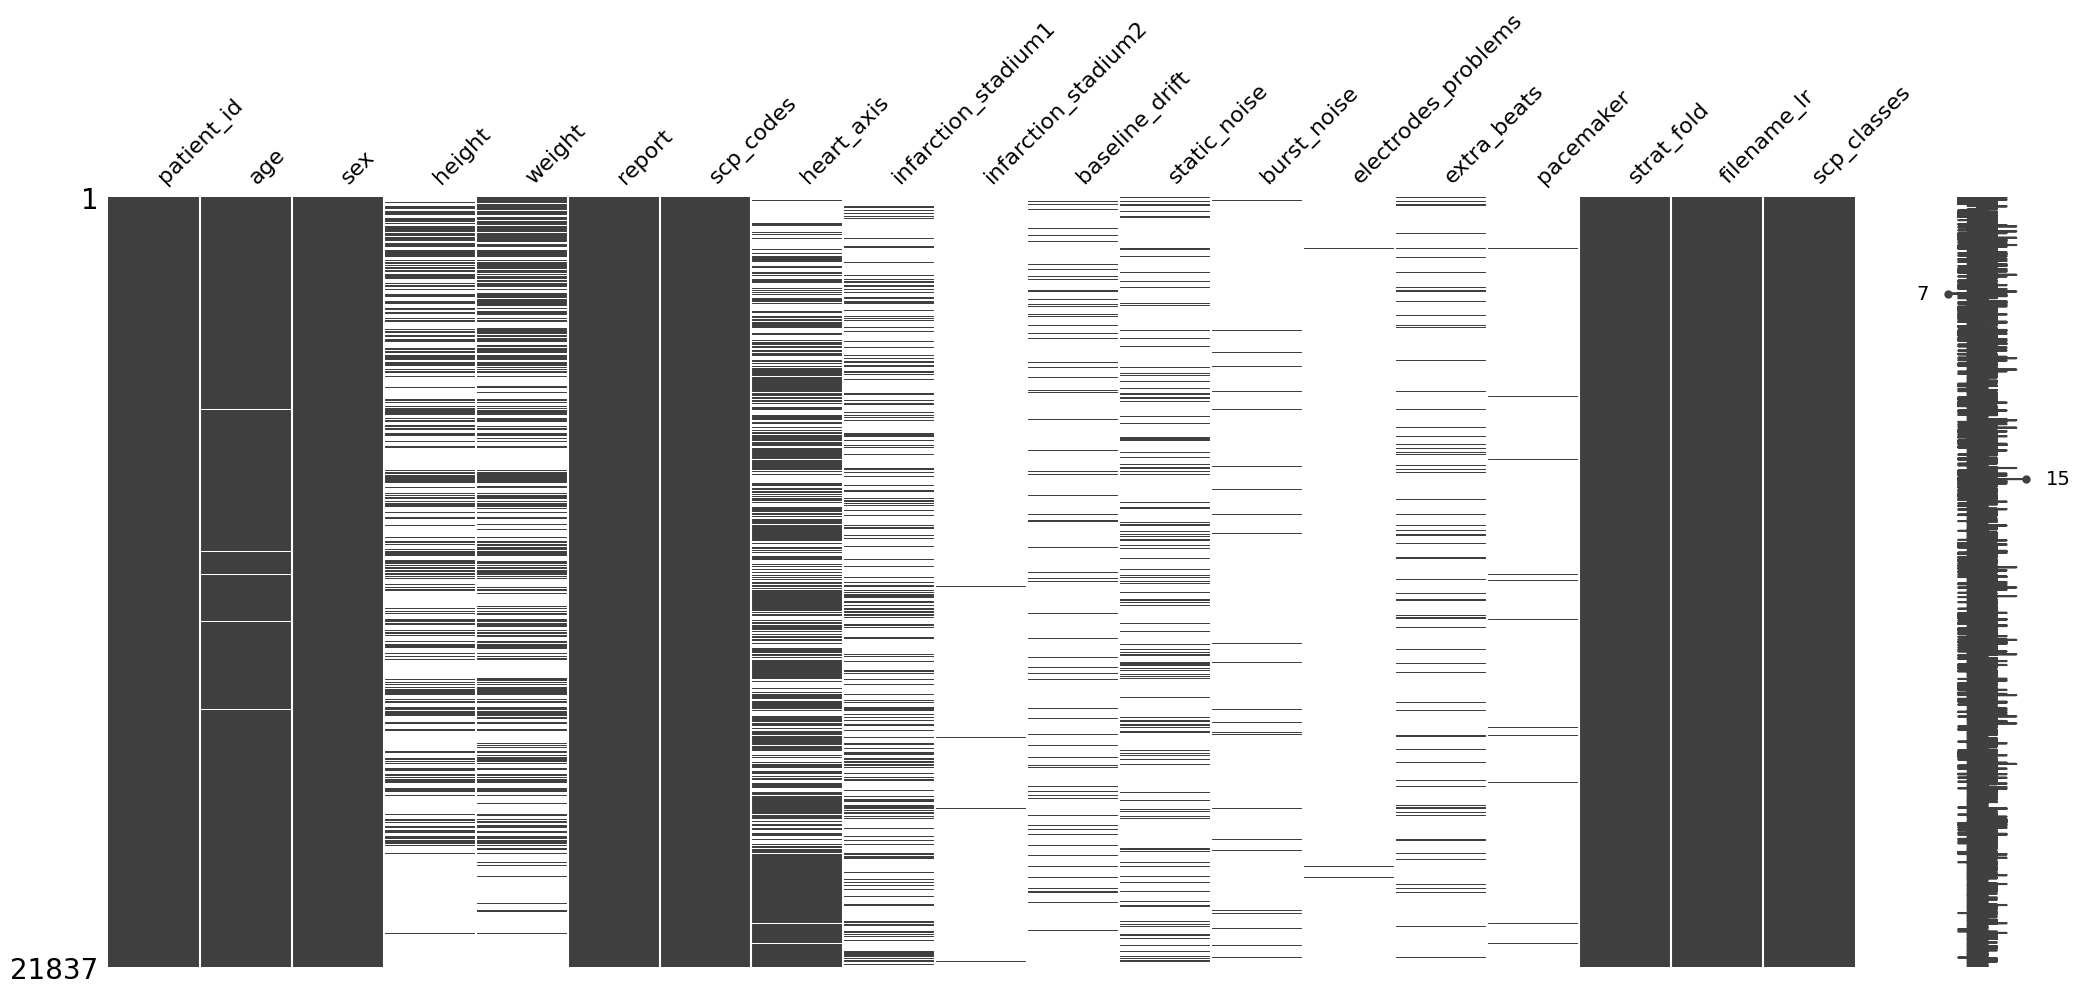

In [ ]:
import missingno as msno

msno.matrix(ECG_df) # missing values


plt.show()

In [ ]:
ECG_df['scp_classes'].value_counts()

scp_classes
[NORM]                 9083
[MI]                   2538
[STTC]                 2406
[CD]                   1709
[CD, MI]               1302
[HYP, STTC]             783
[MI, STTC]              602
[HYP]                   536
[CD, STTC]              472
[]                      407
[CD, NORM]              407
[MI, HYP, STTC]         362
[CD, HYP]               300
[CD, MI, STTC]          223
[CD, HYP, STTC]         211
[MI, HYP]               183
[CD, MI, HYP, STTC]     158
[CD, MI, HYP]           117
[STTC, NORM]             28
[CD, STTC, NORM]          5
[CD, HYP, NORM]           2
[HYP, NORM]               2
[CD, MI, HYP, NORM]       1
Name: count, dtype: int64

In [ ]:
ECG_df['scp_classes'] = ECG_df['scp_classes'].apply(lambda x: ['NORM'] if len(x) == 0 else x)


In [ ]:
Z = pd.DataFrame(0, index=ECG_df.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')
for i in Z.index:
    for k in ECG_df.loc[i].scp_classes:
        Z.loc[i, k] = 1

Z

NORM  MI  STTC  CD  HYP
ecg_id                         
1          1   0     0   0    0
2          1   0     0   0    0
3          1   0     0   0    0
4          1   0     0   0    0
5          1   0     0   0    0
...      ...  ..   ...  ..  ...
21833      0   0     1   0    0
21834      1   0     0   0    0
21835      0   0     1   0    0
21836      1   0     0   0    0
21837      1   0     0   0    0

[21837 rows x 5 columns]

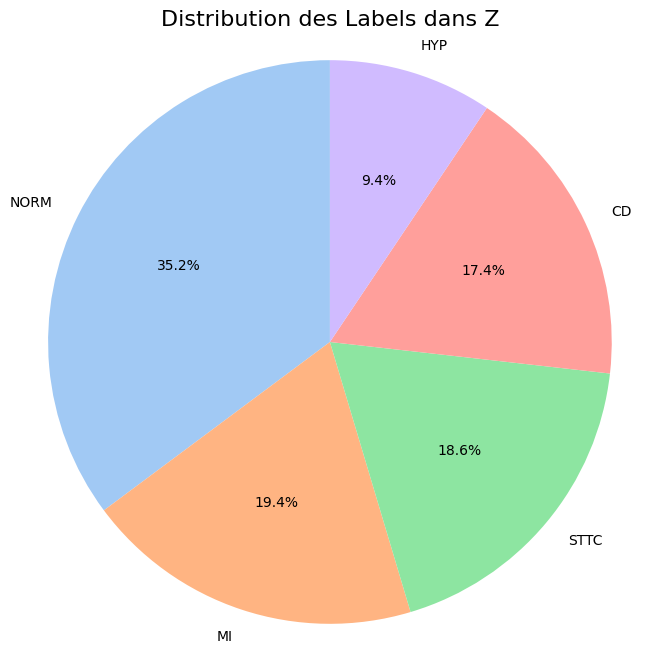

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of each label
label_counts = Z.sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution des Labels dans Z', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
ECG_df['sex_label'] = ECG_df['sex'].map({0: 'Female', 1: 'Male'})

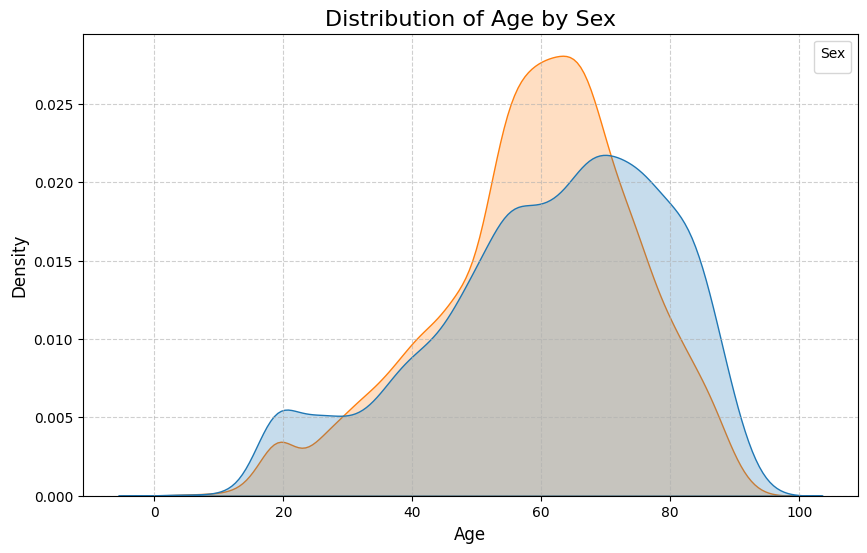

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ECG_df, x='age', hue='sex_label', fill=True, common_norm=False)
plt.title('Distribution of Age by Sex', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Sex')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

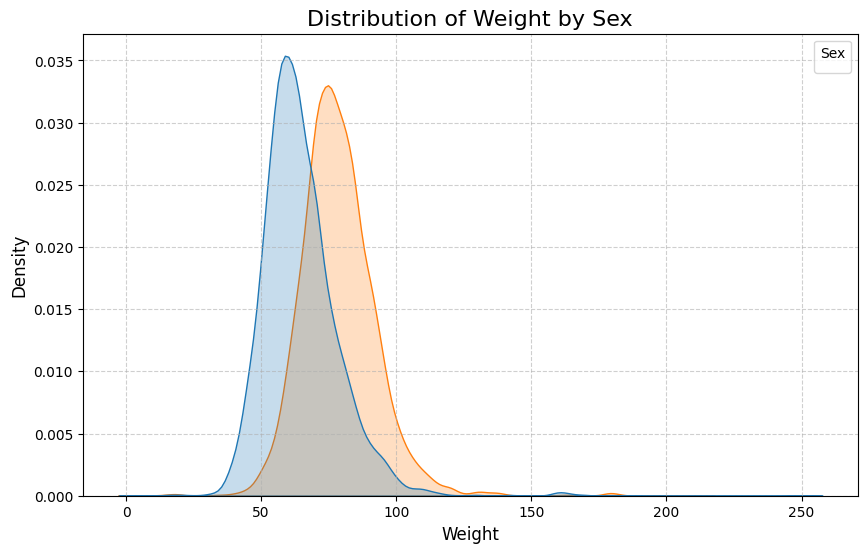

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ECG_df, x='weight', hue='sex_label', fill=True, common_norm=False)
plt.title('Distribution of Weight by Sex', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Sex')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

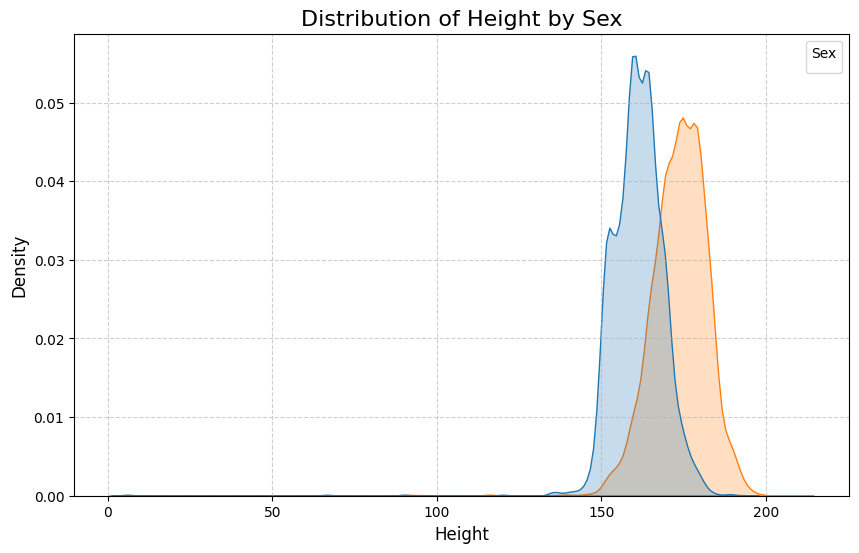

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ECG_df, x='height', hue='sex_label', fill=True, common_norm=False)
plt.title('Distribution of Height by Sex', fontsize=16)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Sex')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

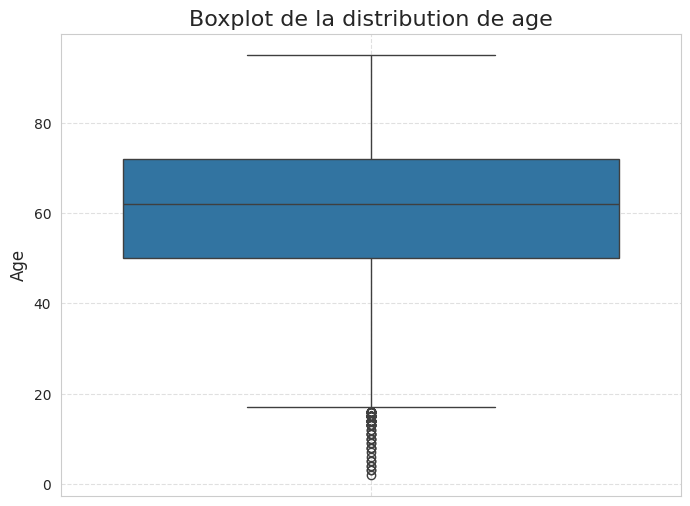

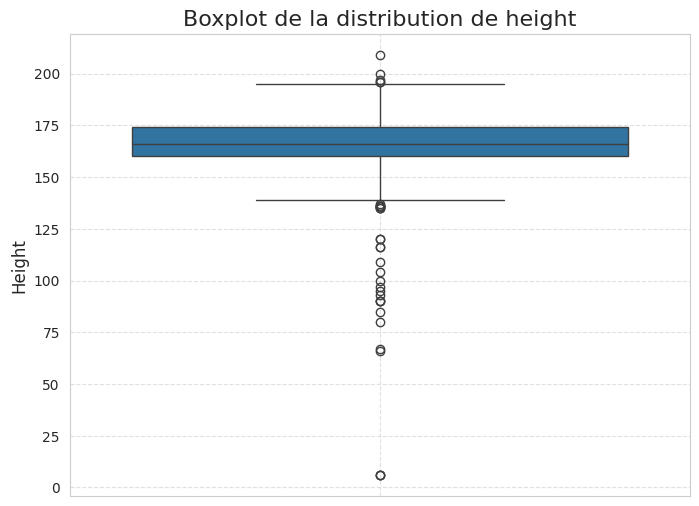

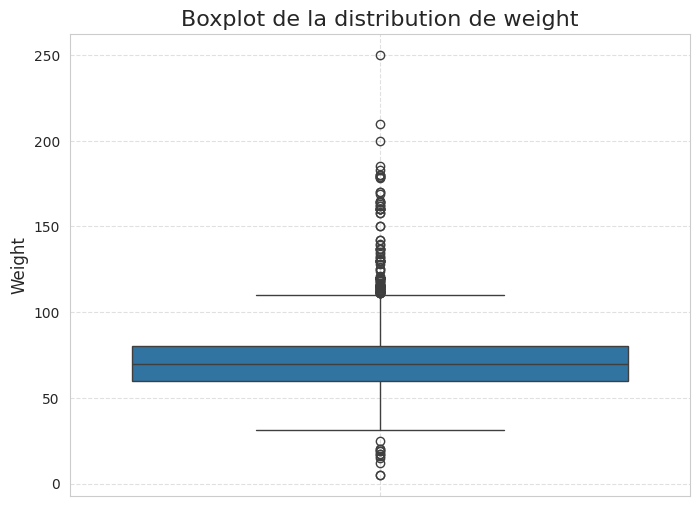

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['age', 'height', 'weight']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=ECG_df[feature])
    plt.title(f'Boxplot de la distribution de {feature}', fontsize=16)
    plt.ylabel(feature.capitalize(), fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


In [ ]:
df_merged = pd.concat([ECG_df[['age', 'height', 'weight', 'sex']], Z], axis=1)

# Calculate medians for imputation
median_age = df_merged['age'].median()
median_height = df_merged['height'].median()
median_weight = df_merged['weight'].median()

# Impute missing values with medians
df_merged['age'].fillna(median_age, inplace=True)
df_merged['height'].fillna(median_height, inplace=True)
df_merged['weight'].fillna(median_weight, inplace=True)

# Create binned columns
df_merged['age_binned'] = pd.cut(df_merged['age'], bins=np.arange(0, df_merged['age'].max() + 10, 10), right=False, labels=False)
df_merged['height_binned'] = pd.cut(df_merged['height'], bins=np.arange(0, df_merged['height'].max() + 10, 10), right=False, labels=False)
df_merged['weight_binned'] = pd.cut(df_merged['weight'], bins=np.arange(0, df_merged['weight'].max() + 10, 10), right=False, labels=False)

# Map 'sex' to descriptive labels
df_merged['sex_label'] = df_merged['sex'].map({0: 'Female', 1: 'Male'})

df_merged_corr = df_merged.corr(numeric_only=True)

print("Correlation matrix for df_merged created successfully.")
display(df_merged_corr.head())



Temporary DataFrame 'df_merged' created and preprocessed successfully.


age  height  weight  sex  NORM  MI  STTC  CD  HYP  age_binned  \
ecg_id                                                                   
1       56.0   166.0    63.0    1     1   0     0   0    0           5   
2       19.0   166.0    70.0    0     1   0     0   0    0           1   
3       37.0   166.0    69.0    1     1   0     0   0    0           3   
4       24.0   166.0    82.0    0     1   0     0   0    0           2   
5       19.0   166.0    70.0    1     1   0     0   0    0           1   

        height_binned  weight_binned sex_label  
ecg_id                                          
1                  16            6.0      Male  
2                  16            7.0    Female  
3                  16            6.0      Male  
4                  16            8.0    Female  
5                  16            7.0      Male

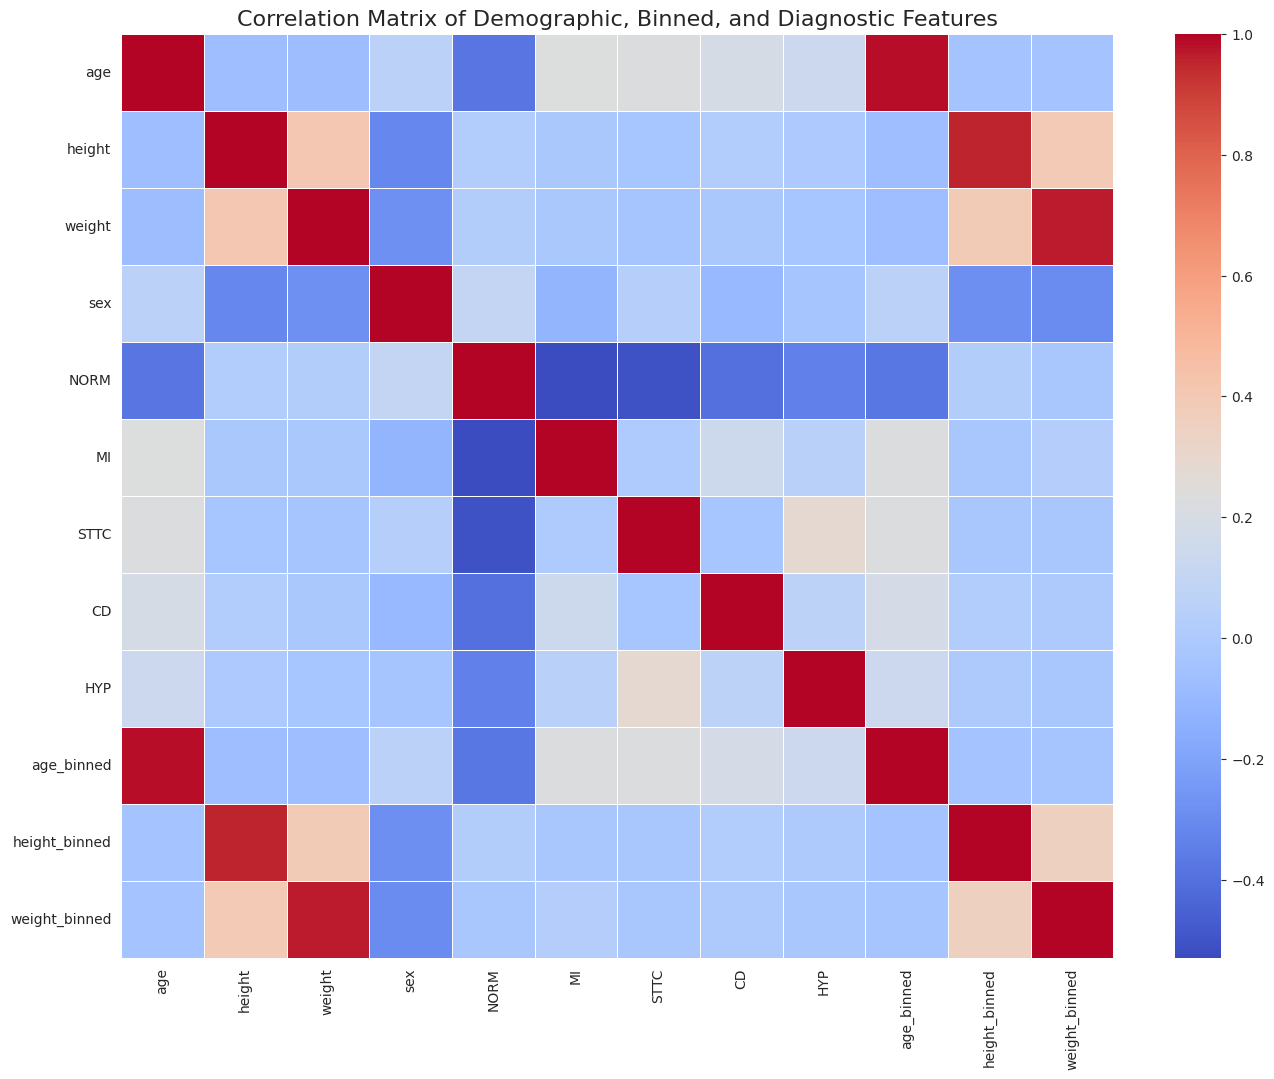

Heatmap of the correlation matrix generated successfully.


In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_merged_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Demographic, Binned, and Diagnostic Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

print("Heatmap of the correlation matrix generated successfully.")

Diagnostic classes: ['NORM', 'MI', 'STTC', 'CD', 'HYP']
Demographic feature combinations: [('age_binned', 'height_binned'), ('age_binned', 'weight_binned'), ('age_binned', 'sex_label'), ('height_binned', 'weight_binned'), ('height_binned', 'sex_label'), ('weight_binned', 'sex_label')]

Generating heatmaps for diagnostic class: NORM
  - Visualizing NORM by age_binned and height_binned


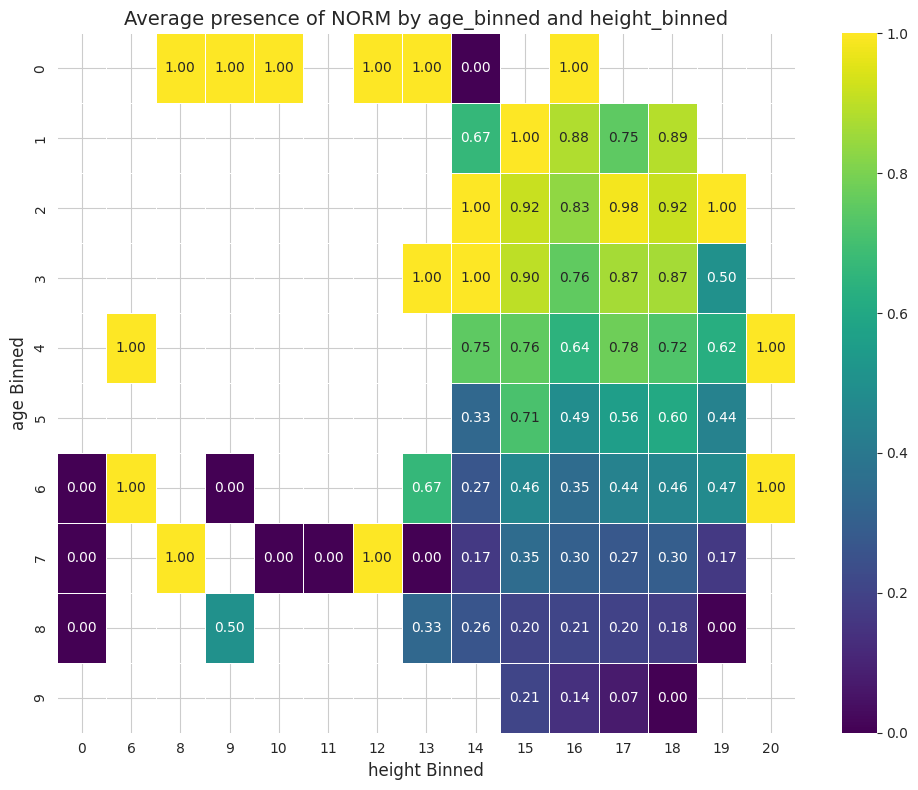

  - Visualizing NORM by age_binned and weight_binned


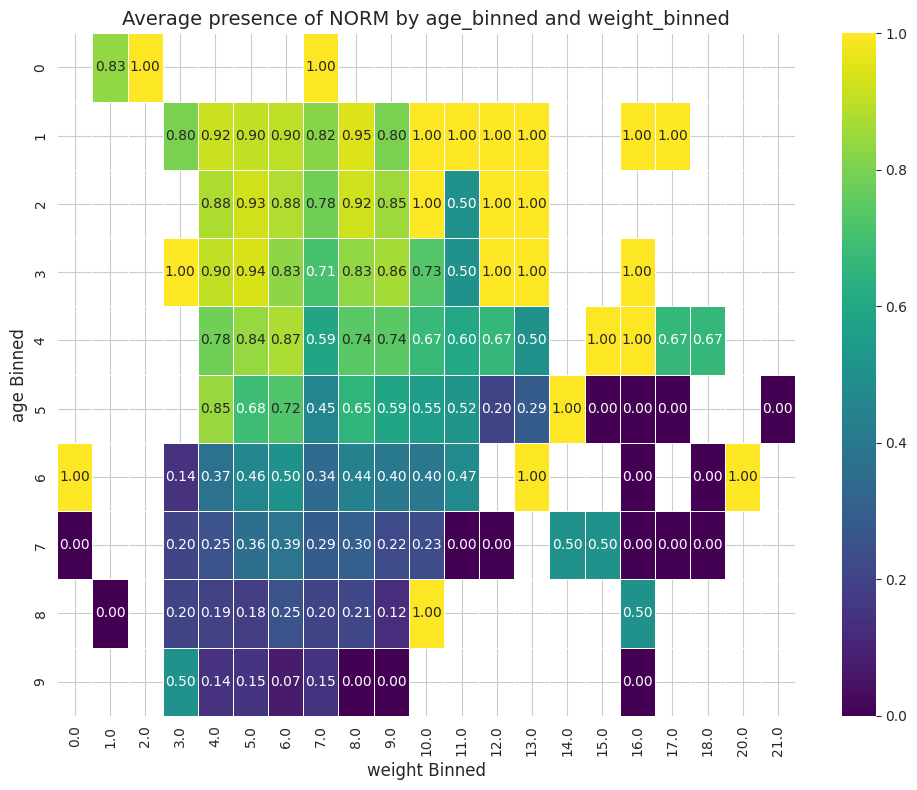

  - Visualizing NORM by age_binned and sex_label


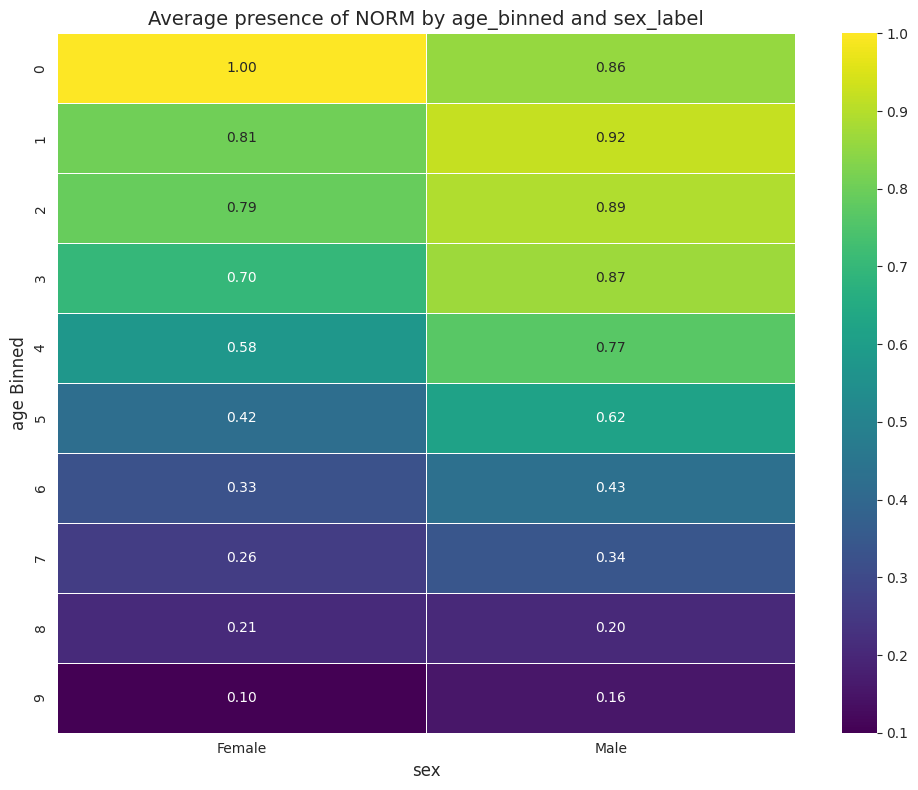

  - Visualizing NORM by height_binned and weight_binned


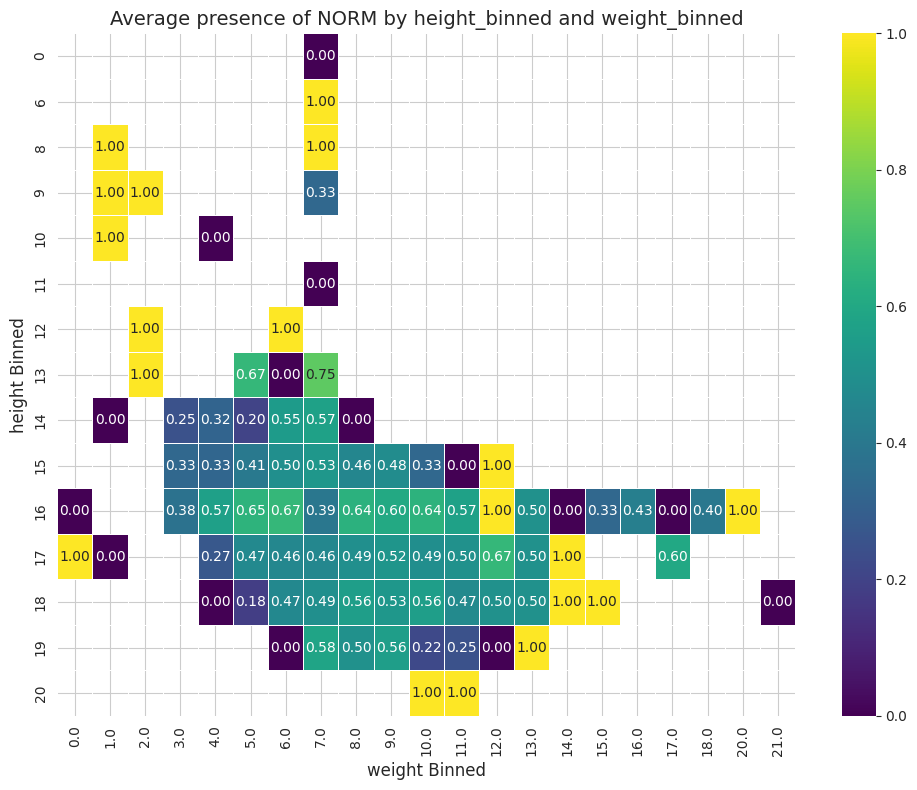

  - Visualizing NORM by height_binned and sex_label


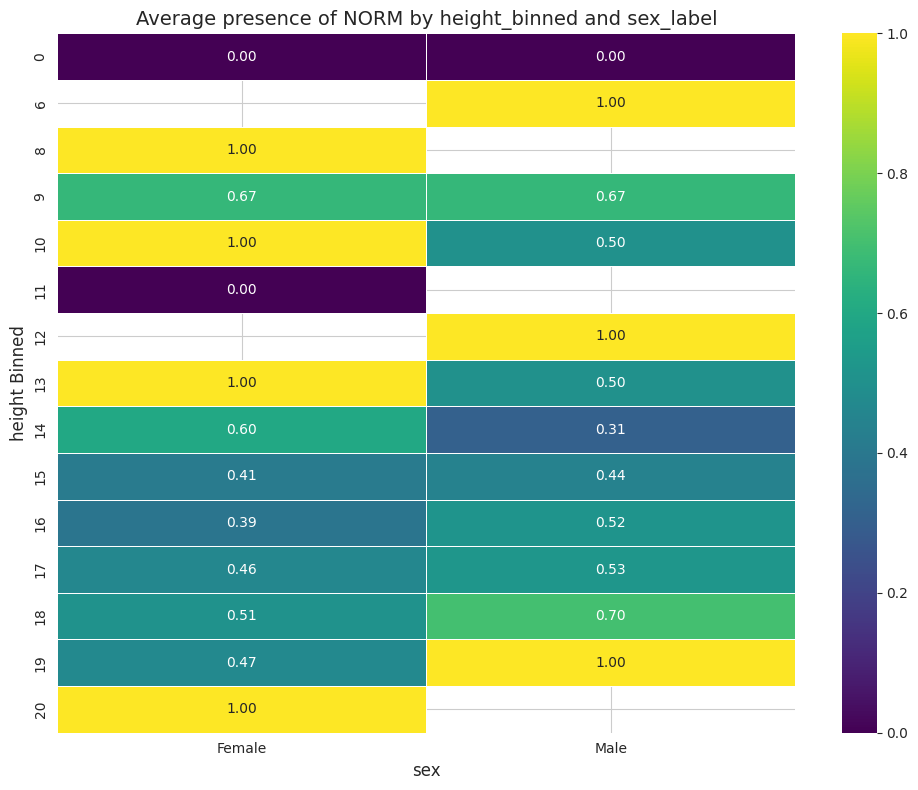

  - Visualizing NORM by weight_binned and sex_label


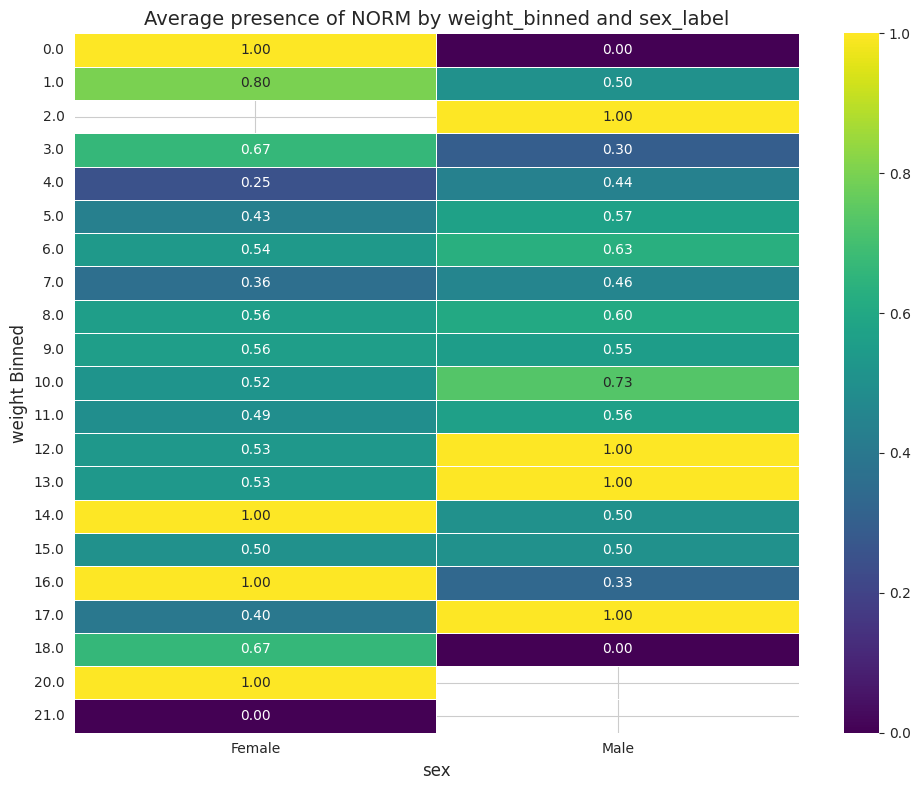


Generating heatmaps for diagnostic class: MI
  - Visualizing MI by age_binned and height_binned


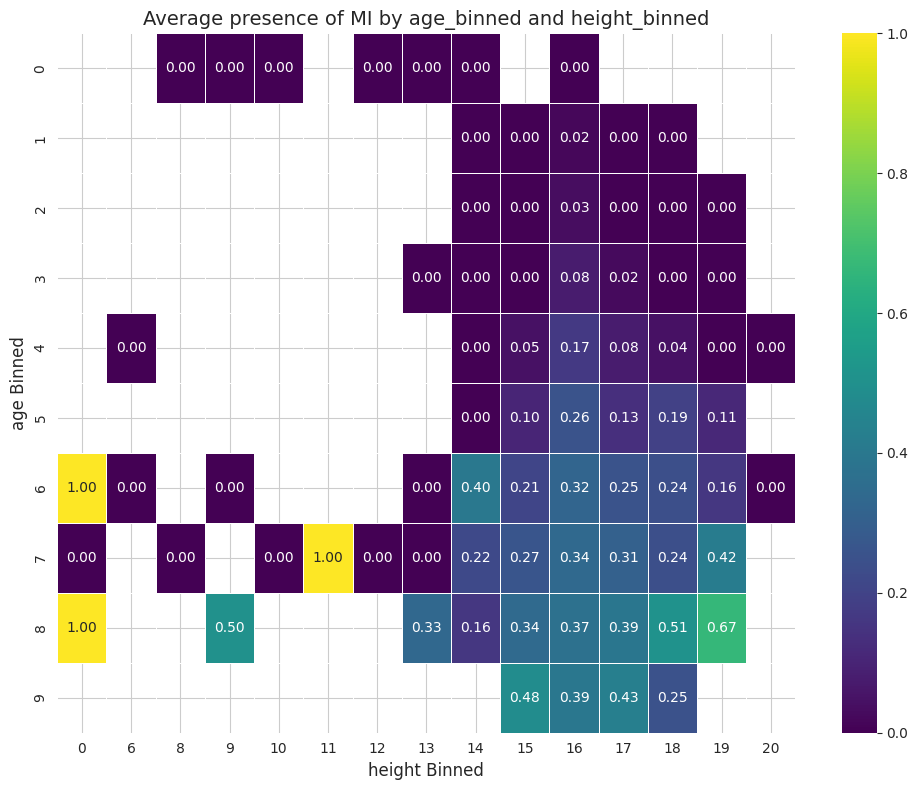

  - Visualizing MI by age_binned and weight_binned


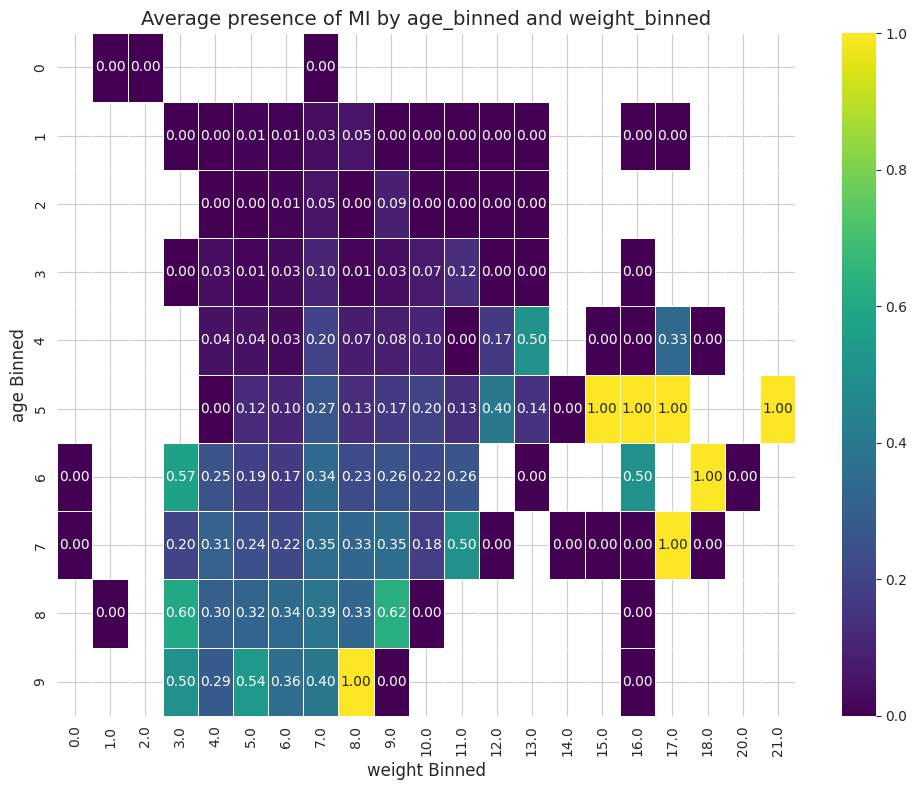

  - Visualizing MI by age_binned and sex_label


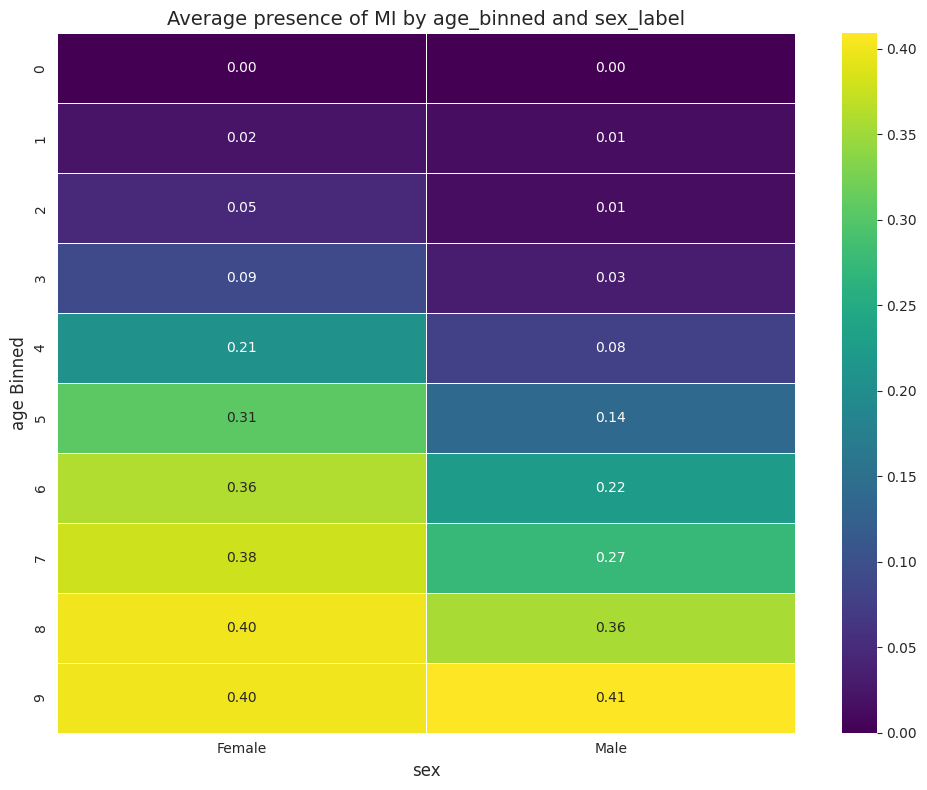

  - Visualizing MI by height_binned and weight_binned


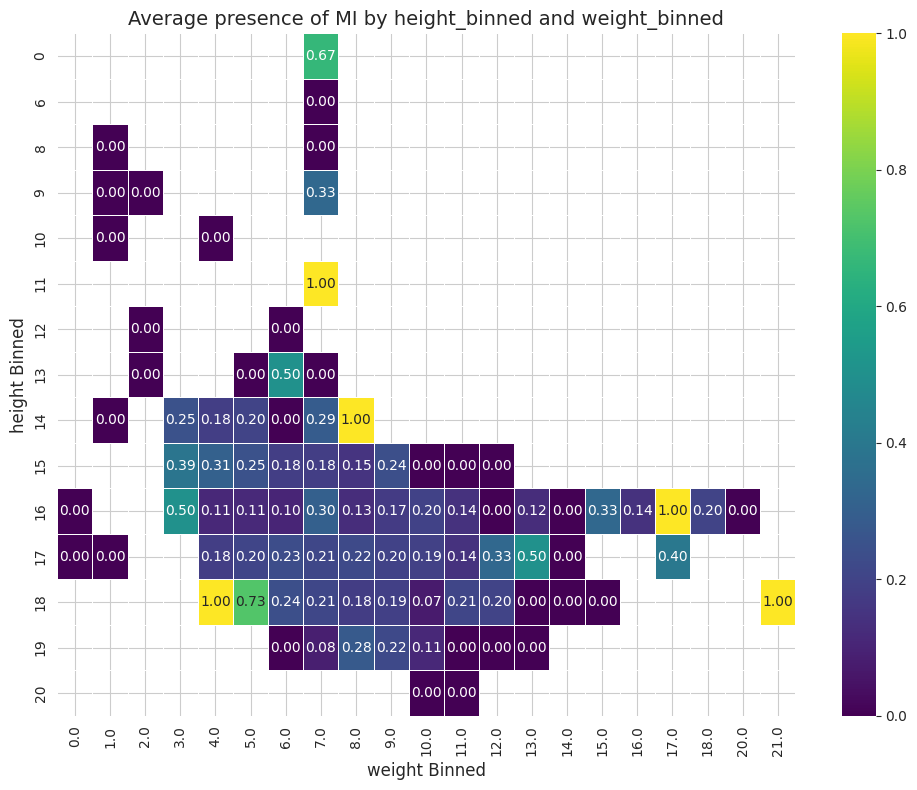

  - Visualizing MI by height_binned and sex_label


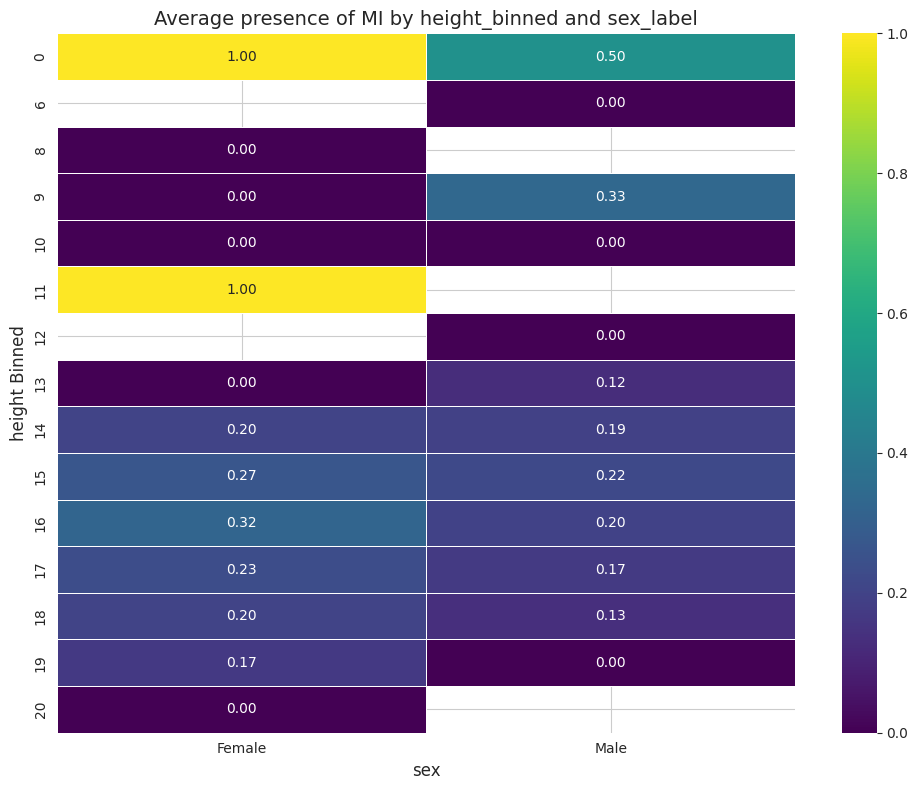

  - Visualizing MI by weight_binned and sex_label


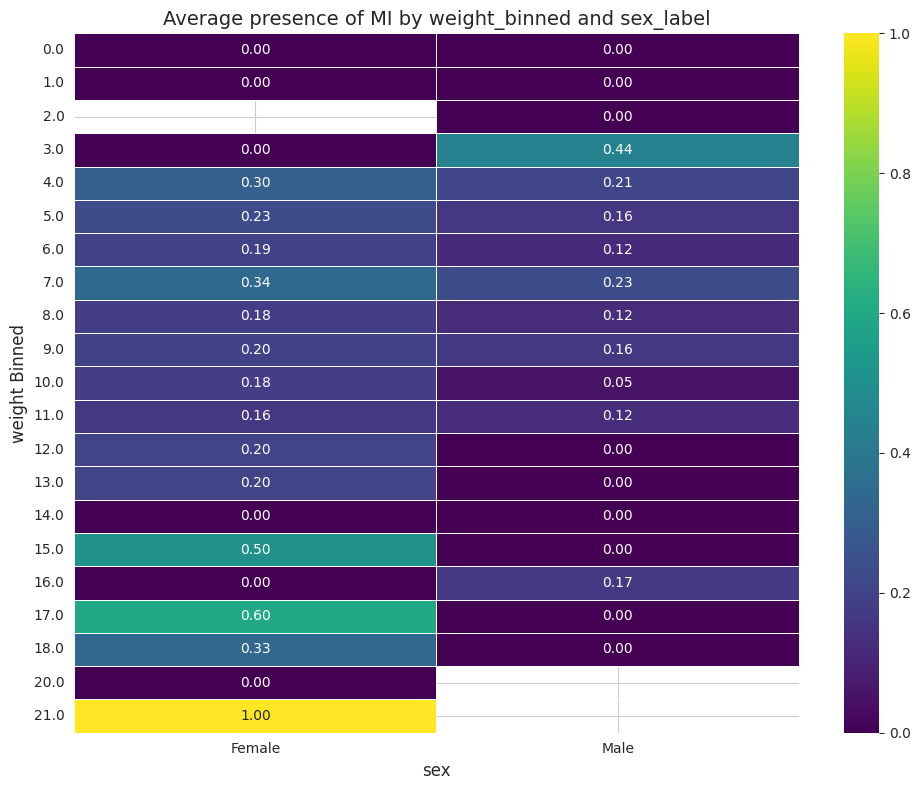


Generating heatmaps for diagnostic class: STTC
  - Visualizing STTC by age_binned and height_binned


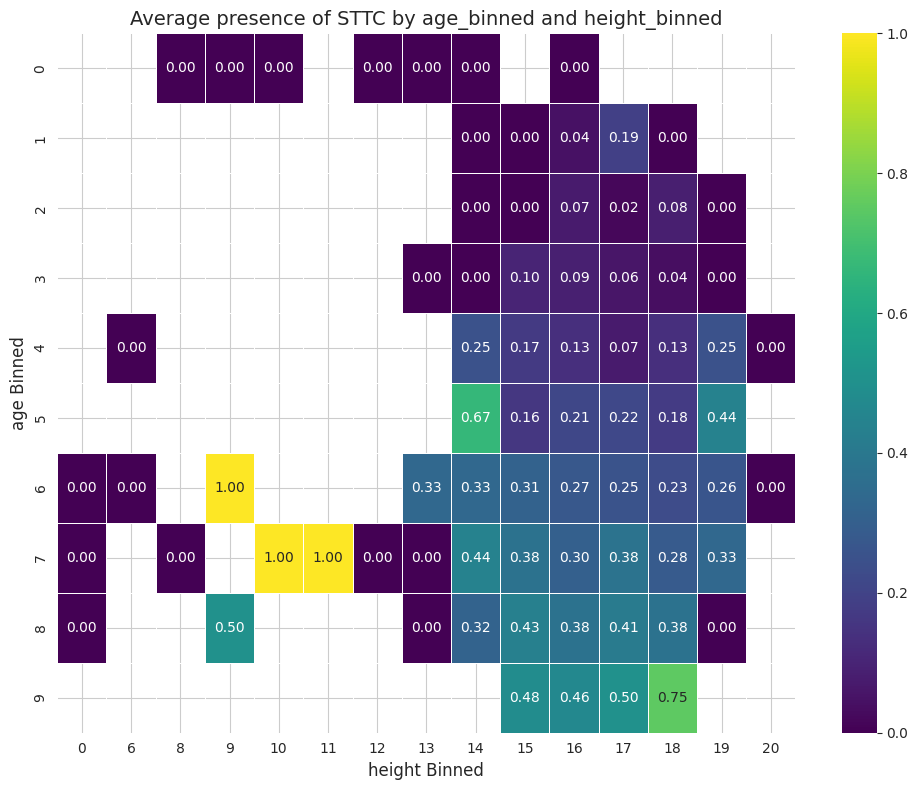

  - Visualizing STTC by age_binned and weight_binned


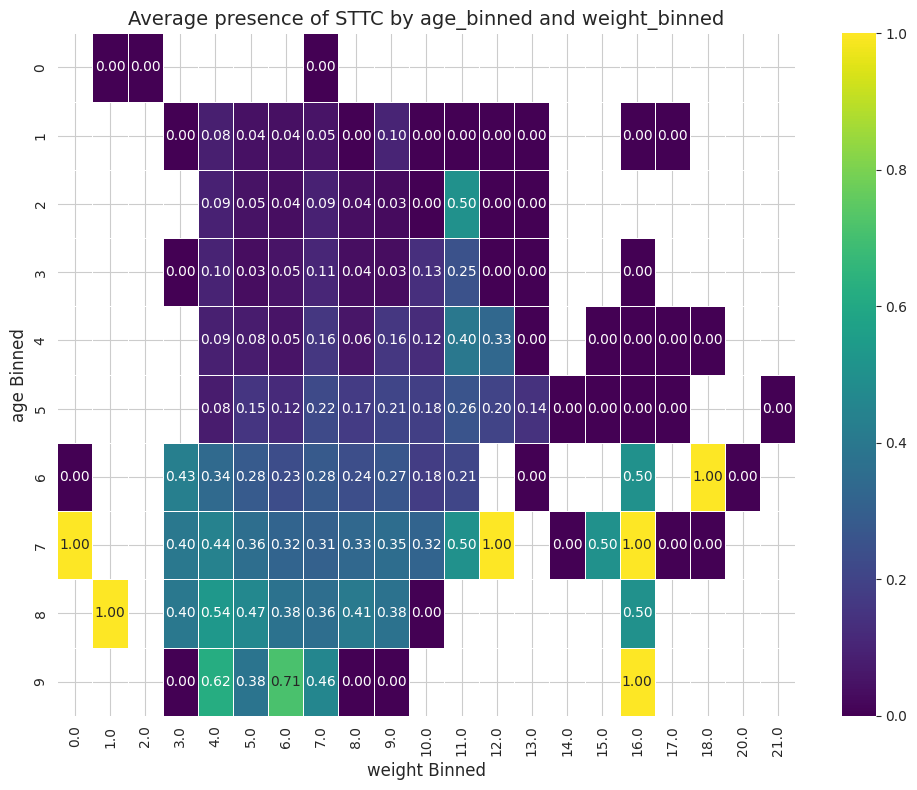

  - Visualizing STTC by age_binned and sex_label


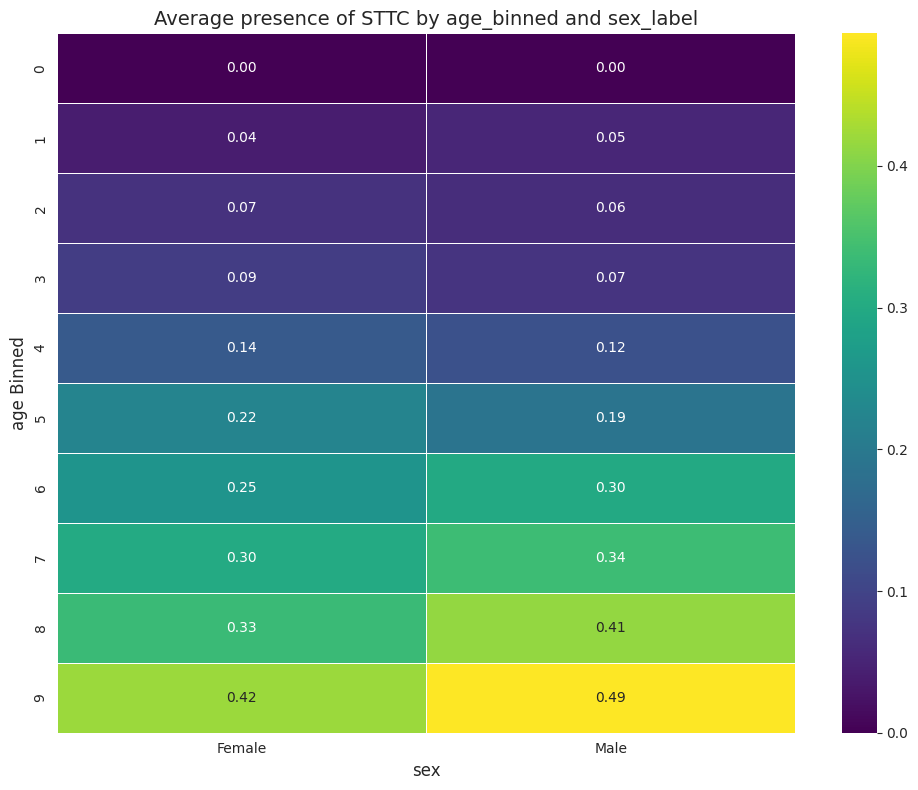

  - Visualizing STTC by height_binned and weight_binned


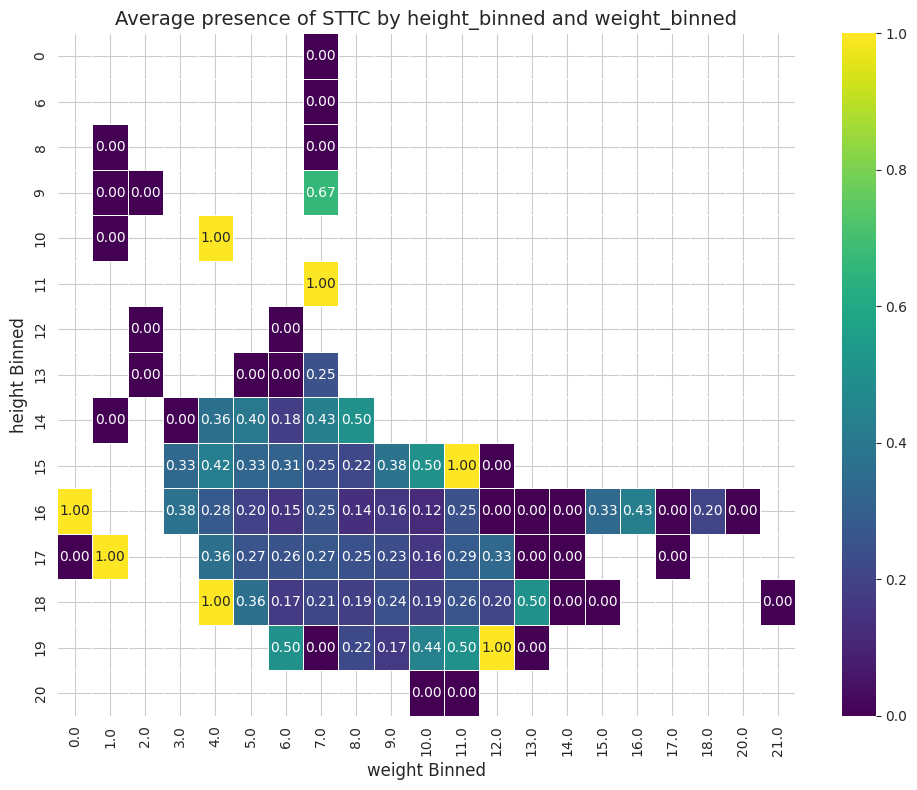

  - Visualizing STTC by height_binned and sex_label


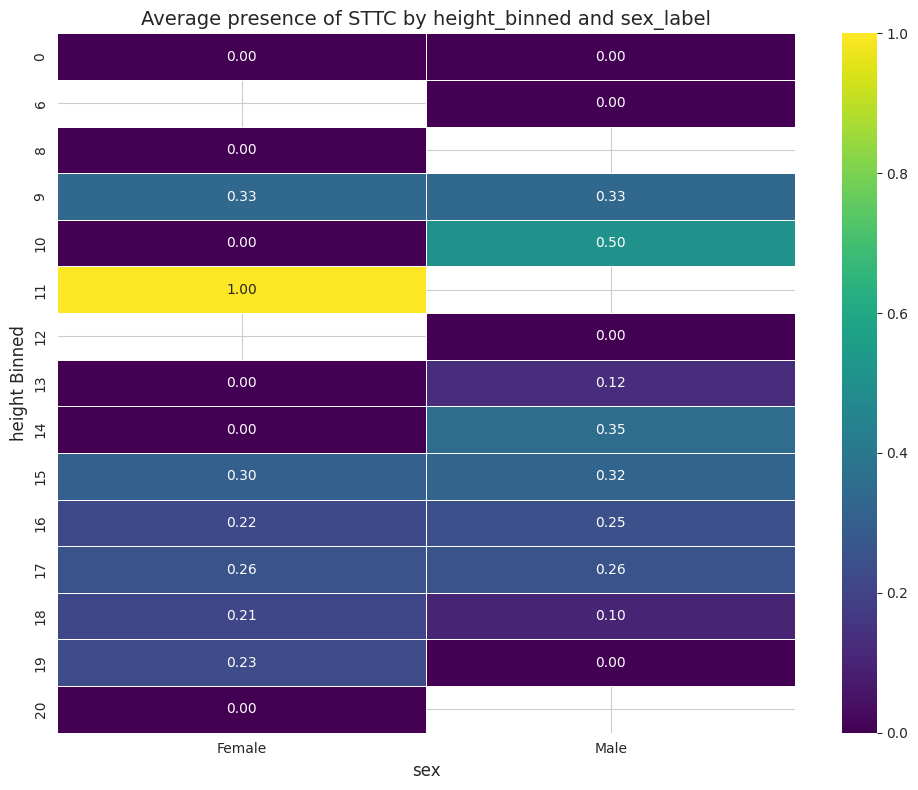

  - Visualizing STTC by weight_binned and sex_label


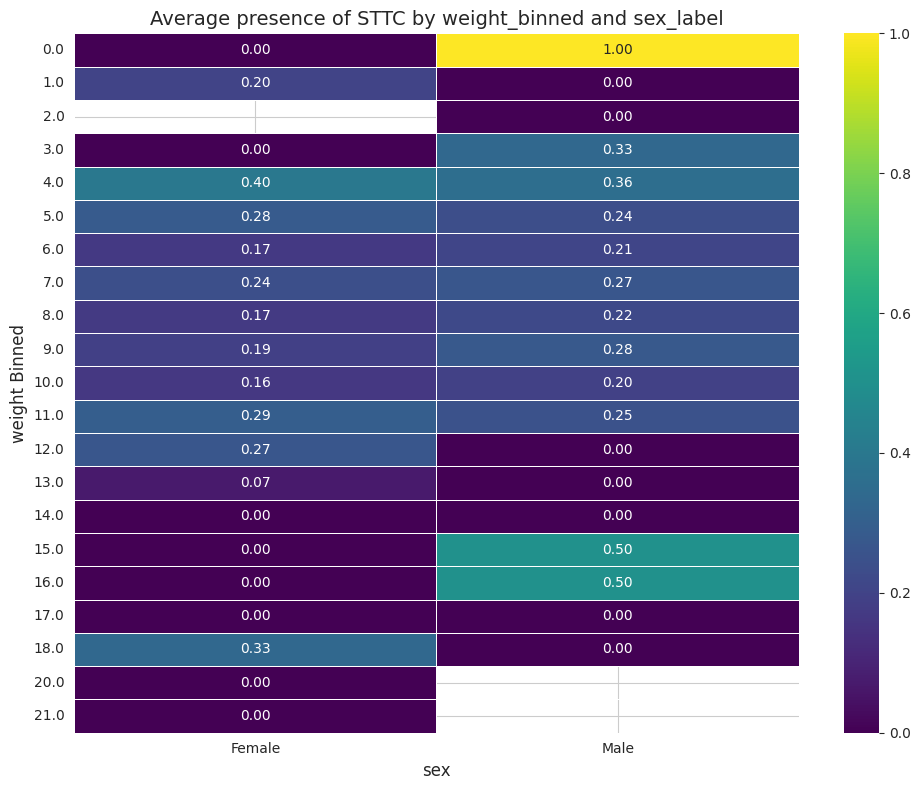


Generating heatmaps for diagnostic class: CD
  - Visualizing CD by age_binned and height_binned


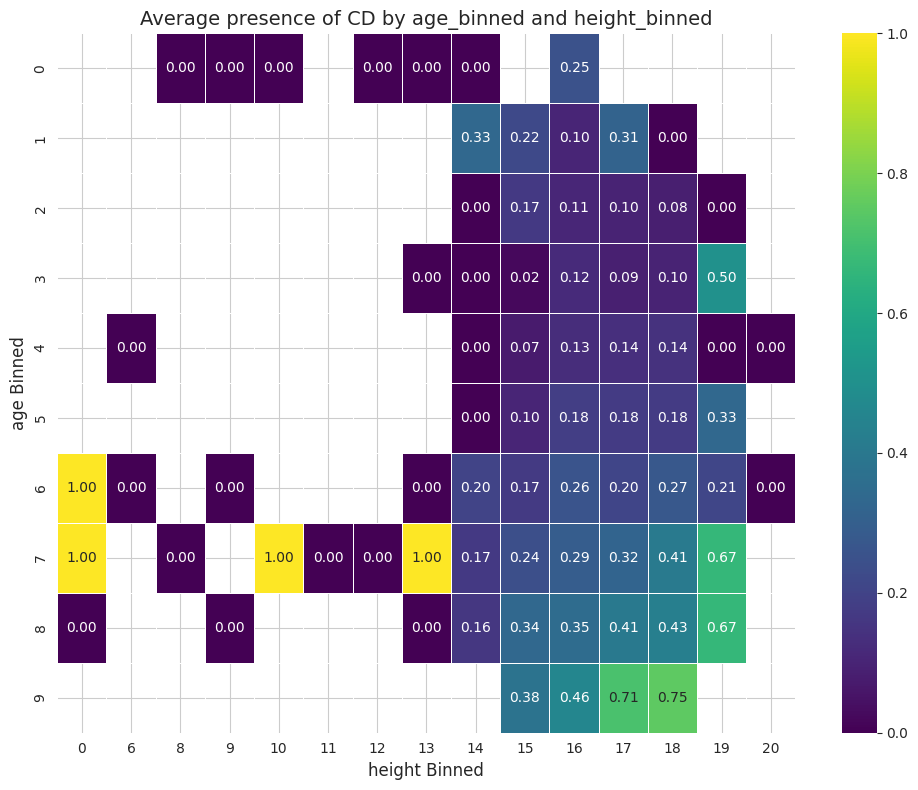

  - Visualizing CD by age_binned and weight_binned


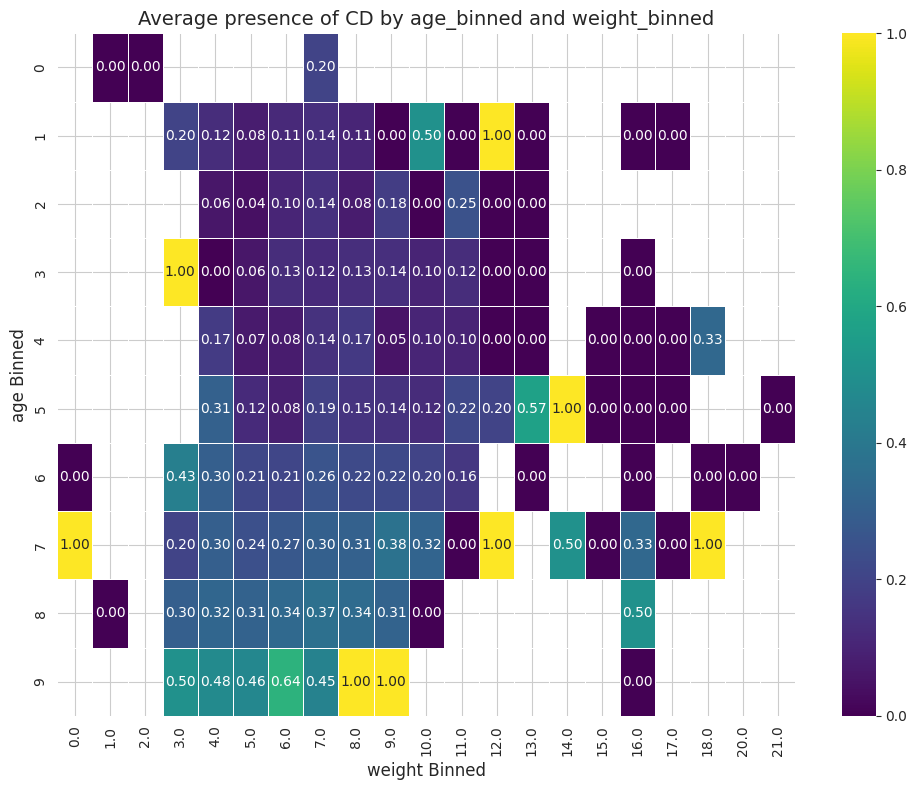

  - Visualizing CD by age_binned and sex_label


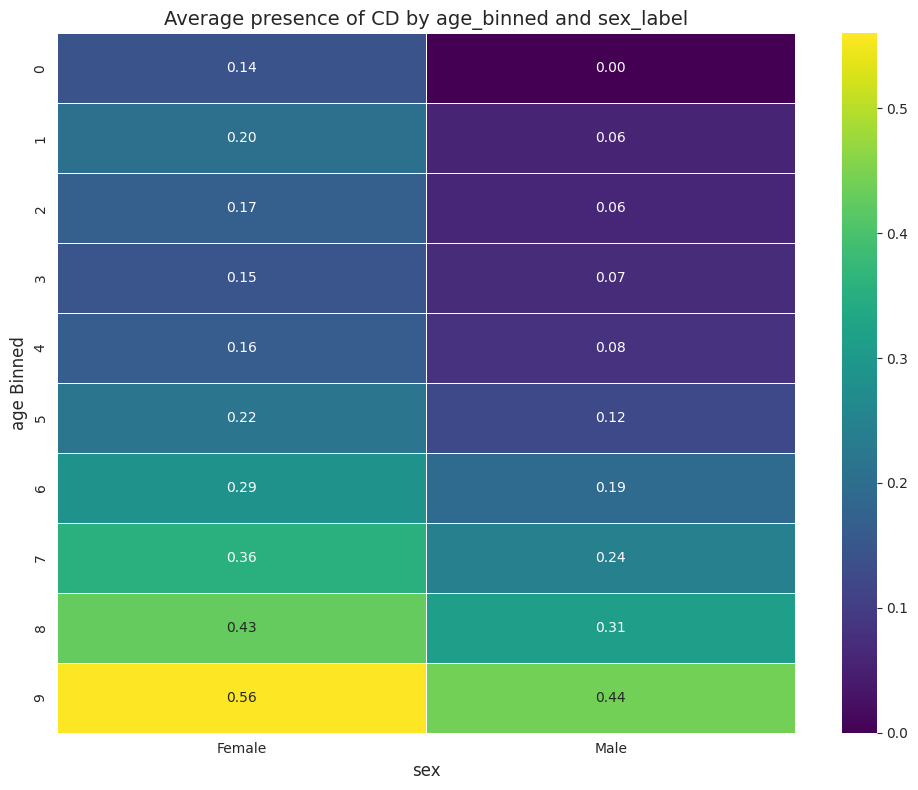

  - Visualizing CD by height_binned and weight_binned


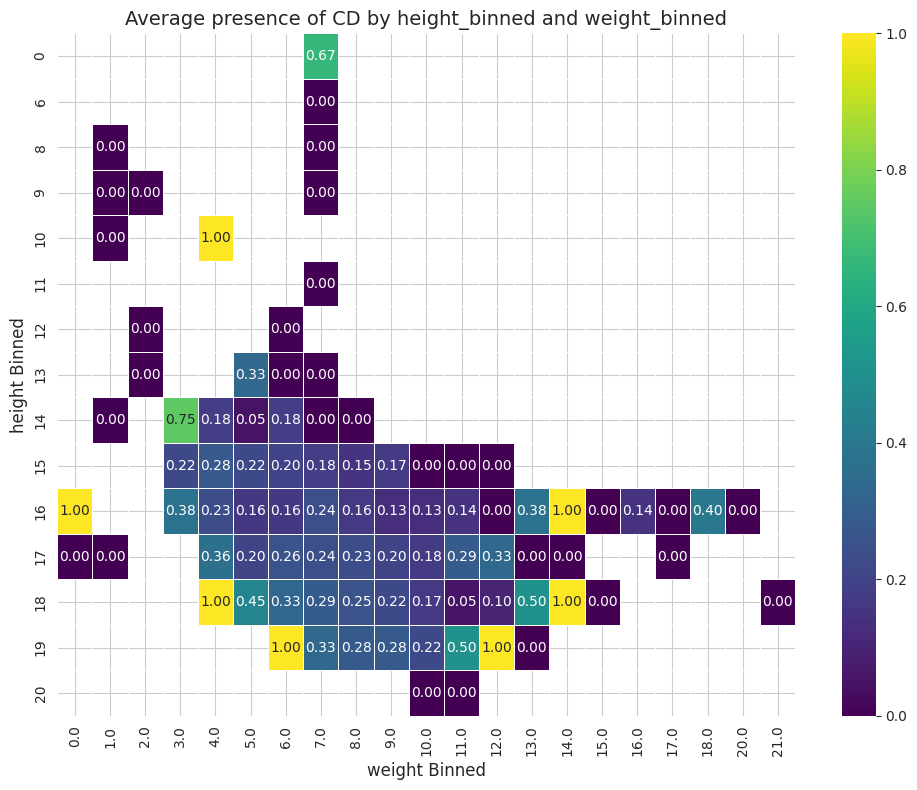

  - Visualizing CD by height_binned and sex_label


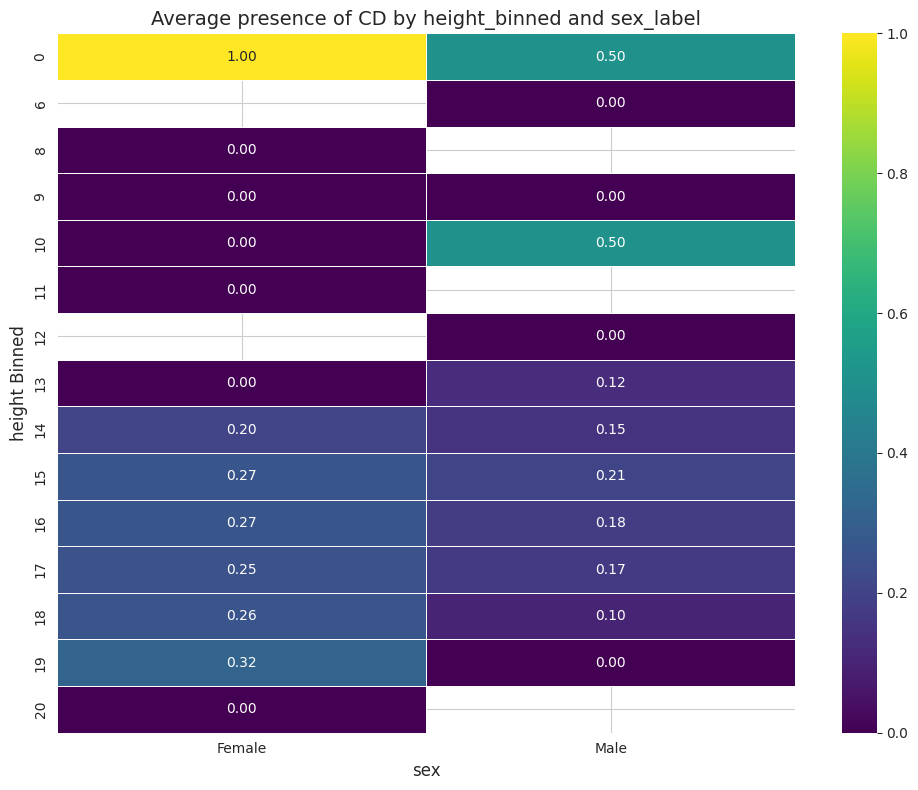

  - Visualizing CD by weight_binned and sex_label


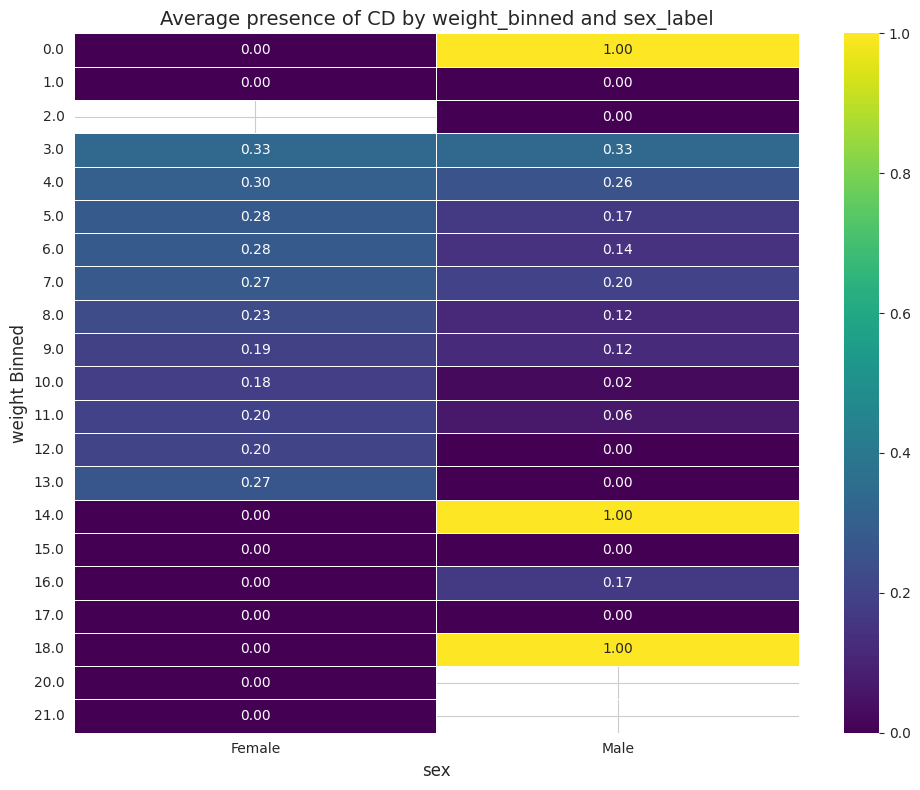


Generating heatmaps for diagnostic class: HYP
  - Visualizing HYP by age_binned and height_binned


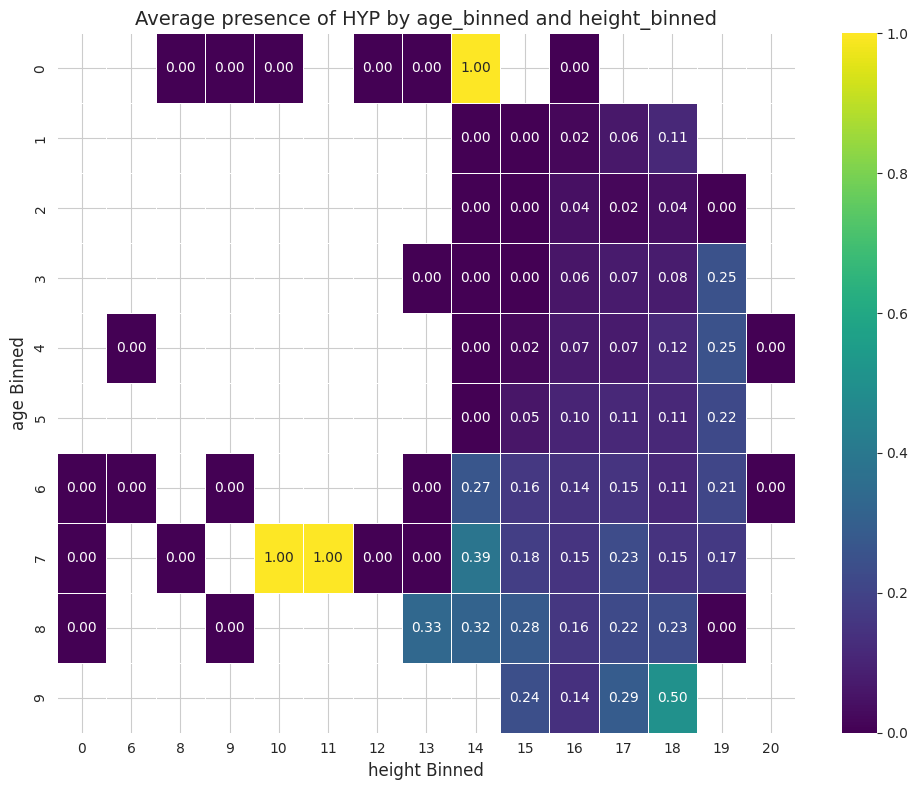

  - Visualizing HYP by age_binned and weight_binned


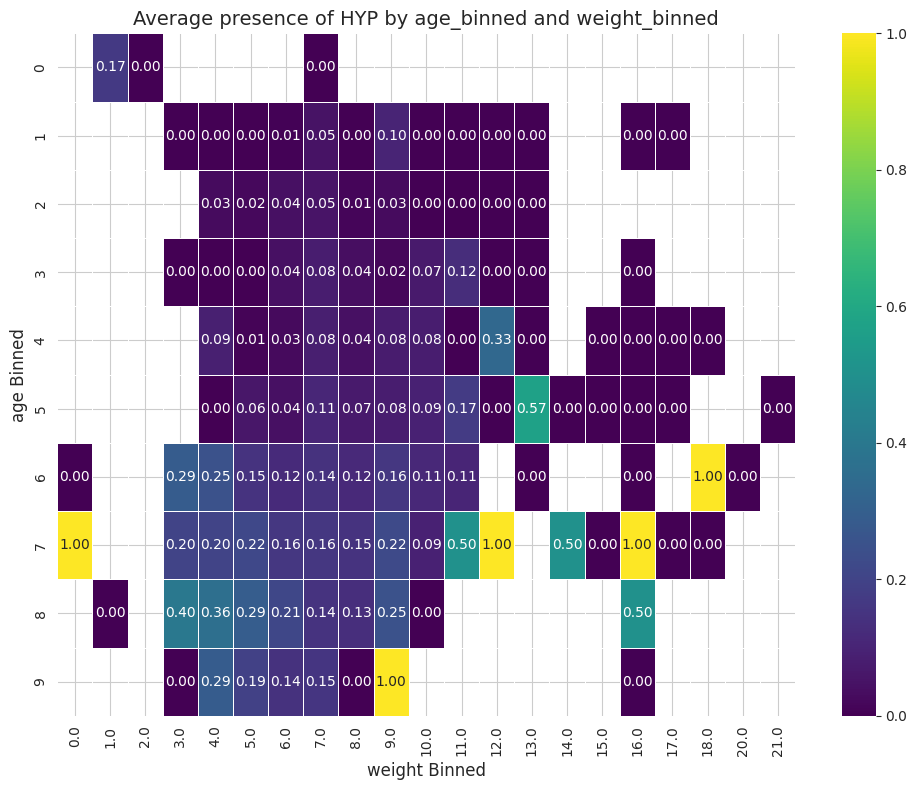

  - Visualizing HYP by age_binned and sex_label


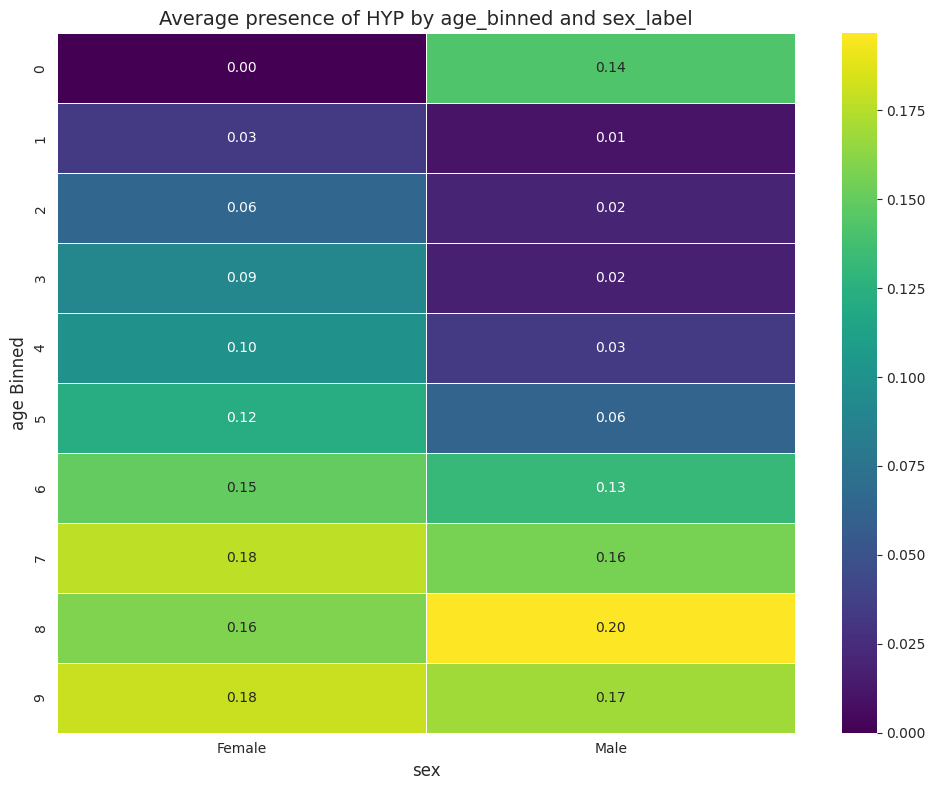

  - Visualizing HYP by height_binned and weight_binned


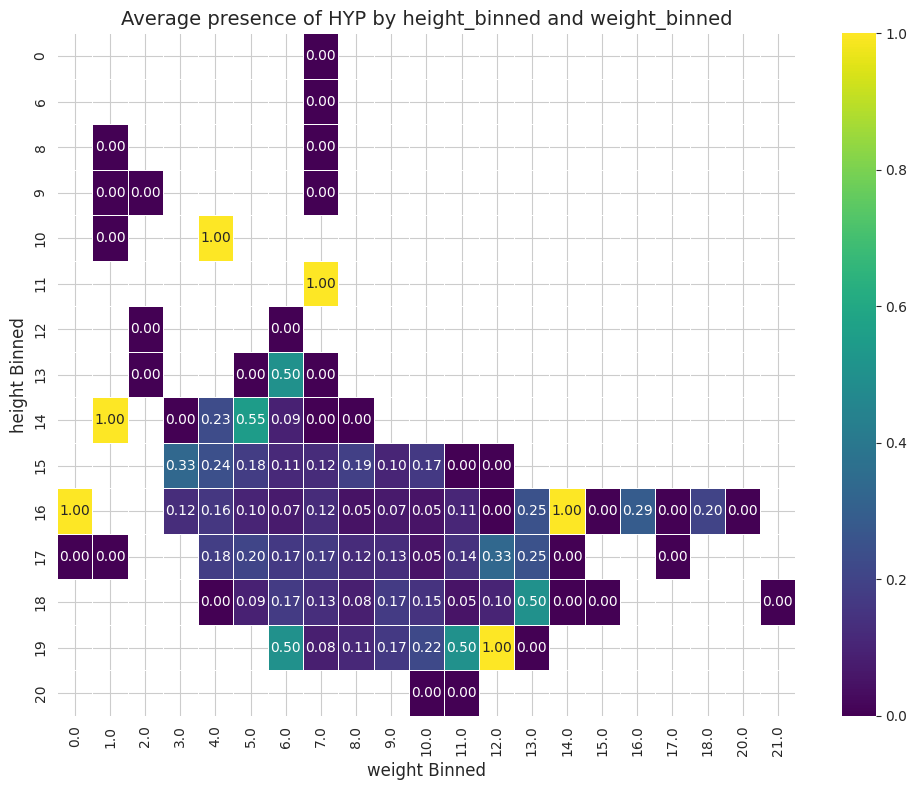

  - Visualizing HYP by height_binned and sex_label


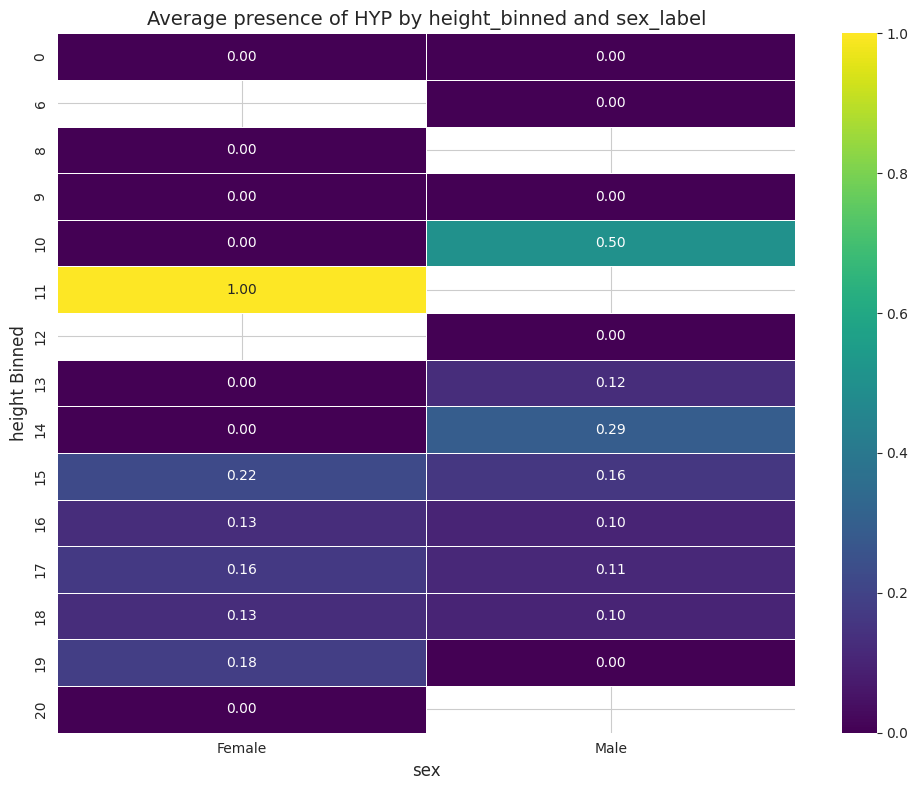

  - Visualizing HYP by weight_binned and sex_label


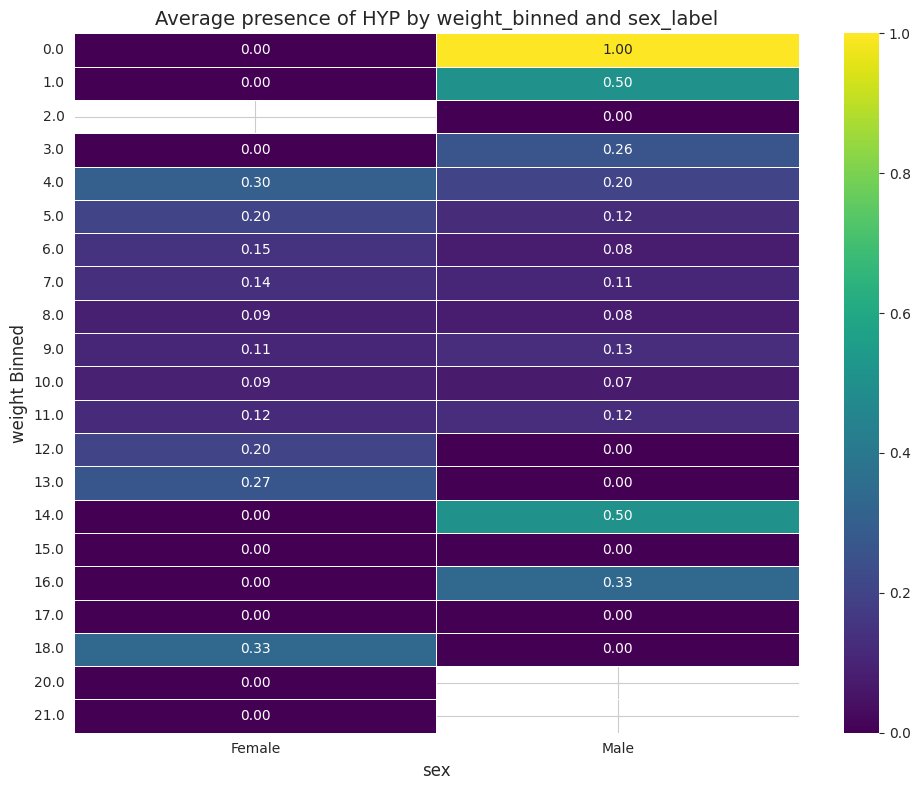

All heatmaps generated successfully.


In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define demographic_features
demographic_features = ['age_binned', 'height_binned', 'weight_binned', 'sex_label']

# 2. Get diagnostic classes
diagnostic_classes = Z.columns.tolist()

# 3. Generate all unique pairwise combinations of demographic_features
feature_combinations = list(itertools.combinations(demographic_features, 2))

print(f"Diagnostic classes: {diagnostic_classes}")
print(f"Demographic feature combinations: {feature_combinations}")

# 4. Iterate through each diagnostic class
for diag_class in diagnostic_classes:
    print(f"\nGenerating heatmaps for diagnostic class: {diag_class}")
    # 5. Iterate through each generated feature combination
    for feat1, feat2 in feature_combinations:
        print(f"  - Visualizing {diag_class} by {feat1} and {feat2}")

        # a. Group df_merged by the two features and calculate the mean of the current diagnostic class
        # Ensure that the diagnostic class column is treated numerically for mean calculation
        plot_data = df_merged.groupby([feat1, feat2])[diag_class].mean().reset_index()

        # b. Pivot the data
        pivot_table = plot_data.pivot(index=feat1, columns=feat2, values=diag_class)

        # c. Create a figure and an axes object for the heatmap
        plt.figure(figsize=(10, 8))

        # d. Generate a heatmap
        sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

        # e. Set an appropriate title
        plt.title(f'Average presence of {diag_class} by {feat1} and {feat2}', fontsize=14)

        # f. Set axis labels and tight layout
        plt.xlabel(feat2.replace('_binned', ' Binned').replace('_label', ''), fontsize=12)
        plt.ylabel(feat1.replace('_binned', ' Binned').replace('_label', ''), fontsize=12)
        plt.tight_layout()

        # g. Display the plot
        plt.show()

print("All heatmaps generated successfully.")

**Préparation des données pour l'entrainnement**

In [ ]:
X = pd.DataFrame(index=ECG_df.index)

X['age'] = ECG_df.age
X.age.fillna(0, inplace=True)

X['sex'] = ECG_df.sex.astype(float)
X.sex.fillna(0, inplace=True)

X['height'] = ECG_df.height
X.loc[X.height < 50, 'height'] = np.nan
X.height.fillna(0, inplace=True)

X['weight'] = ECG_df.weight
X.weight.fillna(0, inplace=True)
X['infarction_stadium1'] = ECG_df.infarction_stadium1.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = ECG_df.infarction_stadium2.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

X['pacemaker'] = (ECG_df.pacemaker == 'ja, pacemaker').astype(float)

X

age  sex  height  weight  infarction_stadium1  infarction_stadium2  \
ecg_id                                                                        
1       56.0  1.0     0.0    63.0                  0.0                  0.0   
2       19.0  0.0     0.0    70.0                  0.0                  0.0   
3       37.0  1.0     0.0    69.0                  0.0                  0.0   
4       24.0  0.0     0.0    82.0                  0.0                  0.0   
5       19.0  1.0     0.0    70.0                  0.0                  0.0   
...      ...  ...     ...     ...                  ...                  ...   
21833   67.0  1.0     0.0     0.0                  0.0                  0.0   
21834   93.0  0.0     0.0     0.0                  4.0                  0.0   
21835   59.0  1.0     0.0     0.0                  0.0                  0.0   
21836   64.0  1.0     0.0     0.0                  0.0                  0.0   
21837   68.0  0.0     0.0     0.0                  0.0                  0.0   

        pacemaker  
ecg_id             
1             0.0  
2             0.0  
3             0.0  
4             0.0  
5             0.0  
...           ...  
21833         0.0  
21834         0.0  
21835         0.0  
21836         0.0  
21837         0.0  

[21837 rows x 7 columns]

In [ ]:
Y = np.array(ecg_signals)
print(f"Shape of Y: {Y.shape}")

Shape of Y: (21837, 1000, 12)


In [ ]:
Y.shape

(21837, 1000, 12)

**Features extraction**

In [ ]:
import numpy as np
from scipy import signal

def bandpass_filter(data, lowcut=3, highcut=45, fs=100, order=5):
    """
    Applique un filtre passe-bande Butterworth

    Args:
        data: Signal à filtrer (1D array)
        lowcut: Fréquence de coupure basse en Hz
        highcut: Fréquence de coupure haute en Hz
        fs: Fréquence d'échantillonnage en Hz
        order: Ordre du filtre

    Returns:
        Signal filtré
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

def normalize_to_range(data, min_val=-1, max_val=1):
    """
    Normalise les données dans l'intervalle [min_val, max_val]

    Args:
        data: Données à normaliser
        min_val: Valeur minimale de sortie
        max_val: Valeur maximale de sortie

    Returns:
        Données normalisées
    """
    data_min = np.min(data)
    data_max = np.max(data)

    if data_max - data_min == 0:
        return np.zeros_like(data)

    normalized = (data - data_min) / (data_max - data_min)
    normalized = normalized * (max_val - min_val) + min_val
    return normalized

def preprocess_dataset(data, fs=100, lowcut=3, highcut=45):
    """
    Applique le preprocessing complet sur le dataset

    Args:
        data: Dataset de shape (21837, 1000, 12)
        fs: Fréquence d'échantillonnage en Hz
        lowcut: Fréquence de coupure basse
        highcut: Fréquence de coupure haute

    Returns:
        Dataset preprocessé de même shape
    """
    n_samples, n_timepoints, n_channels = data.shape
    processed_data = np.zeros_like(data)

    print(f"Traitement de {n_samples} observations...")

    for i in range(n_samples):
        if (i + 1) % 1000 == 0:
            print(f"  Progression: {i + 1}/{n_samples} observations traitées")

        for ch in range(n_channels):
            # Extraction du signal pour ce canal
            signal_data = data[i, :, ch]

            # Application du filtre passe-bande
            filtered_signal = bandpass_filter(signal_data, lowcut, highcut, fs)

            # Normalisation à [-1, 1]
            normalized_signal = normalize_to_range(filtered_signal, -1, 1)

            # Stockage du résultat
            processed_data[i, :, ch] = normalized_signal

    print("Preprocessing terminé!")
    return processed_data


# Application du preprocessing
fs=100
# Ajustez cette valeur selon votre cas
Y_processed = preprocess_dataset(Y, fs=100, lowcut=3, highcut=45)

print(f"\nShape original: {X.shape}")
print(f"Shape après preprocessing: {Y_processed.shape}")
print(f"Valeur min après normalisation: {Y_processed.min():.4f}")
print(f"Valeur max après normalisation: {Y_processed.max():.4f}")

# Vérification sur un canal
channel_idx = 0
sample_idx = 0
print(f"\nExemple - Signal original (sample {sample_idx}, canal {channel_idx}):")
print(f"  Min: {Y[sample_idx, :, channel_idx].min():.4f}")
print(f"  Max: {Y[sample_idx, :, channel_idx].max():.4f}")
print(f"\nAprès preprocessing:")
print(f"  Min: {Y_processed[sample_idx, :, channel_idx].min():.4f}")
print(f"  Max: {Y_processed[sample_idx, :, channel_idx].max():.4f}")

Traitement de 21837 observations...
  Progression: 1000/21837 observations traitées
  Progression: 2000/21837 observations traitées
  Progression: 3000/21837 observations traitées
  Progression: 4000/21837 observations traitées
  Progression: 5000/21837 observations traitées
  Progression: 6000/21837 observations traitées
  Progression: 7000/21837 observations traitées
  Progression: 8000/21837 observations traitées
  Progression: 9000/21837 observations traitées
  Progression: 10000/21837 observations traitées
  Progression: 11000/21837 observations traitées
  Progression: 12000/21837 observations traitées
  Progression: 13000/21837 observations traitées
  Progression: 14000/21837 observations traitées
  Progression: 15000/21837 observations traitées
  Progression: 16000/21837 observations traitées
  Progression: 17000/21837 observations traitées
  Progression: 18000/21837 observations traitées
  Progression: 19000/21837 observations traitées
  Progression: 20000/21837 observations tr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_average_correlation_matrix(data):
    """
    Calcule la matrice de corrélation moyenne entre les canaux
    sur toutes les observations

    Args:
        data: Dataset de shape (n_observations, n_timepoints, n_channels)

    Returns:
        Matrice de corrélation moyenne de shape (n_channels, n_channels)
    """
    n_samples, n_timepoints, n_channels = data.shape

    # Initialisation de la matrice pour accumuler les corrélations
    correlation_sum = np.zeros((n_channels, n_channels))

    print(f"Calcul des corrélations pour {n_samples} observations...")

    # Calcul de la corrélation pour chaque observation
    for i in range(n_samples):
        if (i + 1) % 1000 == 0:
            print(f"  Progression: {i + 1}/{n_samples} observations traitées")

        # Extraction de l'observation (shape: n_timepoints x n_channels)
        obs_data = data[i, :, :]

        # Calcul de la matrice de corrélation pour cette observation
        corr_matrix = np.corrcoef(obs_data.T)

        # Accumulation
        correlation_sum += corr_matrix

    # Moyenne des corrélations
    avg_correlation = correlation_sum / n_samples

    print("Calcul terminé!")
    return avg_correlation

def plot_correlation_matrix(corr_matrix, channel_names=None, figsize=(10, 8)):
    """
    Trace la matrice de corrélation avec une heatmap

    Args:
        corr_matrix: Matrice de corrélation (n_channels x n_channels)
        channel_names: Liste des noms des canaux (optionnel)
        figsize: Taille de la figure
    """
    n_channels = corr_matrix.shape[0]

    # Création des noms de canaux par défaut si non fournis
    if channel_names is None:
        channel_names = [f'Ch{i+1}' for i in range(n_channels)]

    # Création de la figure
    plt.figure(figsize=figsize)

    # Création de la heatmap
    sns.heatmap(corr_matrix,
                annot=True,  # Afficher les valeurs
                fmt='.2f',   # Format avec 2 décimales
                cmap='coolwarm',  # Palette de couleurs
                center=0,    # Centrer sur 0
                vmin=-1, vmax=1,  # Limites des corrélations
                square=True,  # Cellules carrées
                linewidths=0.5,  # Lignes entre cellules
                cbar_kws={'label': 'Corrélation moyenne'},
                xticklabels=channel_names,
                yticklabels=channel_names)

    plt.title('Matrice de corrélation moyenne entre les 12 canaux\n(Moyenne sur 21837 observations)',
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Canaux', fontsize=12)
    plt.ylabel('Canaux', fontsize=12)

    plt.tight_layout()
    plt.show()


# Calcul de la matrice de corrélation moyenne
avg_corr_matrix = compute_average_correlation_matrix(Y_processed)

print(f"\nMatrice de corrélation moyenne:")
print(f"Shape: {avg_corr_matrix.shape}")
print(f"\nValeurs de corrélation:")
print(f"  Moyenne: {np.mean(avg_corr_matrix[np.triu_indices_from(avg_corr_matrix, k=1)]):.4f}")
print(f"  Min (hors diagonal): {np.min(avg_corr_matrix[np.triu_indices_from(avg_corr_matrix, k=1)]):.4f}")
print(f"  Max (hors diagonal): {np.max(avg_corr_matrix[np.triu_indices_from(avg_corr_matrix, k=1)]):.4f}")

# Définition des noms de canaux pour ECG (12 dérivations standard)
channel_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# Tracé de la matrice
plot_correlation_matrix(avg_corr_matrix, channel_names=channel_names, figsize=(10, 8))

Calcul des corrélations pour 21837 observations...
  Progression: 1000/21837 observations traitées
  Progression: 2000/21837 observations traitées
  Progression: 3000/21837 observations traitées
  Progression: 4000/21837 observations traitées
  Progression: 5000/21837 observations traitées
  Progression: 6000/21837 observations traitées
  Progression: 7000/21837 observations traitées
  Progression: 8000/21837 observations traitées
  Progression: 9000/21837 observations traitées
  Progression: 10000/21837 observations traitées
  Progression: 11000/21837 observations traitées
  Progression: 12000/21837 observations traitées
  Progression: 13000/21837 observations traitées
  Progression: 14000/21837 observations traitées
  Progression: 15000/21837 observations traitées
  Progression: 16000/21837 observations traitées
  Progression: 17000/21837 observations traitées
  Progression: 18000/21837 observations traitées
  Progression: 19000/21837 observations traitées
  Progression: 20000/21837 

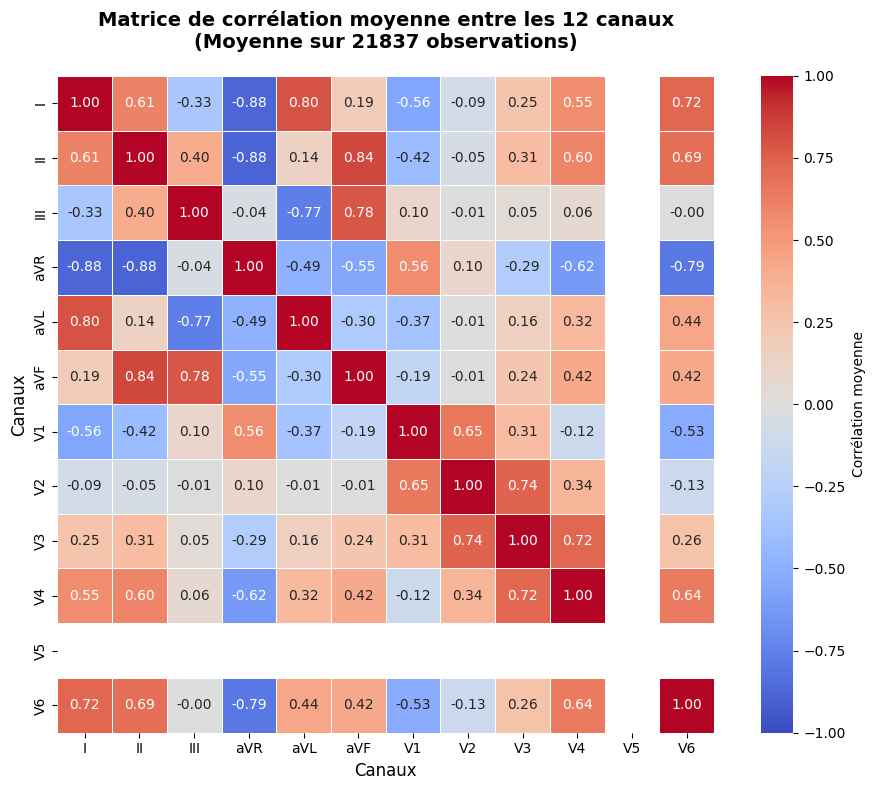

In [ ]:
avg_corr_matrix_Y = compute_average_correlation_matrix(Y)
# Tracé de la matrice
plot_correlation_matrix(avg_corr_matrix_Y, channel_names=channel_names, figsize=(10, 8))

**Leads selection**

In [ ]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.multioutput import MultiOutputClassifier
from scipy import stats
from scipy.signal import find_peaks, welch
import time
from typing import Dict, List, Tuple

# Configuration
LEAD_NAMES = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
FS = 100  # Fréquence d'échantillonnage
TEST_SIZE = 0.2
RANDOM_STATE = 42
N_ESTIMATORS = 100
MAX_DEPTH = 10


def detect_qrs_complexes(signal, fs=100):
    """Détecte les complexes QRS dans un signal ECG"""
    signal_norm = (signal - np.mean(signal)) / np.std(signal)
    height = np.std(signal_norm) * 1.5
    distance = int(0.6 * fs)
    peaks, _ = find_peaks(signal_norm, height=height, distance=distance)
    return peaks


def calculate_heart_rate(rr_intervals, fs=100):
    """Calcule la fréquence cardiaque moyenne"""
    if len(rr_intervals) < 2:
        return 0
    mean_rr = np.mean(rr_intervals) / fs
    return 60 / mean_rr if mean_rr > 0 else 0

In [ ]:

def extract_features_lead_II(signal, fs=100):
    """Features spécifiques pour Lead II - Dérivation de référence"""
    features = []
    qrs_peaks = detect_qrs_complexes(signal, fs)

    # 1. Fréquence cardiaque
    if len(qrs_peaks) > 1:
        rr_intervals = np.diff(qrs_peaks)
        hr = calculate_heart_rate(rr_intervals, fs)
        hr_variability = np.std(rr_intervals) / fs if len(rr_intervals) > 1 else 0
    else:
        hr = 0
        hr_variability = 0
    features.extend([hr, hr_variability])

    # 2. Amplitude onde R moyenne
    if len(qrs_peaks) > 0:
        r_amplitudes = signal[qrs_peaks]
        features.extend([np.mean(r_amplitudes), np.std(r_amplitudes), np.max(r_amplitudes)])
    else:
        features.extend([0, 0, 0])

    # 3. Durée QRS approximative
    if len(qrs_peaks) > 0:
        qrs_widths = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            window = signal[max(0, peak-20):min(len(signal), peak+20)]
            width = np.sum(window > np.max(window) * 0.5)
            qrs_widths.append(width)
        mean_qrs_width = np.mean(qrs_widths) * (1000/fs)
    else:
        mean_qrs_width = 0
    features.append(mean_qrs_width)

    # 4. Segment ST
    if len(qrs_peaks) > 0:
        st_levels = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            st_start = peak + int(0.08 * fs)
            st_end = peak + int(0.12 * fs)
            if st_end < len(signal):
                st_segment = signal[st_start:st_end]
                st_levels.append(np.mean(st_segment))
        features.extend([np.mean(st_levels) if st_levels else 0,
                        np.std(st_levels) if st_levels else 0])
    else:
        features.extend([0, 0])

    # 5. Onde T
    if len(qrs_peaks) > 0:
        t_amplitudes = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            t_start = peak + int(0.2 * fs)
            t_end = peak + int(0.4 * fs)
            if t_end < len(signal):
                t_wave = signal[t_start:t_end]
                t_amplitudes.append(np.max(np.abs(t_wave)))
        features.append(np.mean(t_amplitudes) if t_amplitudes else 0)
    else:
        features.append(0)

    # Features spectrales
    freqs, psd = welch(signal, fs=fs, nperseg=min(256, len(signal)))
    features.extend([np.sum(psd[(freqs >= 0.5) & (freqs < 4)]),
                     np.sum(psd[(freqs >= 4) & (freqs < 15)]),
                     np.sum(psd[(freqs >= 15) & (freqs < 40)])])

    return np.array(features)


def extract_features_aVR(signal, fs=100):
    """Features pour aVR - Dérivation miroir"""
    features = []
    qrs_peaks = detect_qrs_complexes(signal, fs)

    # 1. Direction QRS (normalement négatif)
    if len(qrs_peaks) > 0:
        qrs_polarities = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            window = signal[max(0, peak-10):min(len(signal), peak+10)]
            qrs_polarities.append(np.mean(window))
        mean_polarity = np.mean(qrs_polarities)
    else:
        mean_polarity = 0
    features.append(mean_polarity)

    # 2. Amplitude minimale
    features.append(np.min(signal))

    # 3. Ratio amplitudes négatives/positives
    neg_amp = np.sum(signal[signal < 0])
    pos_amp = np.sum(signal[signal > 0])
    ratio = abs(neg_amp / pos_amp) if pos_amp != 0 else 0
    features.append(ratio)

    # 4-6. Stats de base
    features.extend([np.mean(signal), np.std(signal), stats.skew(signal)])

    # 7-9. Features spectrales
    freqs, psd = welch(signal, fs=fs, nperseg=min(256, len(signal)))
    features.extend([np.sum(psd[(freqs >= 0.5) & (freqs < 10)]),
                     np.sum(psd[(freqs >= 10) & (freqs < 30)]),
                     np.sum(psd[(freqs >= 30) & (freqs < 45)])])

    return np.array(features)


def extract_features_aVL(signal, fs=100):
    """Features pour aVL - Latérale haute"""
    features = []
    qrs_peaks = detect_qrs_complexes(signal, fs)

    # 1. Hauteur onde R
    if len(qrs_peaks) > 0:
        r_heights = signal[qrs_peaks]
        max_r = np.max(r_heights)
        mean_r = np.mean(r_heights)
    else:
        max_r = 0
        mean_r = 0
    features.extend([max_r, mean_r])

    # 2. Présence onde Q
    if len(qrs_peaks) > 0:
        q_amplitudes = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            q_region = signal[max(0, peak-15):peak]
            if len(q_region) > 0:
                q_amplitudes.append(np.min(q_region))
        mean_q = np.mean(q_amplitudes) if q_amplitudes else 0
    else:
        mean_q = 0
    features.append(mean_q)

    # 3-5. Stats temporelles
    features.extend([np.mean(signal), np.std(signal), np.max(signal)])

    # 6-8. Features spectrales
    freqs, psd = welch(signal, fs=fs, nperseg=min(256, len(signal)))
    features.extend([np.sum(psd[(freqs >= 0.5) & (freqs < 10)]),
                     np.sum(psd[(freqs >= 10) & (freqs < 30)]),
                     np.sum(psd[(freqs >= 30) & (freqs < 45)])])

    return np.array(features)


def extract_features_aVF(signal, fs=100):
    """Features pour aVF - Inférieure"""
    features = []
    qrs_peaks = detect_qrs_complexes(signal, fs)

    # 1. Onde Q pathologique
    if len(qrs_peaks) > 0:
        q_durations = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            q_start = max(0, peak-20)
            q_region = signal[q_start:peak]
            if len(q_region) > 0 and np.min(q_region) < -0.1:
                q_duration = np.sum(q_region < -0.1) * (1000/fs)
                q_durations.append(q_duration)
        mean_q_duration = np.mean(q_durations) if q_durations else 0
    else:
        mean_q_duration = 0
    features.append(mean_q_duration)

    # 2. Segment ST
    if len(qrs_peaks) > 0:
        st_elevations = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            st_point = peak + int(0.08 * fs)
            if st_point < len(signal):
                st_elevations.append(signal[st_point])
        mean_st = np.mean(st_elevations) if st_elevations else 0
    else:
        mean_st = 0
    features.append(mean_st)

    # 3. Onde T
    if len(qrs_peaks) > 0:
        t_polarities = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            t_start = peak + int(0.2 * fs)
            t_end = peak + int(0.35 * fs)
            if t_end < len(signal):
                t_wave = signal[t_start:t_end]
                t_polarities.append(np.mean(t_wave))
        mean_t = np.mean(t_polarities) if t_polarities else 0
    else:
        mean_t = 0
    features.append(mean_t)

    # 4-6. Stats de base
    features.extend([np.mean(signal), np.std(signal), np.max(signal)])

    # 7-9. Features spectrales
    freqs, psd = welch(signal, fs=fs, nperseg=min(256, len(signal)))
    features.extend([np.sum(psd[(freqs >= 0.5) & (freqs < 10)]),
                     np.sum(psd[(freqs >= 10) & (freqs < 30)]),
                     np.sum(psd[(freqs >= 30) & (freqs < 45)])])

    return np.array(features)


def extract_features_precordial(signal, fs=100, lead_name='V1'):
    """Features pour dérivations précordiales V1-V6"""
    features = []
    qrs_peaks = detect_qrs_complexes(signal, fs)

    # 1. Progression onde R
    if len(qrs_peaks) > 0:
        r_amplitudes = signal[qrs_peaks]
        mean_r = np.mean(r_amplitudes)
        max_r = np.max(r_amplitudes)
    else:
        mean_r = 0
        max_r = 0
    features.extend([mean_r, max_r])

    # 2. Pattern QRS (ratio R/S)
    if len(qrs_peaks) > 0:
        rs_ratios = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            r_amp = signal[peak]
            s_region = signal[peak:min(len(signal), peak+15)]
            s_amp = abs(np.min(s_region)) if len(s_region) > 0 else 0.01
            rs_ratios.append(r_amp / s_amp if s_amp > 0.01 else 0)
        mean_rs_ratio = np.mean(rs_ratios) if rs_ratios else 0
    else:
        mean_rs_ratio = 0
    features.append(mean_rs_ratio)

    # 3. Segment ST
    if len(qrs_peaks) > 0:
        st_levels = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            st_point = peak + int(0.08 * fs)
            if st_point < len(signal):
                st_levels.append(signal[st_point])
        mean_st = np.mean(st_levels) if st_levels else 0
        std_st = np.std(st_levels) if st_levels else 0
    else:
        mean_st = 0
        std_st = 0
    features.extend([mean_st, std_st])

    # 4. Onde T
    if len(qrs_peaks) > 0:
        t_amplitudes = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            t_start = peak + int(0.2 * fs)
            t_end = peak + int(0.4 * fs)
            if t_end < len(signal):
                t_wave = signal[t_start:t_end]
                t_amplitudes.append(np.max(np.abs(t_wave)))
        mean_t = np.mean(t_amplitudes) if t_amplitudes else 0
    else:
        mean_t = 0
    features.append(mean_t)

    # 5-7. Stats temporelles
    features.extend([np.mean(signal), np.std(signal), stats.skew(signal)])

    # 8-10. Features spectrales
    freqs, psd = welch(signal, fs=fs, nperseg=min(256, len(signal)))
    features.extend([np.sum(psd[(freqs >= 0.5) & (freqs < 10)]),
                     np.sum(psd[(freqs >= 10) & (freqs < 30)]),
                     np.sum(psd[(freqs >= 30) & (freqs < 45)])])

    return np.array(features)


def extract_features_limb(signal, fs=100):
    """Features pour dérivations des membres (I, III)"""
    features = []
    qrs_peaks = detect_qrs_complexes(signal, fs)

    # 1-2. Amplitudes QRS
    if len(qrs_peaks) > 0:
        qrs_amps = signal[qrs_peaks]
        features.extend([np.mean(qrs_amps), np.max(qrs_amps)])
    else:
        features.extend([0, 0])

    # 3. Durée QRS
    if len(qrs_peaks) > 0:
        qrs_widths = []
        for peak in qrs_peaks[:min(5, len(qrs_peaks))]:
            window = signal[max(0, peak-20):min(len(signal), peak+20)]
            width = np.sum(np.abs(window) > np.max(np.abs(window)) * 0.5)
            qrs_widths.append(width * (1000/fs))
        mean_width = np.mean(qrs_widths)
    else:
        mean_width = 0
    features.append(mean_width)

    # 4-6. Stats de base
    features.extend([np.mean(signal), np.std(signal), np.max(signal)])

    # 7-9. Features spectrales
    freqs, psd = welch(signal, fs=fs, nperseg=min(256, len(signal)))
    features.extend([np.sum(psd[(freqs >= 0.5) & (freqs < 10)]),
                     np.sum(psd[(freqs >= 10) & (freqs < 30)]),
                     np.sum(psd[(freqs >= 30) & (freqs < 45)])])

    return np.array(features)


In [ ]:
# FONCTION D'EXTRACTION POUR UN LEAD DONNÉ

def extract_features_for_lead(data, lead_idx, lead_name, fs=100):
    """Extrait les features spécifiques pour un lead donné"""
    n_observations = data.shape[0]

    # Sélection de la fonction d'extraction selon le lead
    if lead_name == 'II':
        extract_func = extract_features_lead_II
    elif lead_name == 'aVR':
        extract_func = extract_features_aVR
    elif lead_name == 'aVL':
        extract_func = extract_features_aVL
    elif lead_name == 'aVF':
        extract_func = extract_features_aVF
    elif lead_name in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']:
        extract_func = lambda sig: extract_features_precordial(sig, fs, lead_name)
    else:  # I, III
        extract_func = extract_features_limb

    # Extraction pour la première observation
    first_features = extract_func(data[0, :, lead_idx])
    n_features = len(first_features)

    # Initialisation
    features_matrix = np.zeros((n_observations, n_features))

    print(f"  Extraction de {n_features} features pour {lead_name}...")

    for i in range(n_observations):
        if (i + 1) % 2000 == 0:
            print(f"    Progression: {i + 1}/{n_observations}")

        try:
            features_matrix[i, :] = extract_func(data[i, :, lead_idx])
        except Exception as e:
            features_matrix[i, :] = 0

    return features_matrix



#  EXTRACTION DE TOUTES LES FEATURES (UNE SEULE FOIS)


def extract_all_features(Y_processed, lead_names, fs=100):
    """
    Extrait les features pour tous les leads UNE SEULE FOIS
    Retourne un dictionnaire avec les features de chaque lead
    """
    print(f"\n{'='*70}")
    print(f"EXTRACTION DES FEATURES POUR TOUS LES LEADS")
    print(f"{'='*70}\n")

    all_features = {}
    start_time = time.time()

    for lead_idx, lead_name in enumerate(lead_names):
        print(f"\nLead {lead_idx + 1}/{len(lead_names)}: {lead_name}")
        print(f"{'-'*70}")

        features = extract_features_for_lead(Y_processed, lead_idx, lead_name, fs)
        all_features[lead_name] = features

        print(f"  ✓ Features extraites: {features.shape}")

    elapsed = time.time() - start_time
    print(f"\n{'='*70}")
    print(f"✓ EXTRACTION TERMINÉE EN {elapsed:.2f} secondes")
    print(f"{'='*70}\n")

    return all_features


In [ ]:
#  ÉVALUATION AVEC RANDOM FOREST


def evaluate_combination_rf(X_features, Z, combination_name,
                           test_size=0.2, random_state=42,
                           n_estimators=100, max_depth=10):
    """Évalue une combinaison de features avec Random Forest"""

    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, Z.to_numpy(),
        test_size=test_size,
        random_state=random_state,
        stratify=None
    )

    # Random Forest
    base_rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        n_jobs=-1
    )

    clf = MultiOutputClassifier(base_rf, n_jobs=-1)
    clf.fit(X_train, y_train)

    # Prédiction
    y_pred = clf.predict(X_test)

    # F1 scores
    f1_scores = []
    for i in range(Z.shape[1]):
        f1 = f1_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0)
        f1_scores.append(f1)

    avg_f1 = np.mean(f1_scores)

    return avg_f1, f1_scores

In [ ]:

#  RECHERCHE DU MEILLEUR N-IÈME LEAD


def find_best_nth_lead(all_features, Z, lead_names,
                       selected_leads, n_lead,
                       test_size=0.2, random_state=42):
    """
    Trouve le meilleur n-ième lead à ajouter aux leads déjà sélectionnés

    Args:
        all_features: Dict avec features pré-extraites pour chaque lead
        Z: Labels multilabel
        lead_names: Liste de tous les noms de leads
        selected_leads: Liste des leads déjà sélectionnés
        n_lead: Numéro du lead à trouver (1, 2, 3, ...)

    Returns:
        results: Dict avec résultats pour chaque combinaison
        best_lead: Nom du meilleur lead trouvé
        best_f1: Meilleur F1 score
    """

    print(f"\n{'='*70}")
    if n_lead == 1:
        print(f"RECHERCHE DU MEILLEUR LEAD (1/{len(lead_names)})")
    else:
        print(f"RECHERCHE DU MEILLEUR {n_lead}ème LEAD")
        print(f"Leads déjà sélectionnés: {' + '.join(selected_leads)}")
    print(f"{'='*70}\n")

    # Préparer les features de base (leads déjà sélectionnés)
    if selected_leads:
        X_base = np.hstack([all_features[lead] for lead in selected_leads])
        print(f"Features de base ({len(selected_leads)} leads): {X_base.shape}")
    else:
        X_base = None

    results = {}
    candidates = [lead for lead in lead_names if lead not in selected_leads]

    print(f"Leads candidats: {len(candidates)}\n")

    # Tester chaque lead candidat
    for idx, candidate_lead in enumerate(candidates, 1):
        print(f"\nTest {idx}/{len(candidates)}: ", end='')

        # Combiner avec les features du candidat
        if X_base is not None:
            X_combined = np.hstack([X_base, all_features[candidate_lead]])
            combination_name = ' + '.join(selected_leads + [candidate_lead])
        else:
            X_combined = all_features[candidate_lead]
            combination_name = candidate_lead

        print(f"{combination_name}")
        print(f"  Features: {X_combined.shape}")

        # Évaluation
        avg_f1, f1_per_label = evaluate_combination_rf(
            X_combined, Z, combination_name, test_size, random_state
        )

        print(f"  F1 moyen: {avg_f1:.4f}")
        print(f"  F1 par label: {[f'{f:.3f}' for f in f1_per_label]}")

        results[candidate_lead] = {
            'avg_f1_score': avg_f1,
            'f1_per_label': f1_per_label,
            'n_features': X_combined.shape[1],
            'combination': combination_name
        }

    # Tri par F1 score
    sorted_results = sorted(results.items(),
                           key=lambda x: x[1]['avg_f1_score'],
                           reverse=True)

    # Affichage du résumé
    print(f"\n\n{'='*70}")
    print(f"RÉSUMÉ - TOP 5 COMBINAISONS")
    print(f"{'='*70}\n")

    print(f"{'Rang':<6} {'Combinaison':<40} {'F1 Score':<12}")
    print(f"{'-'*70}")

    for rank, (lead_name, result) in enumerate(sorted_results[:5], 1):
        print(f"{rank:<6} {result['combination']:<40} {result['avg_f1_score']:.4f}")

    best_lead = sorted_results[0][0]
    best_f1 = sorted_results[0][1]['avg_f1_score']

    print(f"\n{'='*70}")
    print(f"🏆 MEILLEUR LEAD #{n_lead}: {best_lead}")
    print(f"   Combinaison: {sorted_results[0][1]['combination']}")
    print(f"   F1 score: {best_f1:.4f}")
    print(f"{'='*70}\n")

    return results, best_lead, best_f1


In [ ]:


#  FONCTION PRINCIPALE - SÉLECTION PROGRESSIVE JUSQU'À 6 LEADS


def progressive_lead_selection(Y_processed, Z, lead_names,
                               max_leads=6, fs=100,
                               test_size=0.2, random_state=42):
    """
    Sélection progressive des meilleurs leads de 1 à max_leads

    Args:
        Y_processed: Dataset preprocessé (n_observations, n_timepoints, n_leads)
        Z: Labels multilabel
        lead_names: Liste des noms des 12 leads
        max_leads: Nombre maximum de leads à sélectionner

    Returns:
        all_features: Features extraites pour tous les leads
        selection_history: Historique de la sélection
        best_combinations: Meilleures combinaisons pour chaque nombre de leads
    """

    print(f"\n{'#'*70}")
    print(f"#  SÉLECTION PROGRESSIVE DES MEILLEURS LEADS")
    print(f"#  Objectif: Trouver les {max_leads} meilleurs leads")
    print(f"#  Dataset: {Y_processed.shape[0]} observations, {Z.shape[1]} labels")
    print(f"{'#'*70}\n")

    start_time = time.time()

    # ÉTAPE 1: Extraction de toutes les features (UNE SEULE FOIS)
    all_features = extract_all_features(Y_processed, lead_names, fs)

    # ÉTAPE 2: Sélection progressive
    selected_leads = []
    selection_history = []
    best_combinations = {}

    for n in range(1, max_leads + 1):
        print(f"\n{'█'*70}")
        print(f"█  ÉTAPE {n}/{max_leads}")
        print(f"{'█'*70}")

        results, best_lead, best_f1 = find_best_nth_lead(
            all_features, Z, lead_names,
            selected_leads, n,
            test_size, random_state
        )

        selected_leads.append(best_lead)

        selection_info = {
            'n_leads': n,
            'new_lead': best_lead,
            'combination': ' + '.join(selected_leads),
            'f1_score': best_f1,
            'all_results': results
        }

        selection_history.append(selection_info)
        best_combinations[n] = selection_info

        # Affichage de la progression
        print(f"\n{'▶'*70}")
        print(f"▶ PROGRESSION APRÈS {n} LEAD(S)")
        print(f"{'▶'*70}")
        print(f"Leads sélectionnés: {' → '.join(selected_leads)}")
        print(f"F1 score: {best_f1:.4f}")
        print(f"{'▶'*70}\n")

    elapsed = time.time() - start_time

    # RÉSUMÉ FINAL
    print(f"\n\n{'='*70}")
    print(f"RÉSUMÉ FINAL - SÉLECTION TERMINÉE EN {elapsed:.2f} secondes")
    print(f"{'='*70}\n")

    print(f"{'N Leads':<10} {'Combinaison':<45} {'F1 Score':<12} {'Amélioration'}")
    print(f"{'-'*70}")

    prev_f1 = 0
    for n in range(1, max_leads + 1):
        info = best_combinations[n]
        improvement = info['f1_score'] - prev_f1 if n > 1 else info['f1_score']
        improvement_str = f"+{improvement:.4f}" if n > 1 else f"{improvement:.4f}"

        print(f"{n:<10} {info['combination']:<45} {info['f1_score']:<.4f}       {improvement_str}")
        prev_f1 = info['f1_score']

    print(f"\n{'='*70}")
    print(f"🏆 MEILLEURE COMBINAISON ({max_leads} LEADS):")
    print(f"   {best_combinations[max_leads]['combination']}")
    print(f"   F1 score: {best_combinations[max_leads]['f1_score']:.4f}")
    print(f"{'='*70}\n")

    return all_features, selection_history, best_combinations


In [ ]:

# Lancer la sélection progressive
all_features, selection_history, best_combinations = progressive_lead_selection(
    Y_processed=Y_processed,
    Z=Z,
    lead_names=LEAD_NAMES,
    max_leads=6,
    fs=FS,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# Accéder aux résultats
print("\n=== ACCÈS AUX RÉSULTATS ===\n")

# Meilleure combinaison avec 3 leads
best_3_leads = best_combinations[3]
print(f"Meilleure combinaison (3 leads): {best_3_leads['combination']}")
print(f"F1 score: {best_3_leads['f1_score']:.4f}")

# Meilleure combinaison avec 6 leads
best_6_leads = best_combinations[6]
print(f"\nMeilleure combinaison (6 leads): {best_6_leads['combination']}")
print(f"F1 score: {best_6_leads['f1_score']:.4f}")

# Historique complet
print("\nHistorique complet:")
for step in selection_history:
    print(f"  Étape {step['n_leads']}: +{step['new_lead']} → F1={step['f1_score']:.4f}")



######################################################################
#  SÉLECTION PROGRESSIVE DES MEILLEURS LEADS
#  Objectif: Trouver les 6 meilleurs leads
#  Dataset: 21837 observations, 5 labels
######################################################################


EXTRACTION DES FEATURES POUR TOUS LES LEADS


Lead 1/12: I
----------------------------------------------------------------------
  Extraction de 9 features pour I...
    Progression: 2000/21837
    Progression: 4000/21837
    Progression: 6000/21837
    Progression: 8000/21837
    Progression: 10000/21837
    Progression: 12000/21837
    Progression: 14000/21837
    Progression: 16000/21837
    Progression: 18000/21837
    Progression: 20000/21837
  ✓ Features extraites: (21837, 9)

Lead 2/12: II
----------------------------------------------------------------------
  Extraction de 12 features pour II...
    Progression: 2000/21837
    Progression: 4000/21837
    Progression: 6000/21837
    Progression: 8000/21837
 

✓ Imports OK
Meilleurs leads: ['V6', 'V2', 'II', 'aVL', 'V4', 'V1']
✓ Features ECG: (21837, 69)
✓ Features cliniques: (21837, 7)

Aperçu:
         age  sex  height  weight  infarction_stadium1  infarction_stadium2  \
ecg_id                                                                        
1       56.0  1.0     0.0    63.0                  0.0                  0.0   
2       19.0  0.0     0.0    70.0                  0.0                  0.0   
3       37.0  1.0     0.0    69.0                  0.0                  0.0   
4       24.0  0.0     0.0    82.0                  0.0                  0.0   
5       19.0  1.0     0.0    70.0                  0.0                  0.0   

        pacemaker  
ecg_id             
1             0.0  
2             0.0  
3             0.0  
4             0.0  
5             0.0  

Statistiques:
                age           sex        height        weight  \
count  21837.000000  21837.000000  21837.000000  21837.000000   
mean      59.592435    

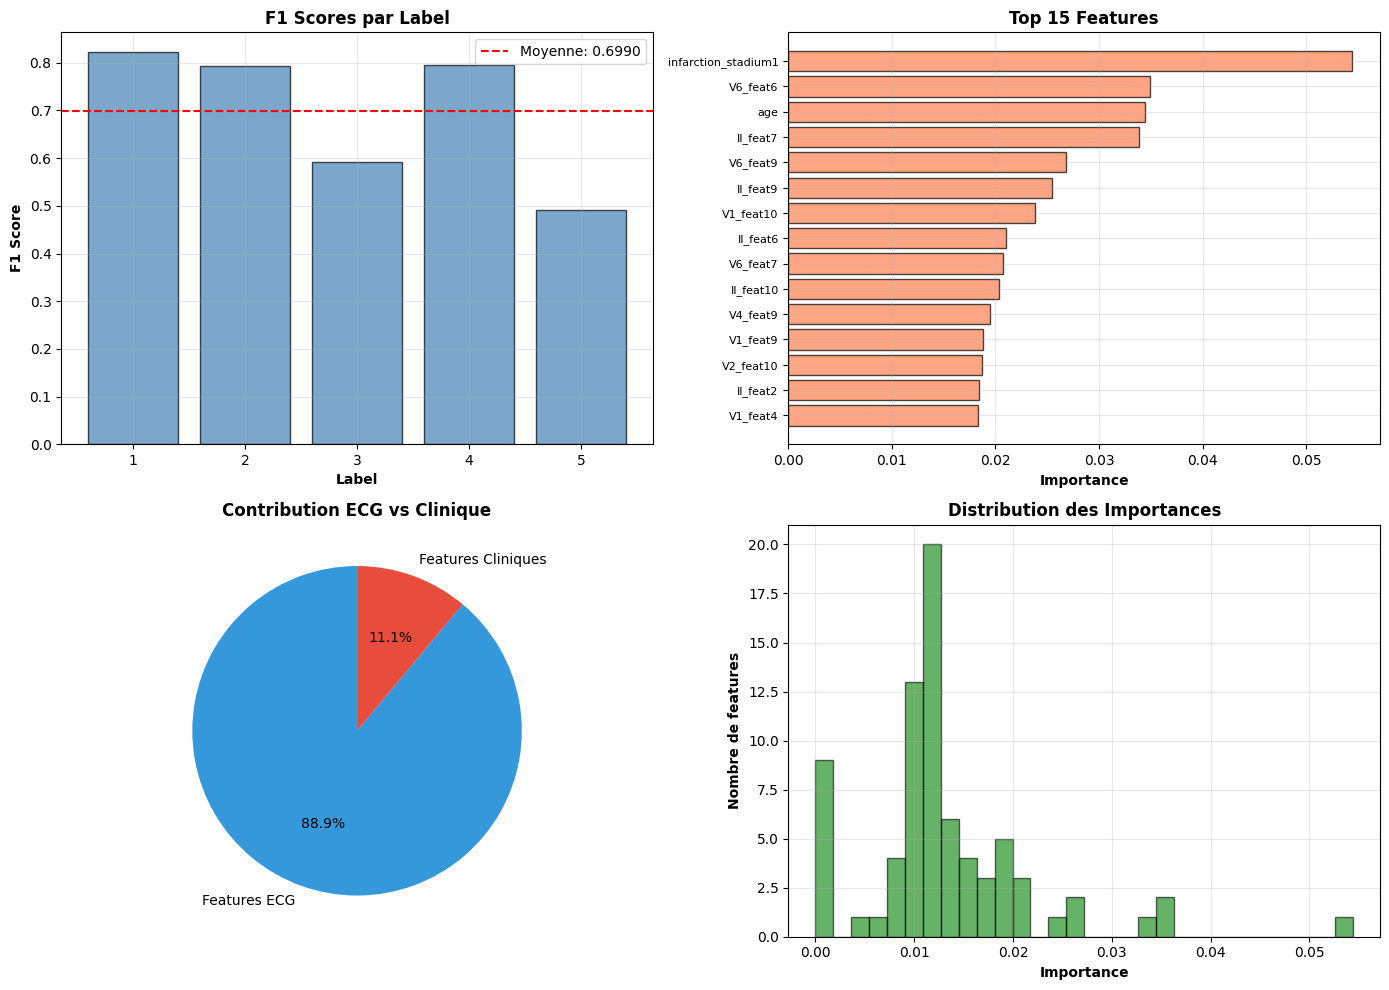

✓ Graphiques sauvegardés dans 'model_performance.png'
✓ Modèle sauvegardé: random_forest_model.pkl
✓ Infos sauvegardées: model_info.json
✓ Importances sauvegardées: feature_importances.csv

🎯 RÉSUMÉ FINAL

📊 CONFIGURATION:
  Meilleurs leads: V6, V2, II, aVL, V4, V1
  Features ECG: 69
  Features cliniques: 7
  Total features: 76

📈 PERFORMANCE:
  F1 Score Moyen: 0.6990
  F1 par label: ['0.823', '0.794', '0.591', '0.796', '0.491']

💡 IMPORTANCE:
  Contribution ECG: 88.9%
  Contribution Clinique: 11.1%

💾 FICHIERS SAUVEGARDÉS:
  ✓ random_forest_model.pkl
  ✓ model_info.json
  ✓ feature_importances.csv
  ✓ model_performance.png

✅ MODÈLE PRÊT POUR LA PRODUCTION!



In [ ]:


import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.multioutput import MultiOutputClassifier
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

print("✓ Imports OK")


# Définir les meilleurs leads (MODIFIEZ SELON VOS RÉSULTATS)
best_leads = ['V6', 'V2', 'II', 'aVL', 'V4', 'V1']

# Ou récupérer depuis best_combinations:
# best_leads = best_combinations[6]['combination'].split(' + ')

print(f"Meilleurs leads: {best_leads}")

# Combiner les features
X_ecg_features = np.hstack([all_features[lead] for lead in best_leads])

print(f"✓ Features ECG: {X_ecg_features.shape}")


# Créer le DataFrame des features cliniques
X_clinical = pd.DataFrame()

# Age
X_clinical['age'] = ECG_df.age
X_clinical.age.fillna(0, inplace=True)

# Sex
X_clinical['sex'] = ECG_df.sex.astype(float)
X_clinical.sex.fillna(0, inplace=True)

# Height
X_clinical['height'] = ECG_df.height
X_clinical.loc[X_clinical.height < 50, 'height'] = np.nan
X_clinical.height.fillna(0, inplace=True)

# Weight
X_clinical['weight'] = ECG_df.weight
X_clinical.weight.fillna(0, inplace=True)

# Infarction Stadium 1
X_clinical['infarction_stadium1'] = ECG_df.infarction_stadium1.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

# Infarction Stadium 2
X_clinical['infarction_stadium2'] = ECG_df.infarction_stadium2.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

# Pacemaker
X_clinical['pacemaker'] = (ECG_df.pacemaker == 'ja, pacemaker').astype(float)

print(f"✓ Features cliniques: {X_clinical.shape}")
print(f"\nAperçu:")
print(X_clinical.head())
print(f"\nStatistiques:")
print(X_clinical.describe())


# Convertir en numpy
X_clinical_array = X_clinical.values

# Vérification
print(f"ECG features: {X_ecg_features.shape}")
print(f"Clinical features: {X_clinical_array.shape}")

# Combiner
X_combined = np.hstack([X_ecg_features, X_clinical_array])

print(f"\n{'='*70}")
print(f"FEATURES COMBINÉES")
print(f"{'='*70}")
print(f"Features ECG: {X_ecg_features.shape[1]}")
print(f"Features cliniques: {X_clinical_array.shape[1]}")
print(f"Total features: {X_combined.shape[1]}")
print(f"Observations: {X_combined.shape[0]}")
print(f"{'='*70}")



# TRAIN / TEST SPLIT

# Préparer les labels
if isinstance(Z, pd.DataFrame):
    y = Z.to_numpy()
else:
    y = Z

# Configuration
TEST_SIZE = 0.2
RANDOM_STATE = 42

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=None
)

print(f"{'='*70}")
print(f"TRAIN / TEST SPLIT")
print(f"{'='*70}")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"Test size: {TEST_SIZE*100:.0f}%")
print(f"{'='*70}")



# ENTRAÎNEMENT RANDOM FOREST

print("Création du modèle Random Forest...")

# Modèle Random Forest
base_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

# MultiOutputClassifier
clf = MultiOutputClassifier(base_rf, n_jobs=-1)

print("\nEntraînement en cours...")
clf.fit(X_train, y_train)
print("\n✓ Entraînement terminé!")


# PRÉDICTION ET ÉVALUATION


print("Prédiction sur le test set...")
y_pred = clf.predict(X_test)

print(f"\n{'='*70}")
print(f"ÉVALUATION")
print(f"{'='*70}\n")

# F1 scores par label
f1_scores = []
n_labels = y_test.shape[1]

for i in range(n_labels):
    f1 = f1_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0)
    f1_scores.append(f1)
    print(f"Label {i+1}: F1 = {f1:.4f}")

avg_f1 = np.mean(f1_scores)

print(f"\n{'─'*70}")
print(f"📊 F1 Score Moyen: {avg_f1:.4f}")
print(f"{'─'*70}")



print(f"\n{'='*70}")
print(f"RAPPORT DÉTAILLÉ PAR LABEL")
print(f"{'='*70}\n")

for i in range(n_labels):
    print(f"\n{'─'*70}")
    print(f"LABEL {i+1}")
    print(f"{'─'*70}")
    print(classification_report(
        y_test[:, i],
        y_pred[:, i],
        target_names=['Négatif', 'Positif'],
        zero_division=0
    ))



#  IMPORTANCE DES FEATURES


print(f"\n{'='*70}")
print(f"IMPORTANCE DES FEATURES")
print(f"{'='*70}\n")

# Créer les noms de features
feature_names = []

# Features ECG
for lead in best_leads:
    n_feat = all_features[lead].shape[1]
    for i in range(n_feat):
        feature_names.append(f"{lead}_feat{i+1}")

# Features cliniques
feature_names.extend(X_clinical.columns.tolist())

# Calculer importance moyenne
importances = []
for estimator in clf.estimators_:
    importances.append(estimator.feature_importances_)
avg_importances = np.mean(importances, axis=0)

# DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': avg_importances
}).sort_values('Importance', ascending=False)

print("Top 20 features:")
print(importance_df.head(20))

# ECG vs Clinique
ecg_imp = importance_df[importance_df.Feature.str.contains('_feat')].Importance.sum()
clin_imp = importance_df[~importance_df.Feature.str.contains('_feat')].Importance.sum()
total_imp = ecg_imp + clin_imp

print(f"\n{'─'*70}")
print(f"Features ECG: {ecg_imp:.4f} ({ecg_imp/total_imp*100:.1f}%)")
print(f"Features Cliniques: {clin_imp:.4f} ({clin_imp/total_imp*100:.1f}%)")
print(f"{'─'*70}")



#  VISUALISATION DES PERFORMANCES


import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: F1 scores par label
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# F1 scores
ax1 = axes[0, 0]
ax1.bar(range(1, n_labels+1), f1_scores, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axhline(avg_f1, color='red', linestyle='--', label=f'Moyenne: {avg_f1:.4f}')
ax1.set_xlabel('Label', fontweight='bold')
ax1.set_ylabel('F1 Score', fontweight='bold')
ax1.set_title('F1 Scores par Label', fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Top 15 features
ax2 = axes[0, 1]
top15 = importance_df.head(15)
ax2.barh(range(15), top15.Importance, color='coral', alpha=0.7, edgecolor='black')
ax2.set_yticks(range(15))
ax2.set_yticklabels(top15.Feature, fontsize=8)
ax2.set_xlabel('Importance', fontweight='bold')
ax2.set_title('Top 15 Features', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(alpha=0.3)

# ECG vs Clinique
ax3 = axes[1, 0]
categories = ['Features ECG', 'Features Cliniques']
values = [ecg_imp, clin_imp]
colors = ['#3498db', '#e74c3c']
ax3.pie(values, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Contribution ECG vs Clinique', fontweight='bold')

# Distribution des importances
ax4 = axes[1, 1]
ax4.hist(avg_importances, bins=30, color='green', alpha=0.6, edgecolor='black')
ax4.set_xlabel('Importance', fontweight='bold')
ax4.set_ylabel('Nombre de features', fontweight='bold')
ax4.set_title('Distribution des Importances', fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphiques sauvegardés dans 'model_performance.png'")



#  SAUVEGARDE DU MODÈLE


# Sauvegarder le modèle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(clf, f)
print("✓ Modèle sauvegardé: random_forest_model.pkl")

# Sauvegarder les infos
model_info = {
    'best_leads': best_leads,
    'n_ecg_features': X_ecg_features.shape[1],
    'n_clinical_features': X_clinical_array.shape[1],
    'n_total_features': X_combined.shape[1],
    'feature_names': feature_names,
    'f1_scores': {f'label_{i+1}': float(f1) for i, f1 in enumerate(f1_scores)},
    'avg_f1_score': float(avg_f1),
    'test_size': TEST_SIZE,
    'random_state': RANDOM_STATE
}

with open('model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)
print("✓ Infos sauvegardées: model_info.json")

# Sauvegarder les importances
importance_df.to_csv('feature_importances.csv', index=False)
print("✓ Importances sauvegardées: feature_importances.csv")




print(f"\n{'='*70}")
print(f"🎯 RÉSUMÉ FINAL")
print(f"{'='*70}")
print(f"\n📊 CONFIGURATION:")
print(f"  Meilleurs leads: {', '.join(best_leads)}")
print(f"  Features ECG: {X_ecg_features.shape[1]}")
print(f"  Features cliniques: {X_clinical_array.shape[1]}")
print(f"  Total features: {X_combined.shape[1]}")
print(f"\n📈 PERFORMANCE:")
print(f"  F1 Score Moyen: {avg_f1:.4f}")
print(f"  F1 par label: {[f'{f:.3f}' for f in f1_scores]}")
print(f"\n💡 IMPORTANCE:")
print(f"  Contribution ECG: {ecg_imp/total_imp*100:.1f}%")
print(f"  Contribution Clinique: {clin_imp/total_imp*100:.1f}%")
print(f"\n💾 FICHIERS SAUVEGARDÉS:")
print(f"  ✓ random_forest_model.pkl")
print(f"  ✓ model_info.json")
print(f"  ✓ feature_importances.csv")
print(f"  ✓ model_performance.png")
print(f"\n{'='*70}")
print(f"✅ MODÈLE PRÊT POUR LA PRODUCTION!")
print(f"{'='*70}\n")



**Validation du modèle**

Prédiction sur le test set...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      |


MÉTRIQUES COMPLÈTES PAR LABEL

──────────────────────────────────────────────────────────────────────
LABEL 1
──────────────────────────────────────────────────────────────────────
  Accuracy:    0.8244
  Precision:   0.8089
  Recall (Sensitivity): 0.8028
  Specificity: 0.8423
  F1 Score:    0.8059
  AUC-ROC:     0.9073
  AUC-PR:      0.8849
──────────────────────────────────────────────────────────────────────
LABEL 2
──────────────────────────────────────────────────────────────────────
  Accuracy:    0.8654
  Precision:   0.8693
  Recall (Sensitivity): 0.5490
  Specificity: 0.9721
  F1 Score:    0.6730
  AUC-ROC:     0.9006
  AUC-PR:      0.8114
──────────────────────────────────────────────────────────────────────
LABEL 3
──────────────────────────────────────────────────────────────────────
  Accuracy:    0.7887
  Precision:   0.7391
  Recall (Sensitivity): 0.1934
  Specificity: 0.9783
  F1 Score:    0.3065
  AUC-ROC:     0.8376
  AUC-PR:      0.6082
─────────────────────────────

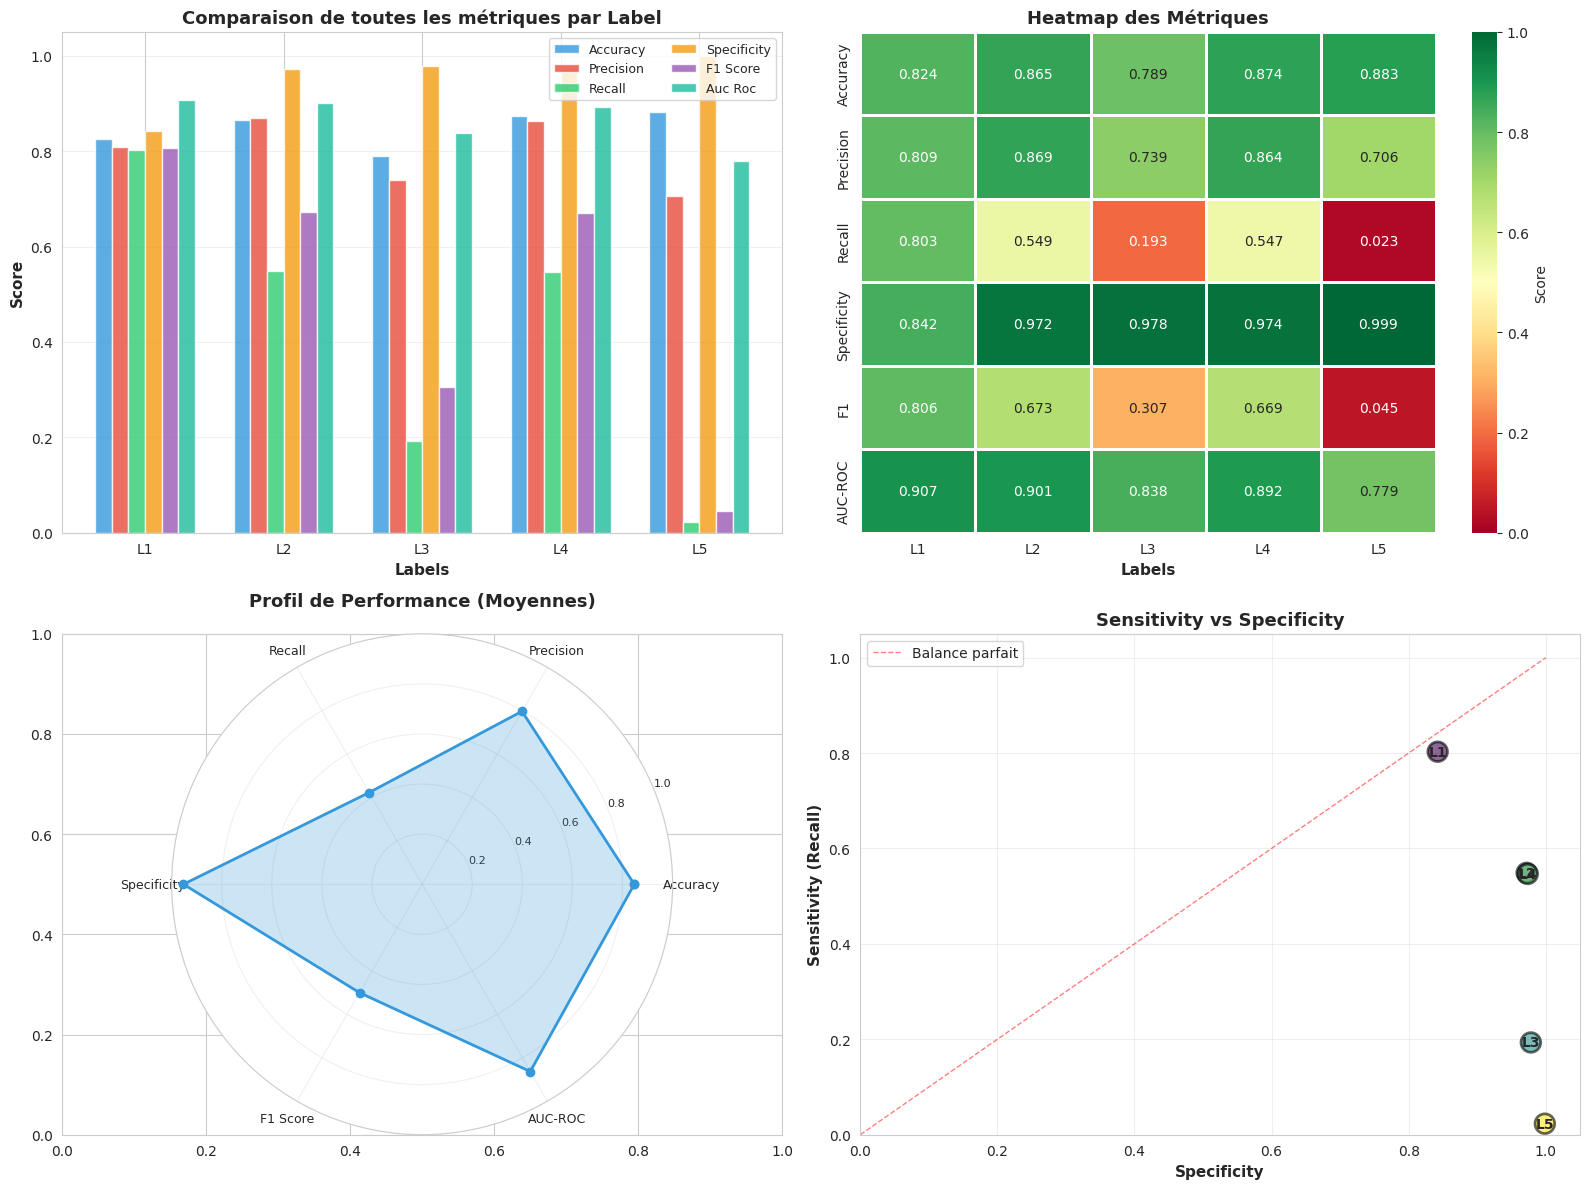

✓ Figure 1 sauvegardée: metrics_overview.png


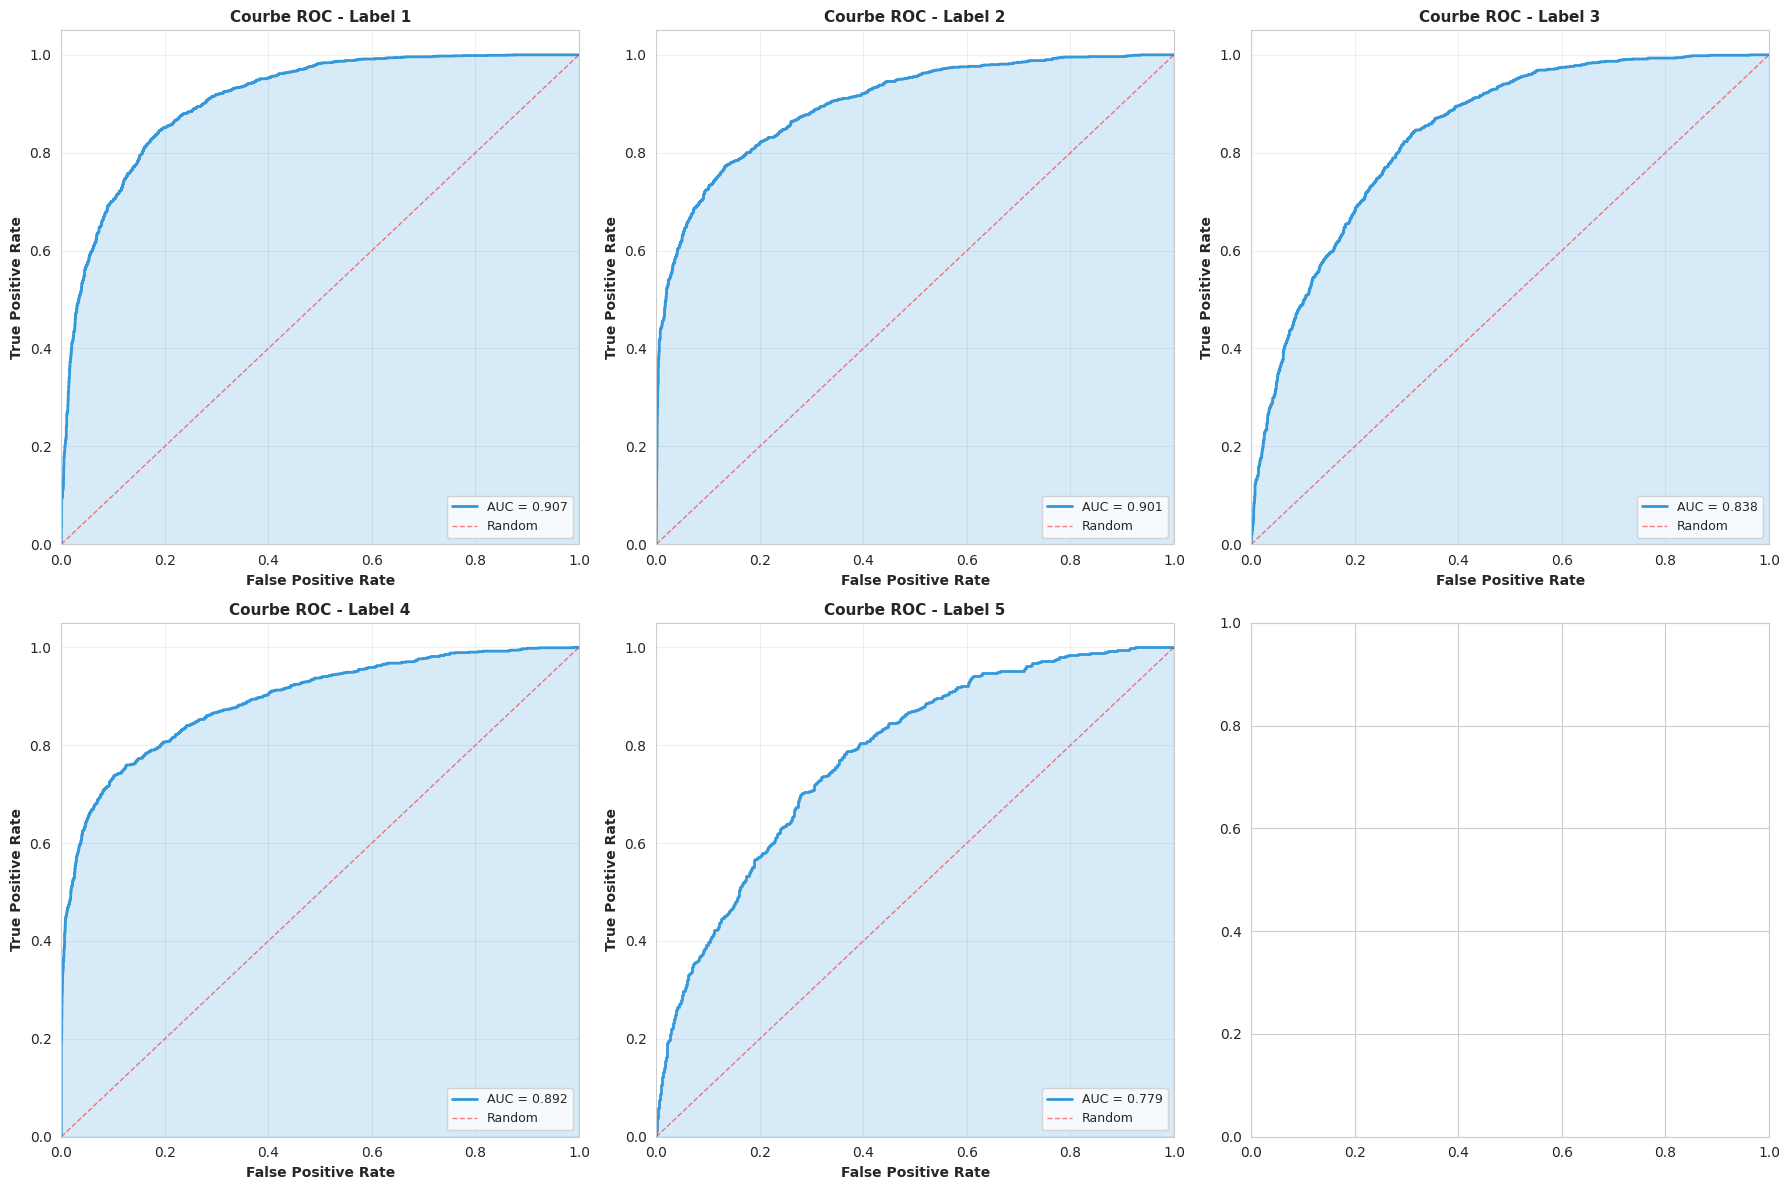

✓ Figure 2 sauvegardée: roc_curves.png


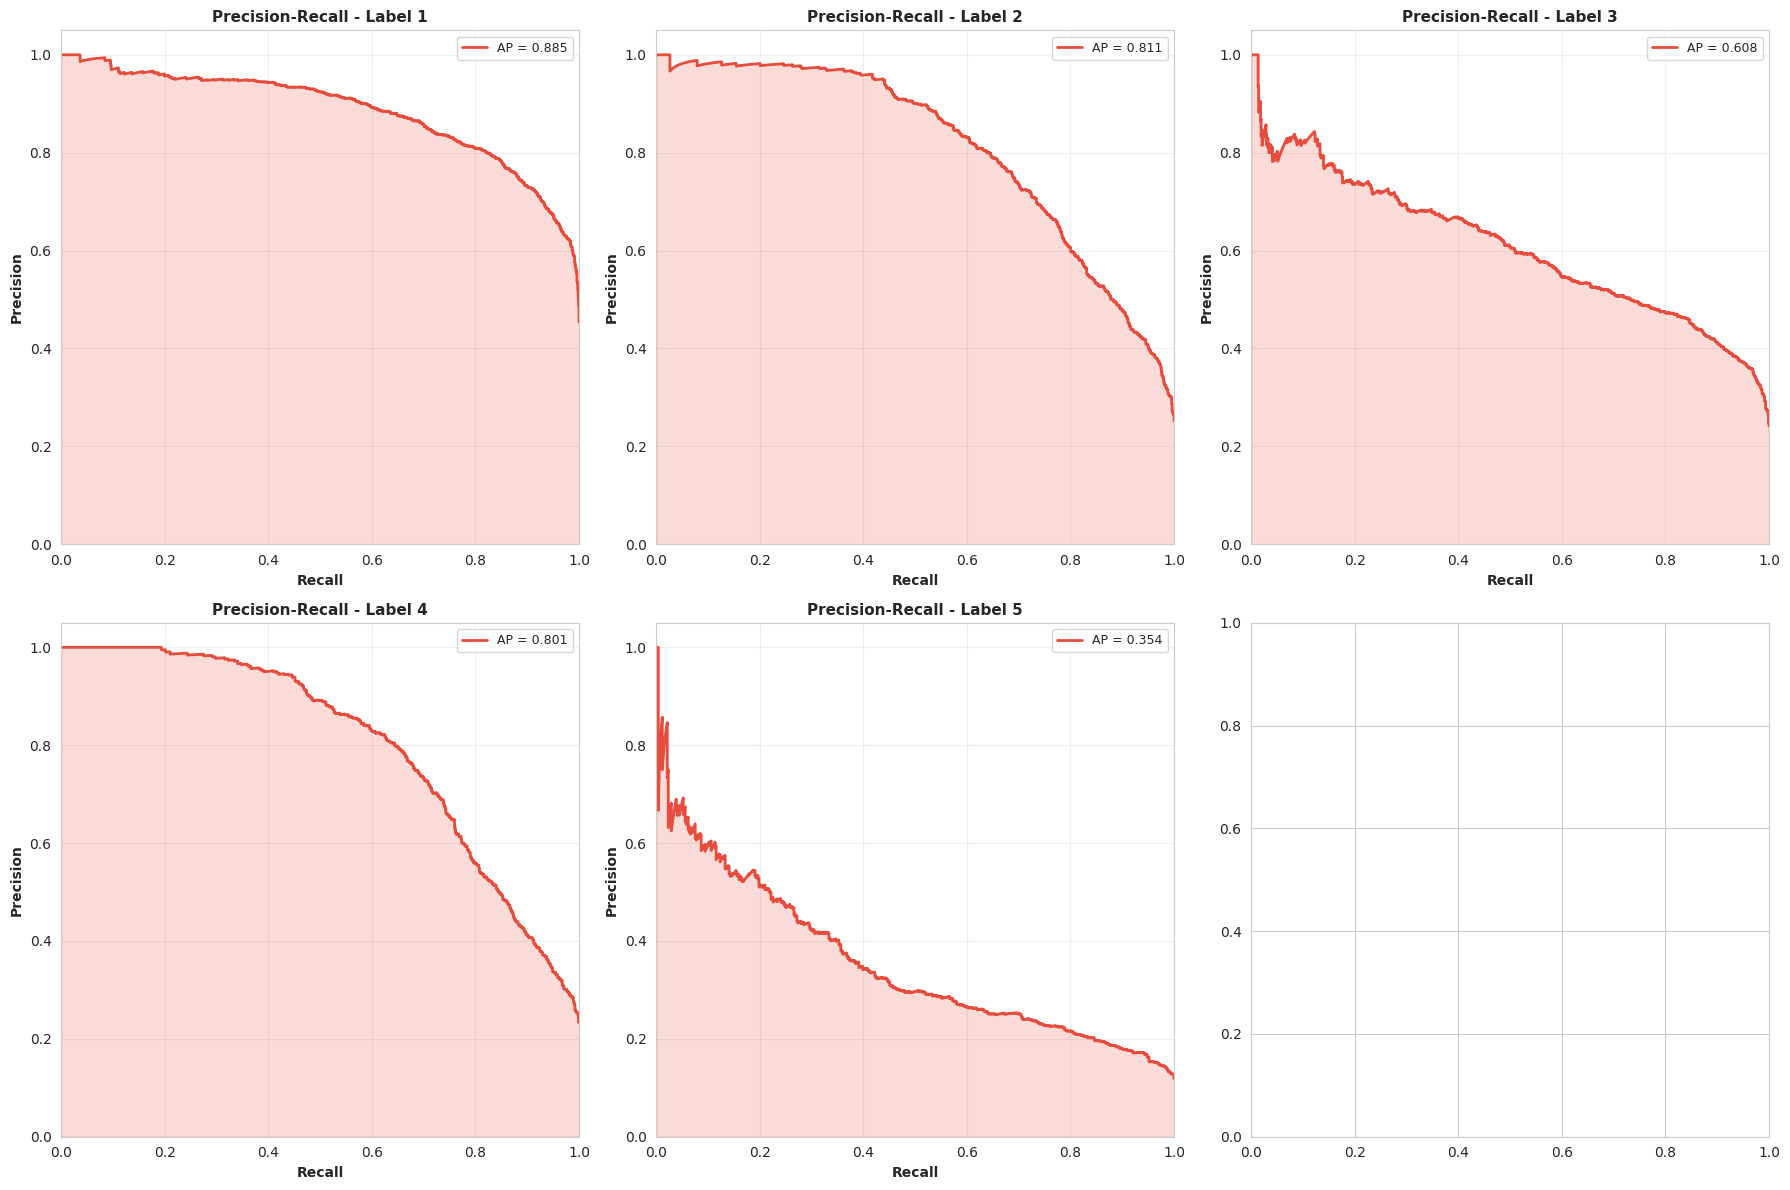

✓ Figure 3 sauvegardée: precision_recall_curves.png


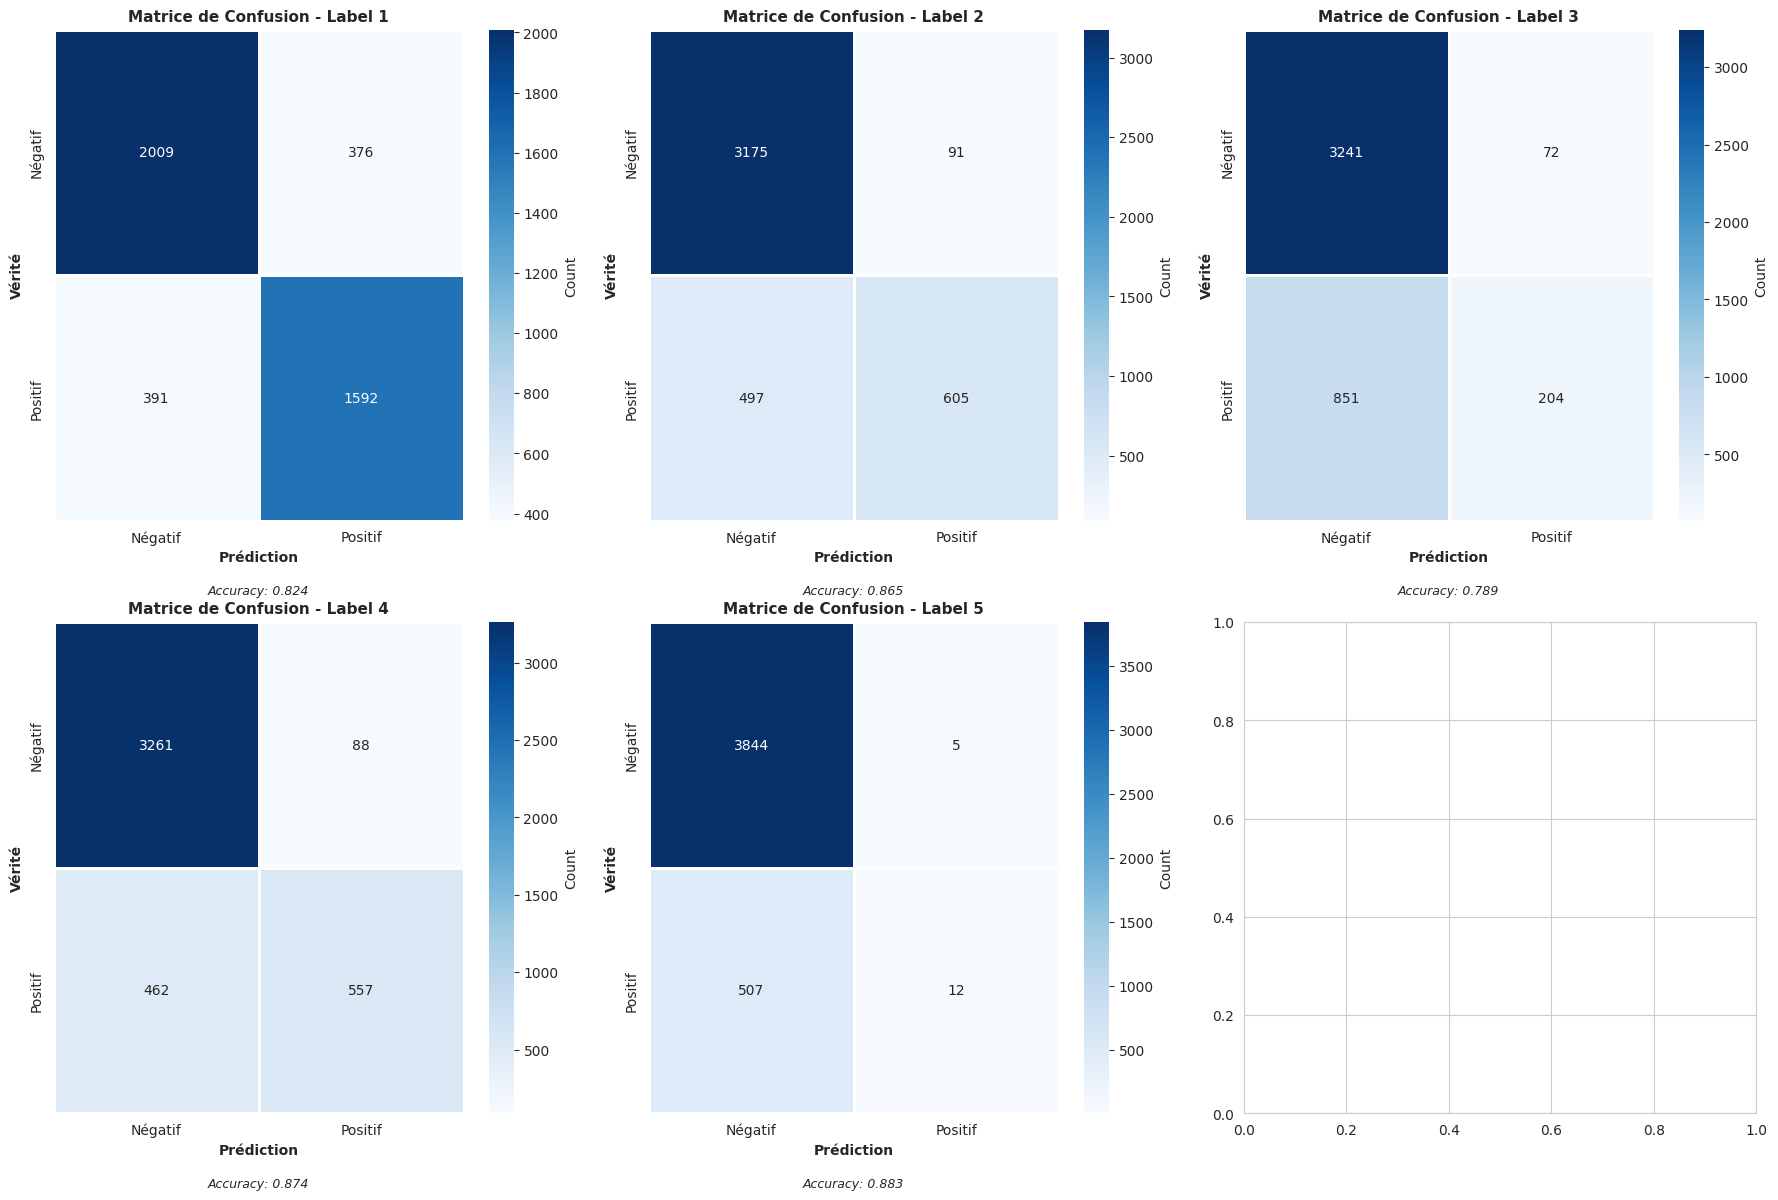

✓ Figure 4 sauvegardée: confusion_matrices.png


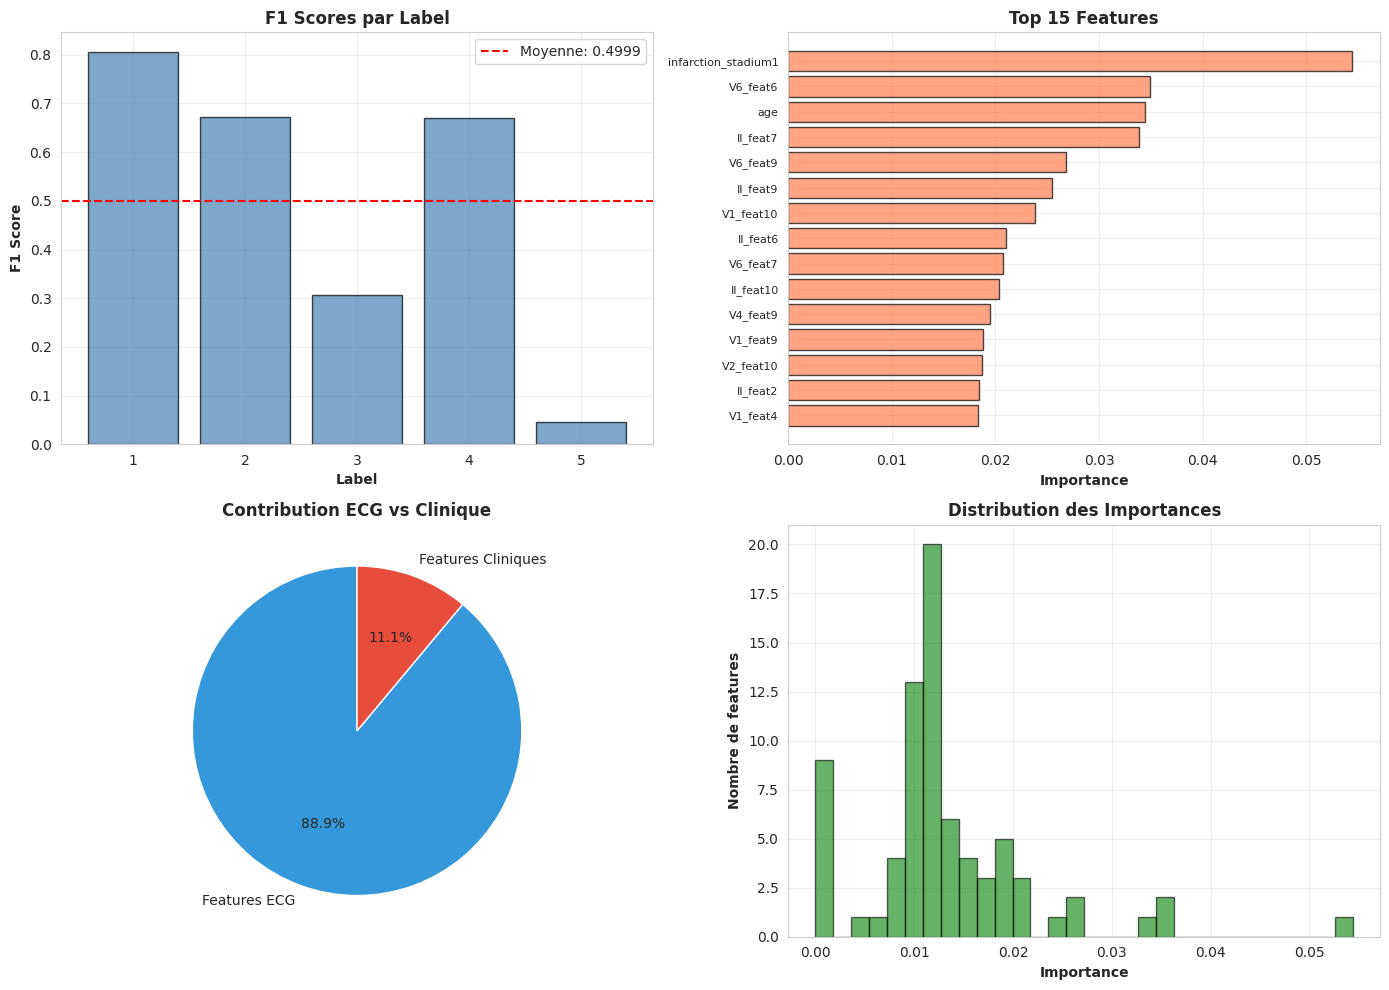

✓ Figure 5 sauvegardée: model_performance.png
✓ Métriques détaillées sauvegardées: detailed_metrics.csv

🎯 RÉSUMÉ COMPLET DES PERFORMANCES

📊 MÉTRIQUES MOYENNES:
  Accuracy:       0.8471
  Precision:      0.7974
  Recall:         0.4230
  Specificity:    0.9530
  F1 Score:       0.4999
  AUC-ROC:        0.8633
  AUC-PR:         0.6920

💾 FICHIERS SAUVEGARDÉS:
  ✓ metrics_overview.png
  ✓ roc_curves.png
  ✓ precision_recall_curves.png
  ✓ confusion_matrices.png
  ✓ model_performance.png
  ✓ detailed_metrics.csv
  ✓ random_forest_model.pkl
  ✓ model_info.json
  ✓ feature_importances.csv

✅ ÉVALUATION COMPLÈTE TERMINÉE!



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix,
    precision_recall_curve, average_precision_score
)

# PRÉDICTION ET PROBABILITÉS
print("Prédiction sur le test set...")
y_pred = clf.predict(X_test)

# Obtenir les probabilités pour AUC
y_pred_proba = np.zeros((X_test.shape[0], y_test.shape[1]))
for i, estimator in enumerate(clf.estimators_):
    y_pred_proba[:, i] = estimator.predict_proba(X_test)[:, 1]

print(f"\n{'='*70}")
print(f"MÉTRIQUES COMPLÈTES PAR LABEL")
print(f"{'='*70}\n")

# Calcul de toutes les métriques
n_labels = y_test.shape[1]
metrics_summary = {
    'label': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'specificity': [],
    'f1_score': [],
    'auc_roc': [],
    'auc_pr': []
}

for i in range(n_labels):
    # Métriques de base
    acc = accuracy_score(y_test[:, i], y_pred[:, i])
    prec = precision_score(y_test[:, i], y_pred[:, i], average='binary', zero_division=0)
    rec = recall_score(y_test[:, i], y_pred[:, i], average='binary', zero_division=0)
    f1 = f1_score(y_test[:, i], y_pred[:, i], average='binary', zero_division=0)

    # Confusion matrix pour specificity
    tn, fp, fn, tp = confusion_matrix(y_test[:, i], y_pred[:, i]).ravel()
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0

    # AUC scores
    try:
        auc_roc = roc_auc_score(y_test[:, i], y_pred_proba[:, i])
    except:
        auc_roc = 0.5

    try:
        auc_pr = average_precision_score(y_test[:, i], y_pred_proba[:, i])
    except:
        auc_pr = 0.0

    # Stockage
    metrics_summary['label'].append(f'Label {i+1}')
    metrics_summary['accuracy'].append(acc)
    metrics_summary['precision'].append(prec)
    metrics_summary['recall'].append(rec)
    metrics_summary['specificity'].append(spec)
    metrics_summary['f1_score'].append(f1)
    metrics_summary['auc_roc'].append(auc_roc)
    metrics_summary['auc_pr'].append(auc_pr)

    # Affichage
    print(f"{'─'*70}")
    print(f"LABEL {i+1}")
    print(f"{'─'*70}")
    print(f"  Accuracy:    {acc:.4f}")
    print(f"  Precision:   {prec:.4f}")
    print(f"  Recall (Sensitivity): {rec:.4f}")
    print(f"  Specificity: {spec:.4f}")
    print(f"  F1 Score:    {f1:.4f}")
    print(f"  AUC-ROC:     {auc_roc:.4f}")
    print(f"  AUC-PR:      {auc_pr:.4f}")

# Moyennes
print(f"\n{'='*70}")
print(f"📊 MOYENNES GLOBALES")
print(f"{'='*70}")
print(f"  Accuracy moyenne:    {np.mean(metrics_summary['accuracy']):.4f}")
print(f"  Precision moyenne:   {np.mean(metrics_summary['precision']):.4f}")
print(f"  Recall moyenne:      {np.mean(metrics_summary['recall']):.4f}")
print(f"  Specificity moyenne: {np.mean(metrics_summary['specificity']):.4f}")
print(f"  F1 Score moyen:      {np.mean(metrics_summary['f1_score']):.4f}")
print(f"  AUC-ROC moyen:       {np.mean(metrics_summary['auc_roc']):.4f}")
print(f"  AUC-PR moyen:        {np.mean(metrics_summary['auc_pr']):.4f}")
print(f"{'='*70}\n")

# Créer DataFrame des métriques
metrics_df = pd.DataFrame(metrics_summary)


# ========================================================================
# VISUALISATIONS COMPLÈTES
# ========================================================================

# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# FIGURE 1: Vue d'ensemble des métriques
fig1, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1.1: Toutes les métriques par label
ax1 = axes[0, 0]
x = np.arange(n_labels)
width = 0.12
metrics_to_plot = ['accuracy', 'precision', 'recall', 'specificity', 'f1_score', 'auc_roc']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    offset = width * (idx - len(metrics_to_plot)/2 + 0.5)
    ax1.bar(x + offset, metrics_summary[metric], width,
            label=metric.replace('_', ' ').title(), color=color, alpha=0.8)

ax1.set_xlabel('Labels', fontweight='bold', fontsize=11)
ax1.set_ylabel('Score', fontweight='bold', fontsize=11)
ax1.set_title('Comparaison de toutes les métriques par Label', fontweight='bold', fontsize=13)
ax1.set_xticks(x)
ax1.set_xticklabels([f'L{i+1}' for i in range(n_labels)])
ax1.legend(loc='upper right', fontsize=9, ncol=2)
ax1.set_ylim([0, 1.05])
ax1.grid(alpha=0.3, axis='y')

# 1.2: Heatmap des métriques
ax2 = axes[0, 1]
heatmap_data = metrics_df[['accuracy', 'precision', 'recall', 'specificity', 'f1_score', 'auc_roc']].T
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
            center=0.5, vmin=0, vmax=1, cbar_kws={'label': 'Score'},
            xticklabels=[f'L{i+1}' for i in range(n_labels)],
            yticklabels=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1', 'AUC-ROC'],
            ax=ax2, linewidths=1, linecolor='white')
ax2.set_title('Heatmap des Métriques', fontweight='bold', fontsize=13)
ax2.set_xlabel('Labels', fontweight='bold', fontsize=11)

# 1.3: Radar chart des moyennes
ax3 = axes[1, 0]
categories = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'AUC-ROC']
values = [
    np.mean(metrics_summary['accuracy']),
    np.mean(metrics_summary['precision']),
    np.mean(metrics_summary['recall']),
    np.mean(metrics_summary['specificity']),
    np.mean(metrics_summary['f1_score']),
    np.mean(metrics_summary['auc_roc'])
]

# Créer le radar plot
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values_plot = values + values[:1]
angles += angles[:1]

ax3 = plt.subplot(2, 2, 3, projection='polar')
ax3.plot(angles, values_plot, 'o-', linewidth=2, color='#3498db', label='Moyenne')
ax3.fill(angles, values_plot, alpha=0.25, color='#3498db')
ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(categories, fontsize=9)
ax3.set_ylim(0, 1)
ax3.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax3.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=8)
ax3.set_title('Profil de Performance (Moyennes)', fontweight='bold', fontsize=13, pad=20)
ax3.grid(True, alpha=0.3)

# 1.4: Comparaison Sensitivity vs Specificity
ax4 = axes[1, 1]
ax4.scatter(metrics_summary['specificity'], metrics_summary['recall'],
           s=200, alpha=0.6, c=range(n_labels), cmap='viridis', edgecolors='black', linewidth=2)
for i in range(n_labels):
    ax4.annotate(f'L{i+1}',
                (metrics_summary['specificity'][i], metrics_summary['recall'][i]),
                fontsize=10, fontweight='bold', ha='center', va='center')
ax4.plot([0, 1], [0, 1], 'r--', alpha=0.5, linewidth=1, label='Balance parfait')
ax4.set_xlabel('Specificity', fontweight='bold', fontsize=11)
ax4.set_ylabel('Sensitivity (Recall)', fontweight='bold', fontsize=11)
ax4.set_title('Sensitivity vs Specificity', fontweight='bold', fontsize=13)
ax4.set_xlim([0, 1.05])
ax4.set_ylim([0, 1.05])
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('metrics_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 1 sauvegardée: metrics_overview.png")


# FIGURE 2: Courbes ROC et Precision-Recall
fig2, axes = plt.subplots(2, 3, figsize=(18, 12))

# Courbes ROC
for i in range(n_labels):
    ax = axes[0, i % 3] if i < 3 else axes[1, (i-3) % 3]

    try:
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        auc_score = roc_auc_score(y_test[:, i], y_pred_proba[:, i])

        ax.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc_score:.3f}', color='#3498db')
        ax.plot([0, 1], [0, 1], 'r--', linewidth=1, alpha=0.5, label='Random')
        ax.fill_between(fpr, tpr, alpha=0.2, color='#3498db')

        ax.set_xlabel('False Positive Rate', fontweight='bold', fontsize=10)
        ax.set_ylabel('True Positive Rate', fontweight='bold', fontsize=10)
        ax.set_title(f'Courbe ROC - Label {i+1}', fontweight='bold', fontsize=11)
        ax.legend(loc='lower right', fontsize=9)
        ax.grid(alpha=0.3)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1.05])
    except:
        ax.text(0.5, 0.5, 'Données insuffisantes', ha='center', va='center', fontsize=10)
        ax.set_title(f'Courbe ROC - Label {i+1}', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 2 sauvegardée: roc_curves.png")


# FIGURE 3: Precision-Recall curves
fig3, axes = plt.subplots(2, 3, figsize=(18, 12))

for i in range(n_labels):
    ax = axes[0, i % 3] if i < 3 else axes[1, (i-3) % 3]

    try:
        precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_proba[:, i])
        ap_score = average_precision_score(y_test[:, i], y_pred_proba[:, i])

        ax.plot(recall, precision, linewidth=2, label=f'AP = {ap_score:.3f}', color='#e74c3c')
        ax.fill_between(recall, precision, alpha=0.2, color='#e74c3c')

        ax.set_xlabel('Recall', fontweight='bold', fontsize=10)
        ax.set_ylabel('Precision', fontweight='bold', fontsize=10)
        ax.set_title(f'Precision-Recall - Label {i+1}', fontweight='bold', fontsize=11)
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(alpha=0.3)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1.05])
    except:
        ax.text(0.5, 0.5, 'Données insuffisantes', ha='center', va='center', fontsize=10)
        ax.set_title(f'Precision-Recall - Label {i+1}', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('precision_recall_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 3 sauvegardée: precision_recall_curves.png")


# FIGURE 4: Matrices de confusion
fig4, axes = plt.subplots(2, 3, figsize=(18, 12))

for i in range(n_labels):
    ax = axes[0, i % 3] if i < 3 else axes[1, (i-3) % 3]

    cm = confusion_matrix(y_test[:, i], y_pred[:, i])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Négatif', 'Positif'],
                yticklabels=['Négatif', 'Positif'],
                ax=ax, cbar_kws={'label': 'Count'}, linewidths=2, linecolor='white')

    ax.set_xlabel('Prédiction', fontweight='bold', fontsize=10)
    ax.set_ylabel('Vérité', fontweight='bold', fontsize=10)
    ax.set_title(f'Matrice de Confusion - Label {i+1}', fontweight='bold', fontsize=11)

    # Ajouter les taux
    tn, fp, fn, tp = cm.ravel()
    total = tn + fp + fn + tp
    acc = (tp + tn) / total
    ax.text(0.5, -0.15, f'Accuracy: {acc:.3f}',
            transform=ax.transAxes, ha='center', fontsize=9, style='italic')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 4 sauvegardée: confusion_matrices.png")


# FIGURE 5: Figure originale + ECG vs Clinique (gardée du code original)
fig5, axes = plt.subplots(2, 2, figsize=(14, 10))

# F1 scores
ax1 = axes[0, 0]
ax1.bar(range(1, n_labels+1), metrics_summary['f1_score'],
        color='steelblue', alpha=0.7, edgecolor='black')
ax1.axhline(np.mean(metrics_summary['f1_score']), color='red', linestyle='--',
            label=f'Moyenne: {np.mean(metrics_summary["f1_score"]):.4f}')
ax1.set_xlabel('Label', fontweight='bold')
ax1.set_ylabel('F1 Score', fontweight='bold')
ax1.set_title('F1 Scores par Label', fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Top 15 features
ax2 = axes[0, 1]
top15 = importance_df.head(15)
ax2.barh(range(15), top15.Importance, color='coral', alpha=0.7, edgecolor='black')
ax2.set_yticks(range(15))
ax2.set_yticklabels(top15.Feature, fontsize=8)
ax2.set_xlabel('Importance', fontweight='bold')
ax2.set_title('Top 15 Features', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(alpha=0.3)

# ECG vs Clinique
ax3 = axes[1, 0]
categories = ['Features ECG', 'Features Cliniques']
values = [ecg_imp, clin_imp]
colors = ['#3498db', '#e74c3c']
ax3.pie(values, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
ax3.set_title('Contribution ECG vs Clinique', fontweight='bold')

# Distribution des importances
ax4 = axes[1, 1]
ax4.hist(avg_importances, bins=30, color='green', alpha=0.6, edgecolor='black')
ax4.set_xlabel('Importance', fontweight='bold')
ax4.set_ylabel('Nombre de features', fontweight='bold')
ax4.set_title('Distribution des Importances', fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 5 sauvegardée: model_performance.png")


# SAUVEGARDER LES MÉTRIQUES
metrics_df.to_csv('detailed_metrics.csv', index=False)
print("✓ Métriques détaillées sauvegardées: detailed_metrics.csv")


# RÉSUMÉ FINAL AMÉLIORÉ
print(f"\n{'='*70}")
print(f"🎯 RÉSUMÉ COMPLET DES PERFORMANCES")
print(f"{'='*70}")
print(f"\n📊 MÉTRIQUES MOYENNES:")
print(f"  Accuracy:       {np.mean(metrics_summary['accuracy']):.4f}")
print(f"  Precision:      {np.mean(metrics_summary['precision']):.4f}")
print(f"  Recall:         {np.mean(metrics_summary['recall']):.4f}")
print(f"  Specificity:    {np.mean(metrics_summary['specificity']):.4f}")
print(f"  F1 Score:       {np.mean(metrics_summary['f1_score']):.4f}")
print(f"  AUC-ROC:        {np.mean(metrics_summary['auc_roc']):.4f}")
print(f"  AUC-PR:         {np.mean(metrics_summary['auc_pr']):.4f}")
print(f"\n💾 FICHIERS SAUVEGARDÉS:")
print(f"  ✓ metrics_overview.png")
print(f"  ✓ roc_curves.png")
print(f"  ✓ precision_recall_curves.png")
print(f"  ✓ confusion_matrices.png")
print(f"  ✓ model_performance.png")
print(f"  ✓ detailed_metrics.csv")
print(f"  ✓ random_forest_model.pkl")
print(f"  ✓ model_info.json")
print(f"  ✓ feature_importances.csv")
print(f"\n{'='*70}")
print(f"✅ ÉVALUATION COMPLÈTE TERMINÉE!")
print(f"{'='*70}\n")

**Cross validation**

🔄 CROSS-VALIDATION ET RÉ-ÉVALUATION

ÉTAPE 1: PRÉPARATION DES DONNÉES
✓ Dataset complet: (21837, 76)
✓ Train set: (17469, 76)
✓ Test set: (4368, 76)
✓ Nombre de labels: 5
✓ Nombre de folds: 5

ÉTAPE 2: CROSS-VALIDATION K-FOLD

Début de la 5-Fold Cross-Validation...

──────────────────────────────────────────────────────────────────────
FOLD 1/5
──────────────────────────────────────────────────────────────────────
  Train: 13975 observations
  Val:   3494 observations
  Entraînement...

  Métriques par label:
    Label 1: F1=0.8068, Acc=0.8082, Prec=0.8073, Rec=0.8064
    Label 2: F1=0.7962, Acc=0.8712, Prec=0.8687, Rec=0.7614
    Label 3: F1=0.5587, Acc=0.7768, Prec=0.7483, Rec=0.5655
    Label 4: F1=0.8028, Acc=0.8829, Prec=0.8630, Rec=0.7694
    Label 5: F1=0.4861, Acc=0.8698, Prec=0.8197, Rec=0.5103

  ✓ F1 Score moyen du fold: 0.6901

──────────────────────────────────────────────────────────────────────
FOLD 2/5
────────────────────────────────────────────────────────────────────

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      |


Performances sur le test set:

  Label 1:
    F1 Score:    0.8228
    Accuracy:    0.8244
    Precision:   0.8230
    Recall:      0.8226
    Specificity: 0.8423
    AUC-ROC:     0.9073

  Label 2:
    F1 Score:    0.7941
    Accuracy:    0.8654
    Precision:   0.8670
    Recall:      0.7606
    Specificity: 0.9721
    AUC-ROC:     0.9006

  Label 3:
    F1 Score:    0.5909
    Accuracy:    0.7887
    Precision:   0.7656
    Recall:      0.5858
    Specificity: 0.9783
    AUC-ROC:     0.8376

  Label 4:
    F1 Score:    0.7958
    Accuracy:    0.8741
    Precision:   0.8697
    Recall:      0.7602
    Specificity: 0.9737
    AUC-ROC:     0.8918

  Label 5:
    F1 Score:    0.4912
    Accuracy:    0.8828
    Precision:   0.7947
    Recall:      0.5109
    Specificity: 0.9987
    AUC-ROC:     0.7793

──────────────────────────────────────────────────────────────────────
📊 MOYENNES TEST SET:
   F1 Score:  0.6990
   Accuracy:  0.8471
   AUC-ROC:   0.8633
─────────────────────────────────

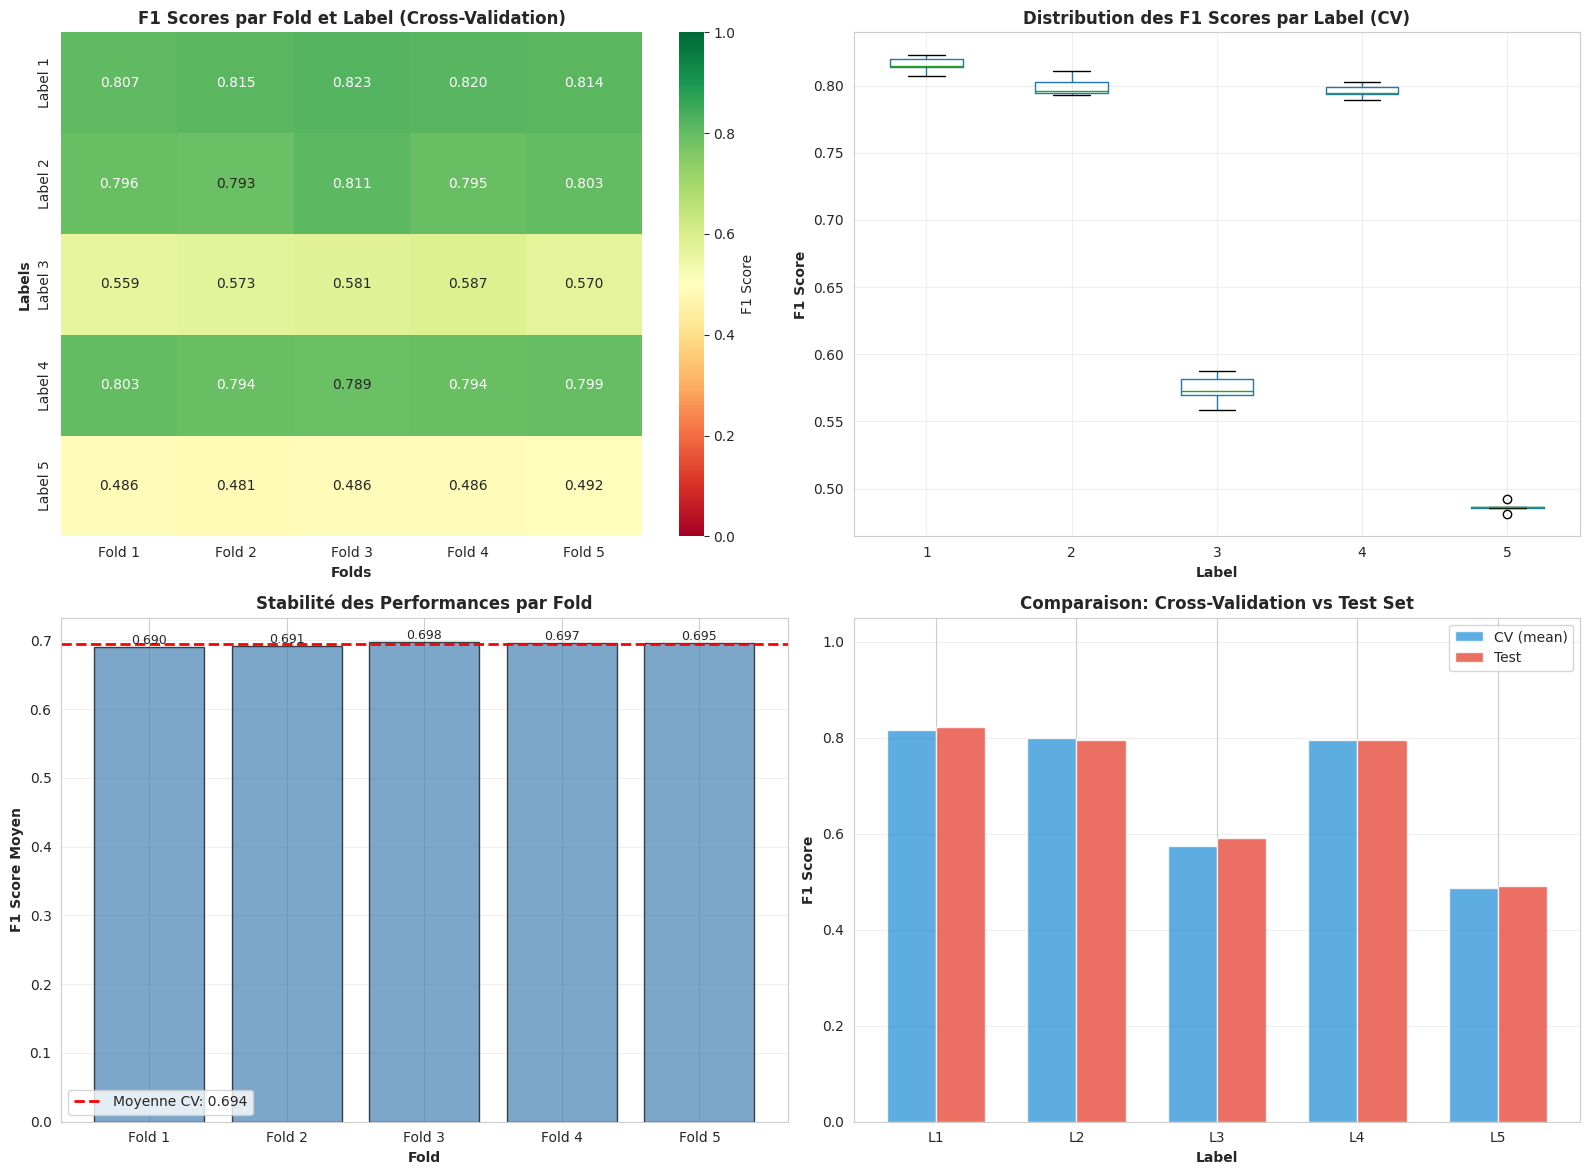

✓ Figure 1 sauvegardée: cross_validation_results.png


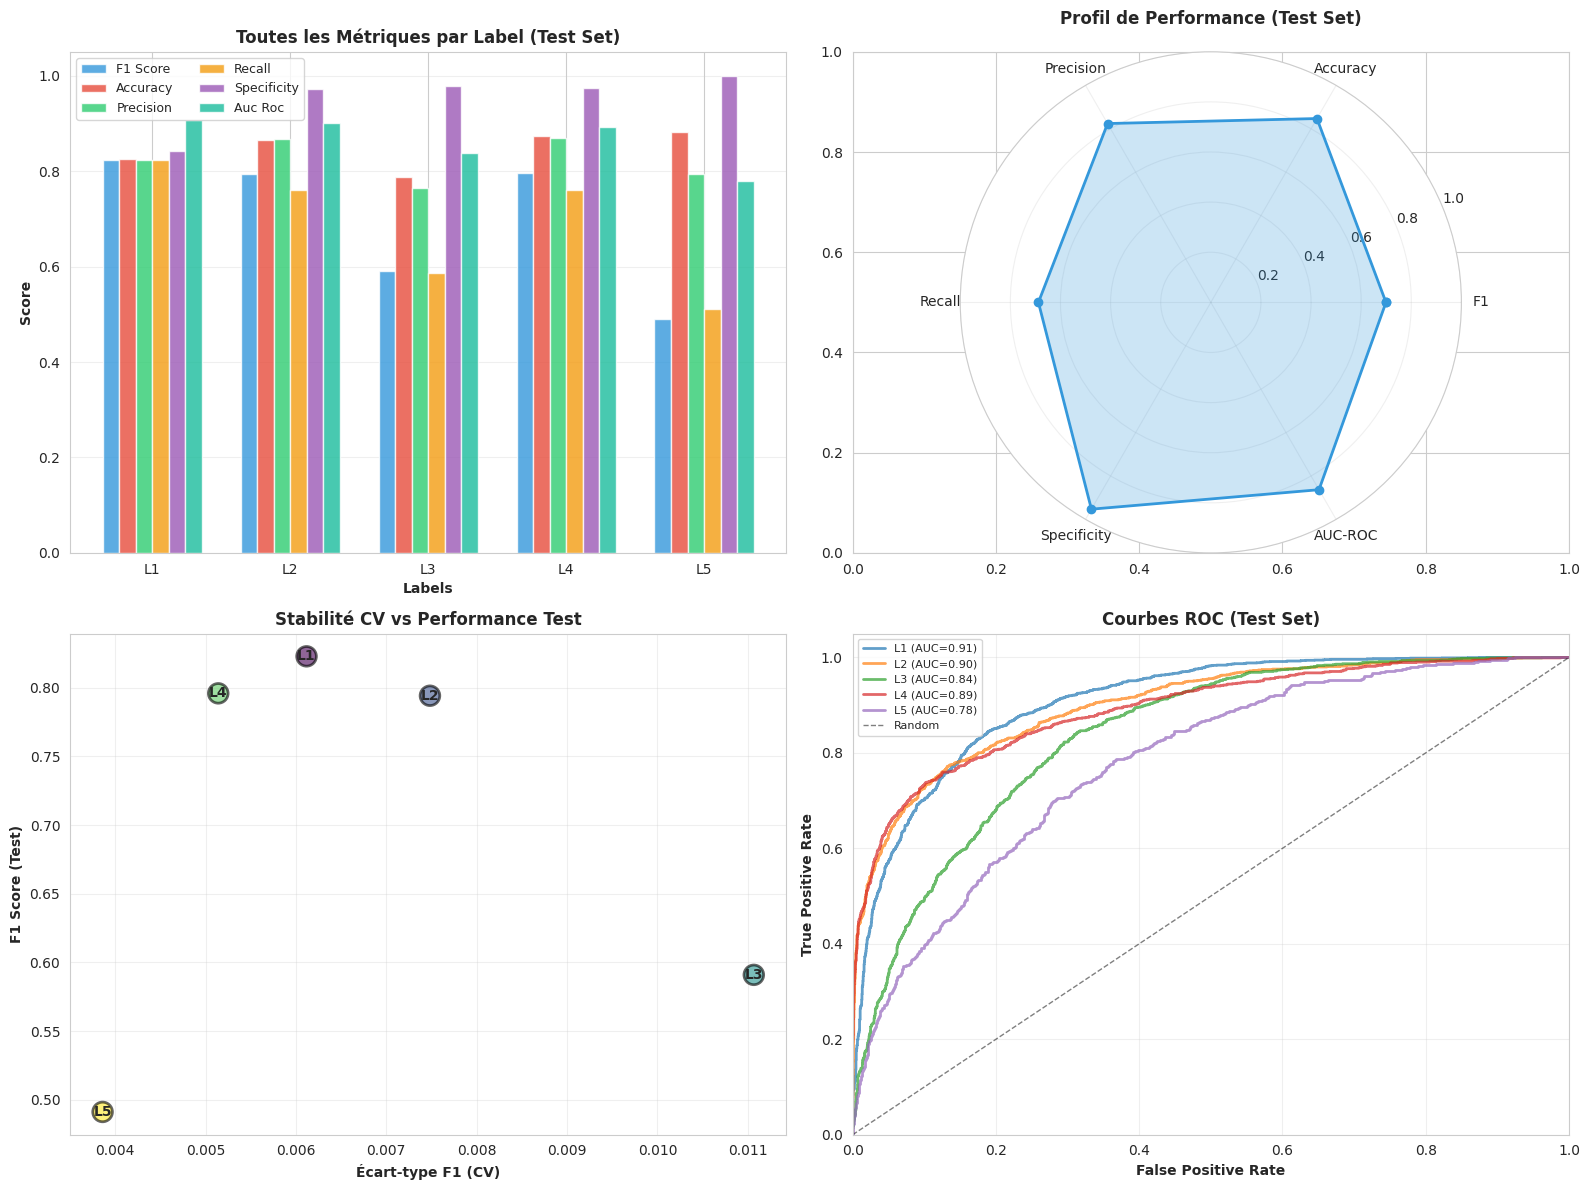

✓ Figure 2 sauvegardée: test_set_detailed_metrics.png

ÉTAPE 6: SAUVEGARDE DES RÉSULTATS
✓ Modèle final sauvegardé: random_forest_cv_final.pkl
✓ Résultats CV sauvegardés: cross_validation_results.csv
✓ Résultats test sauvegardés: test_set_results.csv
✓ Informations sauvegardées: cv_evaluation_info.json

🎯 RÉSUMÉ FINAL

📊 CROSS-VALIDATION (5 FOLDS):
   F1 Score: 0.6943 ± 0.1399
   Plage:    [0.4814, 0.8226]

📈 TEST SET:
   F1 Score:  0.6990
   Accuracy:  0.8471
   AUC-ROC:   0.8633

💡 STABILITÉ:
   ✓ Excellente généralisation (diff: 0.0047)

💾 FICHIERS SAUVEGARDÉS:
   ✓ cross_validation_results.png
   ✓ test_set_detailed_metrics.png
   ✓ random_forest_cv_final.pkl
   ✓ cross_validation_results.csv
   ✓ test_set_results.csv
   ✓ cv_evaluation_info.json

✅ CROSS-VALIDATION ET ÉVALUATION TERMINÉES!


In [ ]:
"""
=============================================================================
CROSS-VALIDATION ET RÉ-ÉVALUATION DU MODÈLE RANDOM FOREST
=============================================================================

Ce code effectue:
1. Cross-validation K-fold (5 folds) avec stratification
2. Analyse de la stabilité des performances
3. Entraînement du modèle final sur toutes les données d'entraînement
4. Évaluation complète sur le test set
5. Visualisations détaillées

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, confusion_matrix, make_scorer
)
from sklearn.multioutput import MultiOutputClassifier
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("🔄 CROSS-VALIDATION ET RÉ-ÉVALUATION")
print("="*70)

# =============================================================================
# ÉTAPE 1: PRÉPARATION DES DONNÉES
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 1: PRÉPARATION DES DONNÉES")
print("="*70)

# Supposons que X_combined et Z sont déjà définis
# X_combined contient les features ECG + cliniques
# Z contient les labels multilabel

# Configuration
TEST_SIZE = 0.2
N_FOLDS = 5
RANDOM_STATE = 42

# Split train/test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_combined,
    Z if isinstance(Z, np.ndarray) else Z.to_numpy(),
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=None
)

print(f"✓ Dataset complet: {X_combined.shape}")
print(f"✓ Train set: {X_train_full.shape}")
print(f"✓ Test set: {X_test.shape}")
print(f"✓ Nombre de labels: {y_train_full.shape[1]}")
print(f"✓ Nombre de folds: {N_FOLDS}")


# =============================================================================
# ÉTAPE 2: CROSS-VALIDATION K-FOLD
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 2: CROSS-VALIDATION K-FOLD")
print("="*70)

n_labels = y_train_full.shape[1]

# Stockage des résultats de CV
cv_results = {
    'fold': [],
    'label': [],
    'f1_score': [],
    'accuracy': [],
    'precision': [],
    'recall': []
}

# Résultats agrégés par fold
fold_results = {f'fold_{i+1}': {'f1_scores': [], 'avg_f1': 0} for i in range(N_FOLDS)}

# K-Fold Cross-Validation
# Pour multilabel, on ne peut pas stratifier directement, donc on utilise KFold normal
from sklearn.model_selection import KFold
kfold = KFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

print(f"\nDébut de la {N_FOLDS}-Fold Cross-Validation...")
print("="*70)

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train_full), 1):
    print(f"\n{'─'*70}")
    print(f"FOLD {fold_idx}/{N_FOLDS}")
    print(f"{'─'*70}")

    # Split des données
    X_train_cv = X_train_full[train_idx]
    X_val_cv = X_train_full[val_idx]
    y_train_cv = y_train_full[train_idx]
    y_val_cv = y_train_full[val_idx]

    print(f"  Train: {X_train_cv.shape[0]} observations")
    print(f"  Val:   {X_val_cv.shape[0]} observations")

    # Entraînement du modèle
    base_rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    clf_cv = MultiOutputClassifier(base_rf, n_jobs=-1)

    print(f"  Entraînement...")
    clf_cv.fit(X_train_cv, y_train_cv)

    # Prédiction
    y_pred_cv = clf_cv.predict(X_val_cv)

    # Calcul des métriques pour chaque label
    fold_f1_scores = []
    print(f"\n  Métriques par label:")
    for label_idx in range(n_labels):
        f1 = f1_score(y_val_cv[:, label_idx], y_pred_cv[:, label_idx],
                     average='macro', zero_division=0)
        acc = accuracy_score(y_val_cv[:, label_idx], y_pred_cv[:, label_idx])
        prec = precision_score(y_val_cv[:, label_idx], y_pred_cv[:, label_idx],
                              average='macro', zero_division=0)
        rec = recall_score(y_val_cv[:, label_idx], y_pred_cv[:, label_idx],
                          average='macro', zero_division=0)

        fold_f1_scores.append(f1)

        # Stockage
        cv_results['fold'].append(fold_idx)
        cv_results['label'].append(label_idx + 1)
        cv_results['f1_score'].append(f1)
        cv_results['accuracy'].append(acc)
        cv_results['precision'].append(prec)
        cv_results['recall'].append(rec)

        print(f"    Label {label_idx+1}: F1={f1:.4f}, Acc={acc:.4f}, "
              f"Prec={prec:.4f}, Rec={rec:.4f}")

    # Moyenne pour ce fold
    avg_f1_fold = np.mean(fold_f1_scores)
    fold_results[f'fold_{fold_idx}']['f1_scores'] = fold_f1_scores
    fold_results[f'fold_{fold_idx}']['avg_f1'] = avg_f1_fold

    print(f"\n  ✓ F1 Score moyen du fold: {avg_f1_fold:.4f}")

# Créer DataFrame des résultats CV
cv_results_df = pd.DataFrame(cv_results)

print("\n" + "="*70)
print("📊 RÉSUMÉ DE LA CROSS-VALIDATION")
print("="*70)

# Statistiques par label
print("\nPerformances moyennes par label:")
for label_idx in range(n_labels):
    label_data = cv_results_df[cv_results_df['label'] == label_idx + 1]

    mean_f1 = label_data['f1_score'].mean()
    std_f1 = label_data['f1_score'].std()
    mean_acc = label_data['accuracy'].mean()
    std_acc = label_data['accuracy'].std()

    print(f"\n  Label {label_idx+1}:")
    print(f"    F1 Score:  {mean_f1:.4f} ± {std_f1:.4f}")
    print(f"    Accuracy:  {mean_acc:.4f} ± {std_acc:.4f}")
    print(f"    Precision: {label_data['precision'].mean():.4f} ± {label_data['precision'].std():.4f}")
    print(f"    Recall:    {label_data['recall'].mean():.4f} ± {label_data['recall'].std():.4f}")

# Moyenne globale
overall_mean_f1 = cv_results_df['f1_score'].mean()
overall_std_f1 = cv_results_df['f1_score'].std()

print(f"\n{'─'*70}")
print(f"🎯 F1 SCORE GLOBAL (CV):")
print(f"   Moyenne: {overall_mean_f1:.4f} ± {overall_std_f1:.4f}")
print(f"   Min: {cv_results_df['f1_score'].min():.4f}")
print(f"   Max: {cv_results_df['f1_score'].max():.4f}")
print(f"{'─'*70}")


# =============================================================================
# ÉTAPE 3: ENTRAÎNEMENT DU MODÈLE FINAL
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 3: ENTRAÎNEMENT DU MODÈLE FINAL")
print("="*70)

print("\nEntraînement sur l'ensemble complet du train set...")

base_rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

clf_final = MultiOutputClassifier(base_rf_final, n_jobs=-1)
clf_final.fit(X_train_full, y_train_full)

print("\n✓ Modèle final entraîné")


# =============================================================================
# ÉTAPE 4: ÉVALUATION SUR LE TEST SET
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 4: ÉVALUATION SUR LE TEST SET")
print("="*70)

# Prédiction
y_pred_test = clf_final.predict(X_test)

# Obtenir les probabilités
y_pred_proba_test = np.zeros((X_test.shape[0], n_labels))
for i, estimator in enumerate(clf_final.estimators_):
    y_pred_proba_test[:, i] = estimator.predict_proba(X_test)[:, 1]

# Calcul des métriques finales
test_results = {
    'label': [],
    'f1_score': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'specificity': [],
    'auc_roc': []
}

print("\nPerformances sur le test set:")
for label_idx in range(n_labels):
    f1 = f1_score(y_test[:, label_idx], y_pred_test[:, label_idx],
                 average='macro', zero_division=0)
    acc = accuracy_score(y_test[:, label_idx], y_pred_test[:, label_idx])
    prec = precision_score(y_test[:, label_idx], y_pred_test[:, label_idx],
                          average='macro', zero_division=0)
    rec = recall_score(y_test[:, label_idx], y_pred_test[:, label_idx],
                      average='macro', zero_division=0)

    # Specificity
    tn, fp, fn, tp = confusion_matrix(y_test[:, label_idx],
                                      y_pred_test[:, label_idx]).ravel()
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0

    # AUC-ROC
    try:
        auc = roc_auc_score(y_test[:, label_idx], y_pred_proba_test[:, label_idx])
    except:
        auc = 0.5

    test_results['label'].append(label_idx + 1)
    test_results['f1_score'].append(f1)
    test_results['accuracy'].append(acc)
    test_results['precision'].append(prec)
    test_results['recall'].append(rec)
    test_results['specificity'].append(spec)
    test_results['auc_roc'].append(auc)

    print(f"\n  Label {label_idx+1}:")
    print(f"    F1 Score:    {f1:.4f}")
    print(f"    Accuracy:    {acc:.4f}")
    print(f"    Precision:   {prec:.4f}")
    print(f"    Recall:      {rec:.4f}")
    print(f"    Specificity: {spec:.4f}")
    print(f"    AUC-ROC:     {auc:.4f}")

test_results_df = pd.DataFrame(test_results)

# Moyennes test
test_mean_f1 = test_results_df['f1_score'].mean()
test_mean_acc = test_results_df['accuracy'].mean()
test_mean_auc = test_results_df['auc_roc'].mean()

print(f"\n{'─'*70}")
print(f"📊 MOYENNES TEST SET:")
print(f"   F1 Score:  {test_mean_f1:.4f}")
print(f"   Accuracy:  {test_mean_acc:.4f}")
print(f"   AUC-ROC:   {test_mean_auc:.4f}")
print(f"{'─'*70}")


# =============================================================================
# ÉTAPE 5: VISUALISATIONS
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 5: GÉNÉRATION DES VISUALISATIONS")
print("="*70)

# FIGURE 1: Résultats de Cross-Validation
fig1, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1.1: F1 scores par fold et par label
ax1 = axes[0, 0]
pivot_data = cv_results_df.pivot(index='label', columns='fold', values='f1_score')
sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='RdYlGn', center=0.5,
           vmin=0, vmax=1, ax=ax1, cbar_kws={'label': 'F1 Score'},
           xticklabels=[f'Fold {i}' for i in range(1, N_FOLDS+1)],
           yticklabels=[f'Label {i}' for i in range(1, n_labels+1)])
ax1.set_title('F1 Scores par Fold et Label (Cross-Validation)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Folds', fontweight='bold')
ax1.set_ylabel('Labels', fontweight='bold')

# 1.2: Boxplot des F1 scores par label
ax2 = axes[0, 1]
cv_results_df.boxplot(column='f1_score', by='label', ax=ax2)
ax2.set_xlabel('Label', fontweight='bold')
ax2.set_ylabel('F1 Score', fontweight='bold')
ax2.set_title('Distribution des F1 Scores par Label (CV)', fontweight='bold', fontsize=12)
ax2.get_figure().suptitle('')  # Remove default title
ax2.grid(alpha=0.3)

# 1.3: Stabilité des performances par fold
ax3 = axes[1, 0]
fold_avgs = [fold_results[f'fold_{i+1}']['avg_f1'] for i in range(N_FOLDS)]
fold_names = [f'Fold {i+1}' for i in range(N_FOLDS)]
bars = ax3.bar(fold_names, fold_avgs, color='steelblue', alpha=0.7, edgecolor='black')
ax3.axhline(overall_mean_f1, color='red', linestyle='--', linewidth=2,
           label=f'Moyenne CV: {overall_mean_f1:.3f}')
ax3.set_xlabel('Fold', fontweight='bold')
ax3.set_ylabel('F1 Score Moyen', fontweight='bold')
ax3.set_title('Stabilité des Performances par Fold', fontweight='bold', fontsize=12)
ax3.legend()
ax3.grid(alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 1.4: Comparaison CV vs Test
ax4 = axes[1, 1]
x = np.arange(n_labels)
width = 0.35

cv_means = [cv_results_df[cv_results_df['label'] == i+1]['f1_score'].mean()
            for i in range(n_labels)]
test_scores = test_results_df['f1_score'].values

bars1 = ax4.bar(x - width/2, cv_means, width, label='CV (mean)',
               alpha=0.8, color='#3498db')
bars2 = ax4.bar(x + width/2, test_scores, width, label='Test',
               alpha=0.8, color='#e74c3c')

ax4.set_xlabel('Label', fontweight='bold')
ax4.set_ylabel('F1 Score', fontweight='bold')
ax4.set_title('Comparaison: Cross-Validation vs Test Set', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels([f'L{i+1}' for i in range(n_labels)])
ax4.legend()
ax4.grid(alpha=0.3, axis='y')
ax4.set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig('cross_validation_results.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Figure 1 sauvegardée: cross_validation_results.png")


# FIGURE 2: Métriques détaillées du test set
fig2, axes = plt.subplots(2, 2, figsize=(16, 12))

# 2.1: Toutes les métriques par label
ax1 = axes[0, 0]
x = np.arange(n_labels)
width = 0.12
metrics = ['f1_score', 'accuracy', 'precision', 'recall', 'specificity', 'auc_roc']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    offset = width * (idx - len(metrics)/2 + 0.5)
    ax1.bar(x + offset, test_results_df[metric], width,
           label=metric.replace('_', ' ').title(), color=color, alpha=0.8)

ax1.set_xlabel('Labels', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Toutes les Métriques par Label (Test Set)', fontweight='bold', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels([f'L{i+1}' for i in range(n_labels)])
ax1.legend(fontsize=9, ncol=2)
ax1.set_ylim([0, 1.05])
ax1.grid(alpha=0.3, axis='y')

# 2.2: Radar chart des moyennes
ax2 = plt.subplot(2, 2, 2, projection='polar')
categories = ['F1', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'AUC-ROC']
values = [
    test_mean_f1,
    test_mean_acc,
    test_results_df['precision'].mean(),
    test_results_df['recall'].mean(),
    test_results_df['specificity'].mean(),
    test_mean_auc
]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values_plot = values + values[:1]
angles += angles[:1]

ax2.plot(angles, values_plot, 'o-', linewidth=2, color='#3498db', label='Test Set')
ax2.fill(angles, values_plot, alpha=0.25, color='#3498db')
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, fontsize=10)
ax2.set_ylim(0, 1)
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_title('Profil de Performance (Test Set)', fontweight='bold', fontsize=12, pad=20)
ax2.grid(True, alpha=0.3)

# 2.3: Variabilité CV vs Performance Test
ax3 = axes[1, 0]
cv_stds = [cv_results_df[cv_results_df['label'] == i+1]['f1_score'].std()
          for i in range(n_labels)]
test_f1s = test_results_df['f1_score'].values

ax3.scatter(cv_stds, test_f1s, s=200, alpha=0.6, c=range(n_labels),
           cmap='viridis', edgecolors='black', linewidth=2)
for i in range(n_labels):
    ax3.annotate(f'L{i+1}', (cv_stds[i], test_f1s[i]),
                ha='center', va='center', fontweight='bold', fontsize=10)

ax3.set_xlabel('Écart-type F1 (CV)', fontweight='bold')
ax3.set_ylabel('F1 Score (Test)', fontweight='bold')
ax3.set_title('Stabilité CV vs Performance Test', fontweight='bold', fontsize=12)
ax3.grid(alpha=0.3)

# 2.4: Courbes ROC moyennes
ax4 = axes[1, 1]
for label_idx in range(n_labels):
    try:
        fpr, tpr, _ = roc_curve(y_test[:, label_idx], y_pred_proba_test[:, label_idx])
        auc = test_results_df.loc[label_idx, 'auc_roc']
        ax4.plot(fpr, tpr, linewidth=2, label=f'L{label_idx+1} (AUC={auc:.2f})', alpha=0.7)
    except:
        pass

ax4.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5, label='Random')
ax4.set_xlabel('False Positive Rate', fontweight='bold')
ax4.set_ylabel('True Positive Rate', fontweight='bold')
ax4.set_title('Courbes ROC (Test Set)', fontweight='bold', fontsize=12)
ax4.legend(fontsize=8)
ax4.grid(alpha=0.3)
ax4.set_xlim([0, 1])
ax4.set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig('test_set_detailed_metrics.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Figure 2 sauvegardée: test_set_detailed_metrics.png")


# =============================================================================
# ÉTAPE 6: SAUVEGARDE
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 6: SAUVEGARDE DES RÉSULTATS")
print("="*70)

# Sauvegarder le modèle final
with open('random_forest_cv_final.pkl', 'wb') as f:
    pickle.dump(clf_final, f)
print("✓ Modèle final sauvegardé: random_forest_cv_final.pkl")

# Sauvegarder les résultats CV
cv_results_df.to_csv('cross_validation_results.csv', index=False)
print("✓ Résultats CV sauvegardés: cross_validation_results.csv")

# Sauvegarder les résultats test
test_results_df.to_csv('test_set_results.csv', index=False)
print("✓ Résultats test sauvegardés: test_set_results.csv")

# Informations complètes
cv_info = {
    'n_folds': N_FOLDS,
    'test_size': TEST_SIZE,
    'random_state': RANDOM_STATE,
    'cv_results': {
        'mean_f1': float(overall_mean_f1),
        'std_f1': float(overall_std_f1),
        'min_f1': float(cv_results_df['f1_score'].min()),
        'max_f1': float(cv_results_df['f1_score'].max())
    },
    'test_results': {
        'mean_f1': float(test_mean_f1),
        'mean_accuracy': float(test_mean_acc),
        'mean_auc': float(test_mean_auc),
        'f1_by_label': test_results_df['f1_score'].tolist()
    }
}

with open('cv_evaluation_info.json', 'w') as f:
    json.dump(cv_info, f, indent=2)
print("✓ Informations sauvegardées: cv_evaluation_info.json")


# =============================================================================
# RÉSUMÉ FINAL
# =============================================================================
print("\n" + "="*70)
print("🎯 RÉSUMÉ FINAL")
print("="*70)
print(f"\n📊 CROSS-VALIDATION ({N_FOLDS} FOLDS):")
print(f"   F1 Score: {overall_mean_f1:.4f} ± {overall_std_f1:.4f}")
print(f"   Plage:    [{cv_results_df['f1_score'].min():.4f}, {cv_results_df['f1_score'].max():.4f}]")
print(f"\n📈 TEST SET:")
print(f"   F1 Score:  {test_mean_f1:.4f}")
print(f"   Accuracy:  {test_mean_acc:.4f}")
print(f"   AUC-ROC:   {test_mean_auc:.4f}")
print(f"\n💡 STABILITÉ:")
if abs(overall_mean_f1 - test_mean_f1) < 0.02:
    print(f"   ✓ Excellente généralisation (diff: {abs(overall_mean_f1 - test_mean_f1):.4f})")
elif abs(overall_mean_f1 - test_mean_f1) < 0.05:
    print(f"   ✓ Bonne généralisation (diff: {abs(overall_mean_f1 - test_mean_f1):.4f})")
else:
    print(f"   ⚠️  Généralisation modérée (diff: {abs(overall_mean_f1 - test_mean_f1):.4f})")
print(f"\n💾 FICHIERS SAUVEGARDÉS:")
print(f"   ✓ cross_validation_results.png")
print(f"   ✓ test_set_detailed_metrics.png")
print(f"   ✓ random_forest_cv_final.pkl")
print(f"   ✓ cross_validation_results.csv")
print(f"   ✓ test_set_results.csv")
print(f"   ✓ cv_evaluation_info.json")
print(f"\n" + "="*70)
print("✅ CROSS-VALIDATION ET ÉVALUATION TERMINÉES!")
print("="*70)

**Approche clustering + random forest**

🔬 PIPELINE: CLUSTERING + RANDOM FOREST MULTI-MODÈLES

ÉTAPE 1: PRÉPARATION DES DONNÉES
✓ Train set: (17469, 76)
✓ Test set: (4368, 76)

ÉTAPE 2: DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS

Test de K = 2 à 10 clusters...
  K=2: Silhouette=0.296, Davies-Bouldin=2.701
  K=3: Silhouette=0.121, Davies-Bouldin=2.852
  K=4: Silhouette=0.144, Davies-Bouldin=2.529
  K=5: Silhouette=0.079, Davies-Bouldin=2.572
  K=6: Silhouette=0.042, Davies-Bouldin=2.684
  K=7: Silhouette=0.050, Davies-Bouldin=2.507
  K=8: Silhouette=0.049, Davies-Bouldin=2.437
  K=9: Silhouette=0.050, Davies-Bouldin=2.239
  K=10: Silhouette=0.043, Davies-Bouldin=2.231

✓ Meilleur K sélectionné: 2 clusters
  Silhouette Score: 0.2960

ÉTAPE 3: CLUSTERING FINAL AVEC K=2
✓ Features originales: 76
✓ Features clustering ajoutées: 4
✓ Total features: 80

Distribution des clusters:
  Cluster 0: Train=3071 (17.6%), Test=811 (18.6%)
  Cluster 1: Train=14398 (82.4%), Test=3557 (81.4%)

ÉTAPE 4: ENTRAÎNEMENT DE MODÈLES SPÉCIALISÉS PAR CL

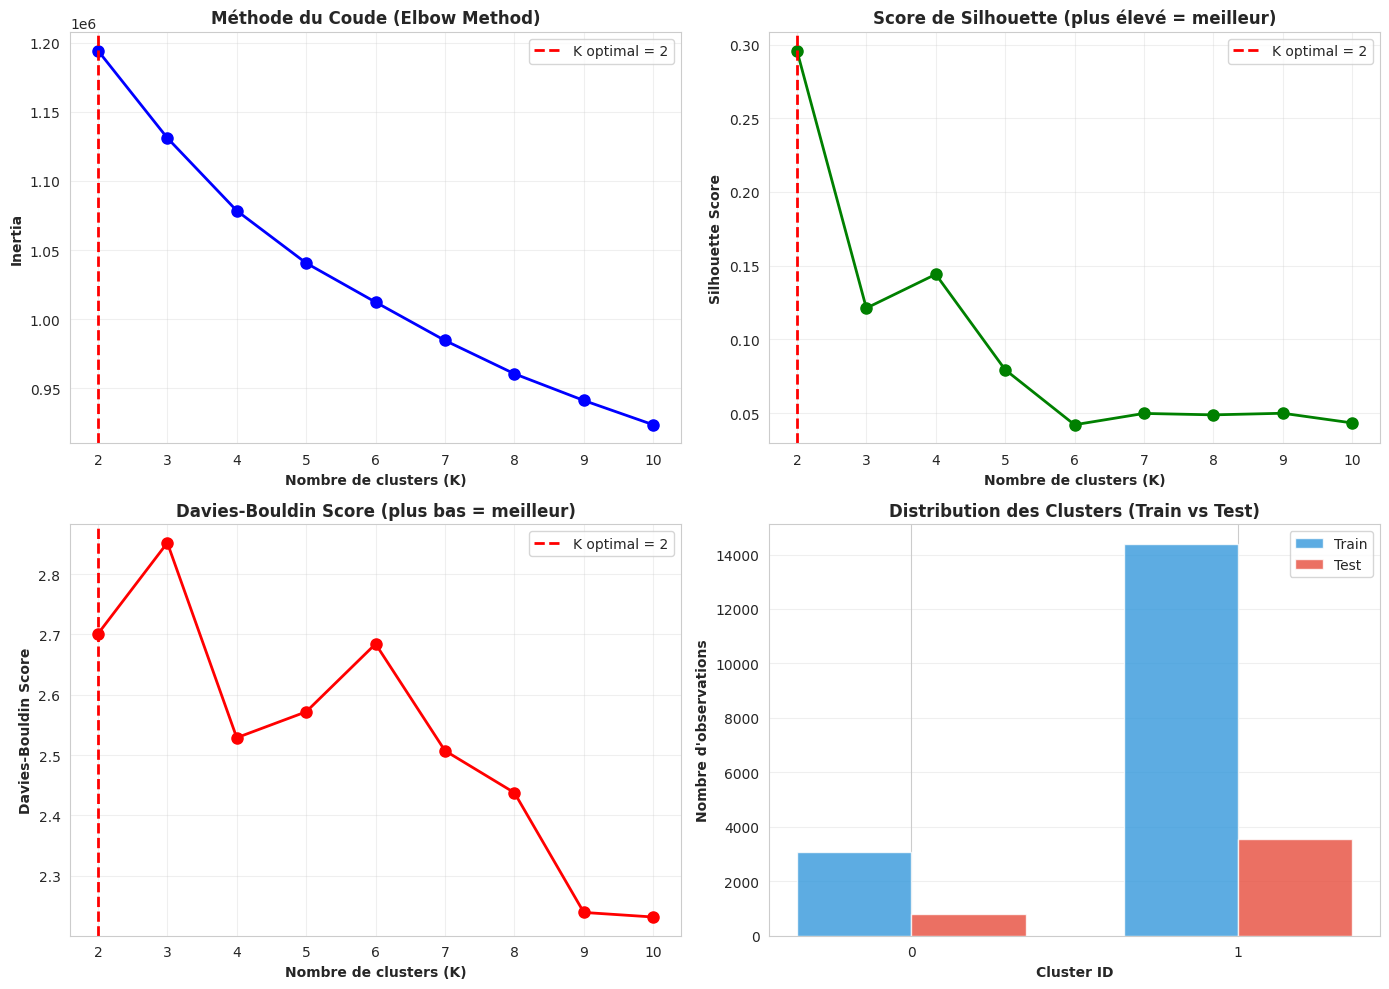

✓ Figure 1 sauvegardée: clustering_analysis.png


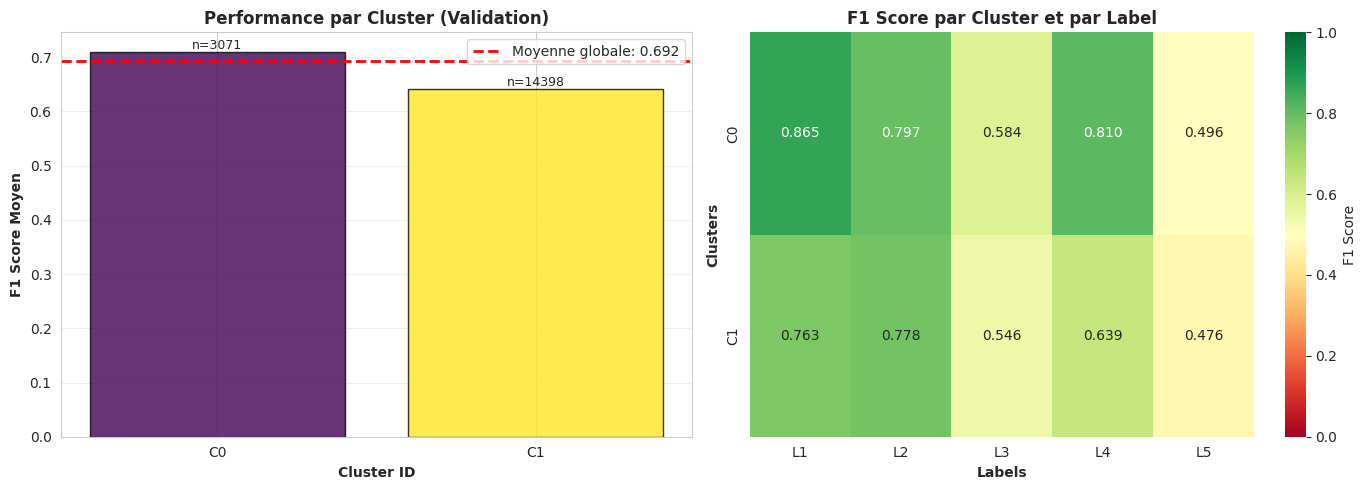

✓ Figure 2 sauvegardée: cluster_performance.png


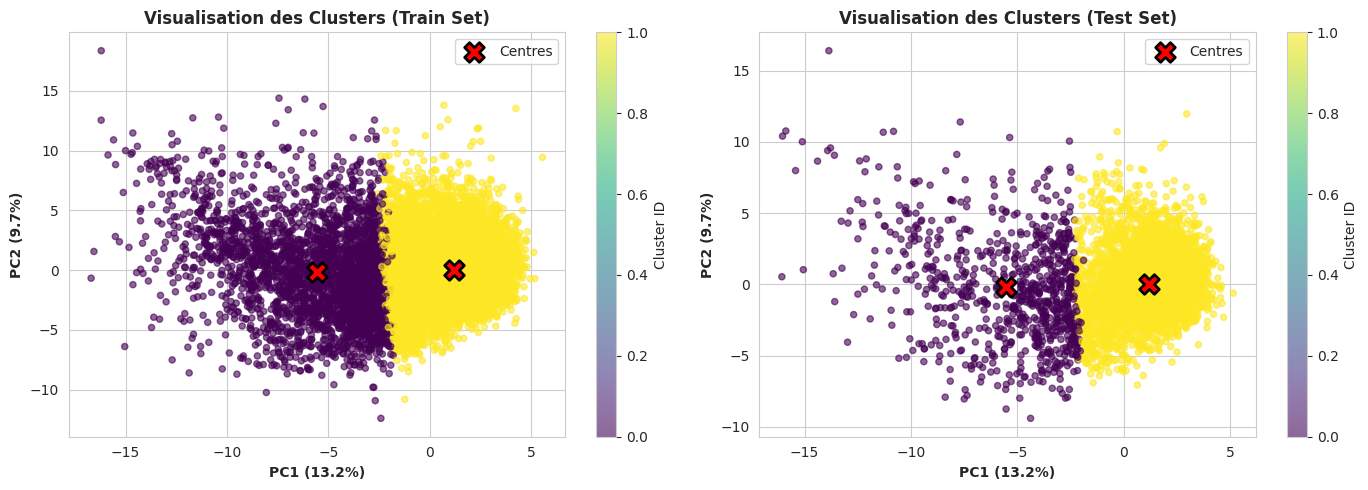

✓ Figure 3 sauvegardée: cluster_visualization.png


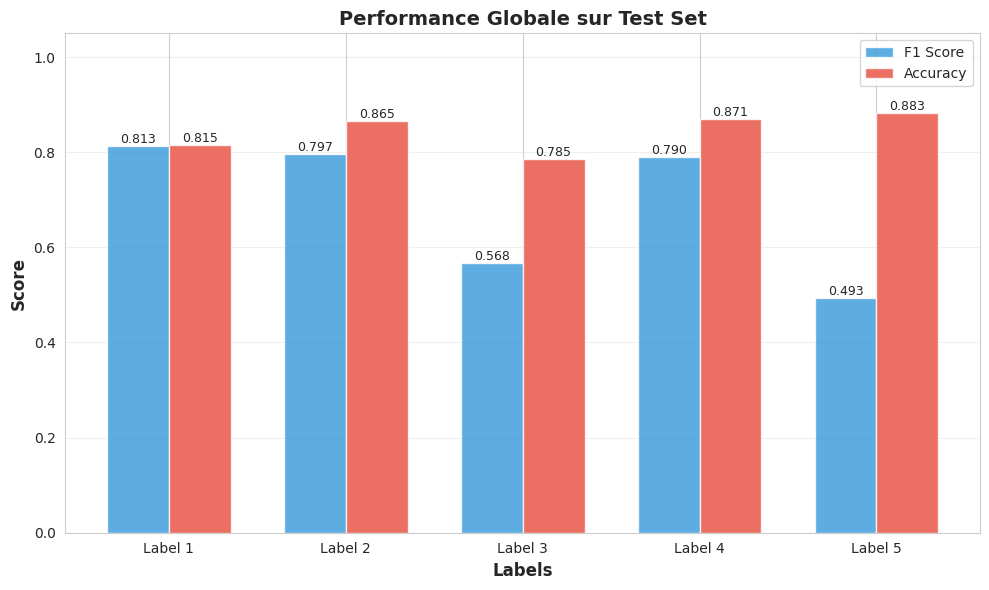

✓ Figure 4 sauvegardée: global_performance.png

ÉTAPE 8: SAUVEGARDE DES MODÈLES
✓ Pipeline complet sauvegardé: clustering_rf_pipeline.pkl
✓ Informations sauvegardées: clustering_pipeline_info.json

🎯 RÉSUMÉ FINAL DU PIPELINE

📊 CLUSTERING:
  Nombre de clusters: 2
  Silhouette Score: 0.2960
  Features clustering ajoutées: 4

🤖 MODÈLES:
  Modèles spécialisés: 2/2
  Modèle global (fallback): 1

📈 PERFORMANCE GLOBALE:
  F1 Score moyen: 0.6923
  Accuracy moyenne: 0.8439

💾 FICHIERS SAUVEGARDÉS:
  ✓ clustering_analysis.png
  ✓ cluster_performance.png
  ✓ cluster_visualization.png
  ✓ global_performance.png
  ✓ clustering_rf_pipeline.pkl
  ✓ clustering_pipeline_info.json

✅ PIPELINE COMPLET TERMINÉ!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score, accuracy_score, silhouette_score,
    davies_bouldin_score, calinski_harabasz_score
)
from sklearn.multioutput import MultiOutputClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("🔬 PIPELINE: CLUSTERING + RANDOM FOREST MULTI-MODÈLES")
print("="*70)

# =============================================================================
# ÉTAPE 1: PRÉPARATION DES DONNÉES
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 1: PRÉPARATION DES DONNÉES")
print("="*70)

# X_combined contient déjà les features ECG + cliniques
# Z contient les labels

# Split initial train/test (80/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_combined, Z, test_size=0.2, random_state=42, stratify=None
)

# Convert y_train_full and y_test to NumPy arrays immediately
y_train_full = y_train_full.to_numpy()
y_test = y_test.to_numpy()

print(f"✓ Train set: {X_train_full.shape}")
print(f"✓ Test set: {X_test.shape}")


# =============================================================================
# ÉTAPE 2: CLUSTERING SUR LES DONNÉES D'ENTRAÎNEMENT
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 2: DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS")
print("="*70)

# Standardisation pour le clustering
scaler_clustering = StandardScaler()
X_train_scaled = scaler_clustering.fit_transform(X_train_full)
X_test_scaled = scaler_clustering.transform(X_test)

# Test de différents nombres de clusters (méthode du coude)
K_range = range(2, 11)
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

print("\nTest de K = 2 à 10 clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(X_train_scaled)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_train_scaled, cluster_labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_train_scaled, cluster_labels))

    print(f"  K={k}: Silhouette={silhouette_scores[-1]:.3f}, "
          f"Davies-Bouldin={davies_bouldin_scores[-1]:.3f}")

# Sélection automatique du meilleur K (basé sur Silhouette)
best_k_idx = np.argmax(silhouette_scores)
best_k = list(K_range)[best_k_idx]

print(f"\n✓ Meilleur K sélectionné: {best_k} clusters")
print(f"  Silhouette Score: {silhouette_scores[best_k_idx]:.4f}")


# =============================================================================
# ÉTAPE 3: CLUSTERING FINAL ET AJOUT DE FEATURES
# =============================================================================
print("\n" + "="*70)
print(f"ÉTAPE 3: CLUSTERING FINAL AVEC K={best_k}")
print("="*70)

# Clustering final
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20, max_iter=500)
train_clusters = kmeans_final.fit_predict(X_train_scaled)
test_clusters = kmeans_final.predict(X_test_scaled)

# Calcul des distances aux centres de clusters
train_distances = kmeans_final.transform(X_train_scaled)
test_distances = kmeans_final.transform(X_test_scaled)

# Ajout des features de clustering
# Feature 1: ID du cluster (one-hot encoding)
train_cluster_onehot = np.eye(best_k)[train_clusters]
test_cluster_onehot = np.eye(best_k)[test_clusters]

# Feature 2: Distance au centre du cluster assigné
train_dist_to_center = train_distances[np.arange(len(train_clusters)), train_clusters].reshape(-1, 1)
test_dist_to_center = test_distances[np.arange(len(test_clusters)), test_clusters].reshape(-1, 1)

# Feature 3: Distance minimale aux autres centres
train_dist_min_other = np.zeros((len(train_clusters), 1))
test_dist_min_other = np.zeros((len(test_clusters), 1))

for i in range(len(train_clusters)):
    other_dists = np.delete(train_distances[i], train_clusters[i])
    train_dist_min_other[i] = np.min(other_dists) if len(other_dists) > 0 else 0

for i in range(len(test_clusters)):
    other_dists = np.delete(test_distances[i], test_clusters[i])
    test_dist_min_other[i] = np.min(other_dists) if len(other_dists) > 0 else 0

# Combinaison des nouvelles features
X_train_enhanced = np.hstack([
    X_train_full,
    train_cluster_onehot,
    train_dist_to_center,
    train_dist_min_other
])

X_test_enhanced = np.hstack([
    X_test,
    test_cluster_onehot,
    test_dist_to_center,
    test_dist_min_other
])

print(f"✓ Features originales: {X_train_full.shape[1]}")
print(f"✓ Features clustering ajoutées: {best_k + 2}")
print(f"✓ Total features: {X_train_enhanced.shape[1]}")

# Distribution des clusters
print(f"\nDistribution des clusters:")
for c in range(best_k):
    n_train = np.sum(train_clusters == c)
    n_test = np.sum(test_clusters == c)
    print(f"  Cluster {c}: Train={n_train} ({n_train/len(train_clusters)*100:.1f}%), "
          f"Test={n_test} ({n_test/len(test_clusters)*100:.1f}%)")


# =============================================================================
# ÉTAPE 4: ENTRAÎNEMENT D'UN MODÈLE RF PAR CLUSTER
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 4: ENTRAÎNEMENT DE MODÈLES SPÉCIALISÉS PAR CLUSTER")
print("="*70)

# Dictionnaire pour stocker les modèles
cluster_models = {}
cluster_performance = {}

for cluster_id in range(best_k):
    print(f"\n{'─'*70}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'─'*70}")

    # Sélectionner les données du cluster
    cluster_mask_train = train_clusters == cluster_id
    X_cluster = X_train_enhanced[cluster_mask_train]
    y_cluster = y_train_full[cluster_mask_train] # y_train_full is already a NumPy array

    print(f"  Taille du cluster: {X_cluster.shape[0]} observations")

    if X_cluster.shape[0] < 50:  # Minimum d'observations
        print(f"  ⚠️  Cluster trop petit, utilisation du modèle global")
        cluster_models[cluster_id] = None
        continue

    # Split validation interne (80/20)
    X_c_train, X_c_val, y_c_train, y_c_val = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=42
    )

    # Entraînement du modèle spécialisé
    base_rf = RandomForestClassifier(
        n_estimators=150,
        max_depth=12,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )

    clf_cluster = MultiOutputClassifier(base_rf, n_jobs=-1)
    clf_cluster.fit(X_c_train, y_c_train)

    # Validation
    y_c_pred = clf_cluster.predict(X_c_val)
    f1_scores_cluster = []
    for i in range(y_cluster.shape[1]):
        f1 = f1_score(y_c_val[:, i], y_c_pred[:, i], average='macro', zero_division=0)
        f1_scores_cluster.append(f1)

    avg_f1_cluster = np.mean(f1_scores_cluster)

    print(f"  ✓ Modèle entraîné")
    print(f"  F1 Score validation: {avg_f1_cluster:.4f}")
    print(f"  F1 par label: {[f'{f:.3f}' for f in f1_scores_cluster]}")

    # Sauvegarder le modèle et ses performances
    cluster_models[cluster_id] = clf_cluster
    cluster_performance[cluster_id] = {
        'f1_scores': f1_scores_cluster,
        'avg_f1': avg_f1_cluster,
        'n_samples': X_cluster.shape[0]
    }

# Modèle global de fallback (pour clusters trop petits)
print(f"\n{'─'*70}")
print("MODÈLE GLOBAL (FALLBACK)")
print(f"{'─'*70}")

base_rf_global = RandomForestClassifier(
    n_estimators=150,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
clf_global = MultiOutputClassifier(base_rf_global, n_jobs=-1)
clf_global.fit(X_train_enhanced, y_train_full)
print("✓ Modèle global entraîné")


# =============================================================================
# ÉTAPE 5: PRÉDICTION SUR LE TEST SET
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 5: PRÉDICTION SUR LE TEST SET")
print("="*70)

# Initialiser les prédictions
y_pred = np.zeros_like(y_test)

# Prédire avec le modèle approprié pour chaque cluster
for cluster_id in range(best_k):
    cluster_mask_test = test_clusters == cluster_id
    n_test_cluster = np.sum(cluster_mask_test)

    if n_test_cluster == 0:
        continue

    X_test_cluster = X_test_enhanced[cluster_mask_test]

    # Utiliser le modèle spécialisé ou global
    if cluster_models[cluster_id] is not None:
        y_pred[cluster_mask_test] = cluster_models[cluster_id].predict(X_test_cluster)
        print(f"  Cluster {cluster_id}: {n_test_cluster} observations (modèle spécialisé)")
    else:
        y_pred[cluster_mask_test] = clf_global.predict(X_test_cluster)
        print(f"  Cluster {cluster_id}: {n_test_cluster} observations (modèle global)")

print("\n✓ Prédictions complètes")


# =============================================================================
# ÉTAPE 6: ÉVALUATION GLOBALE
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 6: ÉVALUATION DES PERFORMANCES")
print("="*70)

# Métriques globales
n_labels = y_test.shape[1]
f1_scores_global = []
acc_scores_global = []

print("\nPerformances par label:")
for i in range(n_labels):
    f1 = f1_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0)
    acc = accuracy_score(y_test[:, i], y_pred[:, i])
    f1_scores_global.append(f1)
    acc_scores_global.append(acc)
    print(f"  Label {i+1}: F1={f1:.4f}, Accuracy={acc:.4f}")

avg_f1_global = np.mean(f1_scores_global)
avg_acc_global = np.mean(acc_scores_global)

print(f"\n{'─'*70}")
print(f"📊 MOYENNES GLOBALES:")
print(f"  F1 Score: {avg_f1_global:.4f}")
print(f"  Accuracy: {avg_acc_global:.4f}")
print(f"{'─'*70}")


# =============================================================================
# ÉTAPE 7: VISUALISATIONS
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 7: GÉNÉRATION DES VISUALISATIONS")
print("="*70)

# FIGURE 1: Méthode du coude et métriques de clustering
fig1, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1.1: Inertia (méthode du coude)
ax1 = axes[0, 0]
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.axvline(best_k, color='red', linestyle='--', linewidth=2, label=f'K optimal = {best_k}')
ax1.set_xlabel('Nombre de clusters (K)', fontweight='bold')
ax1.set_ylabel('Inertia', fontweight='bold')
ax1.set_title('Méthode du Coude (Elbow Method)', fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# 1.2: Silhouette Score
ax2 = axes[0, 1]
ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.axvline(best_k, color='red', linestyle='--', linewidth=2, label=f'K optimal = {best_k}')
ax2.set_xlabel('Nombre de clusters (K)', fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontweight='bold')
ax2.set_title('Score de Silhouette (plus élevé = meilleur)', fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 1.3: Davies-Bouldin Score
ax3 = axes[1, 0]
ax3.plot(K_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
ax3.axvline(best_k, color='red', linestyle='--', linewidth=2, label=f'K optimal = {best_k}')
ax3.set_xlabel('Nombre de clusters (K)', fontweight='bold')
ax3.set_ylabel('Davies-Bouldin Score', fontweight='bold')
ax3.set_title('Davies-Bouldin Score (plus bas = meilleur)', fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 1.4: Distribution des clusters
ax4 = axes[1, 1]
cluster_counts_train = [np.sum(train_clusters == c) for c in range(best_k)]
cluster_counts_test = [np.sum(test_clusters == c) for c in range(best_k)]
x = np.arange(best_k)
width = 0.35
ax4.bar(x - width/2, cluster_counts_train, width, label='Train', alpha=0.8, color='#3498db')
ax4.bar(x + width/2, cluster_counts_test, width, label='Test', alpha=0.8, color='#e74c3c')
ax4.set_xlabel('Cluster ID', fontweight='bold')
ax4.set_ylabel('Nombre d\'observations', fontweight='bold')
ax4.set_title('Distribution des Clusters (Train vs Test)', fontweight='bold')
ax4.set_xticks(x)
ax4.legend()
ax4.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('clustering_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Figure 1 sauvegardée: clustering_analysis.png")


# FIGURE 2: Performance par cluster
fig2, axes = plt.subplots(1, 2, figsize=(14, 5))

# 2.1: F1 scores par cluster
ax1 = axes[0]
clusters_with_models = [c for c in range(best_k) if cluster_models[c] is not None]
f1_by_cluster = [cluster_performance[c]['avg_f1'] for c in clusters_with_models]
sizes_by_cluster = [cluster_performance[c]['n_samples'] for c in clusters_with_models]

colors = plt.cm.viridis(np.linspace(0, 1, len(clusters_with_models)))
bars = ax1.bar(range(len(clusters_with_models)), f1_by_cluster, color=colors, alpha=0.8, edgecolor='black')
ax1.axhline(avg_f1_global, color='red', linestyle='--', linewidth=2, label=f'Moyenne globale: {avg_f1_global:.3f}')
ax1.set_xlabel('Cluster ID', fontweight='bold')
ax1.set_ylabel('F1 Score Moyen', fontweight='bold')
ax1.set_title('Performance par Cluster (Validation)', fontweight='bold')
ax1.set_xticks(range(len(clusters_with_models)))
ax1.set_xticklabels([f'C{c}' for c in clusters_with_models])
ax1.legend()
ax1.grid(alpha=0.3, axis='y')

# Ajouter le nombre d'observations sur les barres
for i, (bar, size) in enumerate(zip(bars, sizes_by_cluster)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'n={size}', ha='center', va='bottom', fontsize=9)

# 2.2: Heatmap F1 scores par cluster et par label
ax2 = axes[1]
f1_matrix = []
cluster_labels = []
for c in clusters_with_models:
    f1_matrix.append(cluster_performance[c]['f1_scores'])
    cluster_labels.append(f'C{c}')

if len(f1_matrix) > 0:
    f1_matrix = np.array(f1_matrix)
    sns.heatmap(f1_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
                xticklabels=[f'L{i+1}' for i in range(n_labels)],
                yticklabels=cluster_labels, ax=ax2,
                cbar_kws={'label': 'F1 Score'}, vmin=0, vmax=1)
    ax2.set_title('F1 Score par Cluster et par Label', fontweight='bold')
    ax2.set_xlabel('Labels', fontweight='bold')
    ax2.set_ylabel('Clusters', fontweight='bold')

plt.tight_layout()
plt.savefig('cluster_performance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Figure 2 sauvegardée: cluster_performance.png")


# FIGURE 3: Visualisation 2D des clusters (PCA)
from sklearn.decomposition import PCA

fig3, axes = plt.subplots(1, 2, figsize=(14, 5))

pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3.1: Clusters sur train set
ax1 = axes[0]
scatter = ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                     c=train_clusters, cmap='viridis', alpha=0.6, s=20)
centers_pca = pca.transform(kmeans_final.cluster_centers_)
ax1.scatter(centers_pca[:, 0], centers_pca[:, 1],
           c='red', marker='X', s=200, edgecolors='black', linewidths=2,
           label='Centres')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
ax1.set_title('Visualisation des Clusters (Train Set)', fontweight='bold')
ax1.legend()
plt.colorbar(scatter, ax=ax1, label='Cluster ID')

# 3.2: Clusters sur test set
ax2 = axes[1]
scatter = ax2.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                     c=test_clusters, cmap='viridis', alpha=0.6, s=20)
ax2.scatter(centers_pca[:, 0], centers_pca[:, 1],
           c='red', marker='X', s=200, edgecolors='black', linewidths=2,
           label='Centres')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
ax2.set_title('Visualisation des Clusters (Test Set)', fontweight='bold')
ax2.legend()
plt.colorbar(scatter, ax=ax2, label='Cluster ID')

plt.tight_layout()
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Figure 3 sauvegardée: cluster_visualization.png")


# FIGURE 4: Comparaison des performances globales
fig4, ax = plt.subplots(1, 1, figsize=(10, 6))

labels_names = [f'Label {i+1}' for i in range(n_labels)]
x = np.arange(n_labels)
width = 0.35

bars1 = ax.bar(x - width/2, f1_scores_global, width, label='F1 Score', alpha=0.8, color='#3498db')
bars2 = ax.bar(x + width/2, acc_scores_global, width, label='Accuracy', alpha=0.8, color='#e74c3c')

ax.set_xlabel('Labels', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Performance Globale sur Test Set', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels_names)
ax.legend()
ax.grid(alpha=0.3, axis='y')
ax.set_ylim([0, 1.05])

# Ajouter les valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('global_performance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Figure 4 sauvegardée: global_performance.png")


# =============================================================================
# ÉTAPE 8: SAUVEGARDE
# =============================================================================
print("\n" + "="*70)
print("ÉTAPE 8: SAUVEGARDE DES MODÈLES")
print("="*70)

# Sauvegarder tous les modèles et le clustering
model_package = {
    'kmeans': kmeans_final,
    'scaler': scaler_clustering,
    'cluster_models': cluster_models,
    'global_model': clf_global,
    'best_k': best_k,
    'cluster_performance': cluster_performance
}

with open('clustering_rf_pipeline.pkl', 'wb') as f:
    pickle.dump(model_package, f)
print("✓ Pipeline complet sauvegardé: clustering_rf_pipeline.pkl")

# Informations
pipeline_info = {
    'best_k': best_k,
    'n_features_original': X_combined.shape[1],
    'n_features_enhanced': X_train_enhanced.shape[1],
    'f1_scores': {f'label_{i+1}': float(f1) for i, f1 in enumerate(f1_scores_global)},
    'avg_f1': float(avg_f1_global),
    'avg_accuracy': float(avg_acc_global),
    'cluster_sizes_train': {f'cluster_{c}': int(np.sum(train_clusters == c)) for c in range(best_k)},
    'cluster_sizes_test': {f'cluster_{c}': int(np.sum(test_clusters == c)) for c in range(best_k)}
}

import json
with open('clustering_pipeline_info.json', 'w') as f:
    json.dump(pipeline_info, f, indent=2)
print("✓ Informations sauvegardées: clustering_pipeline_info.json")


# =============================================================================
# RÉSUMÉ FINAL
# =============================================================================
print("\n" + "="*70)
print("🎯 RÉSUMÉ FINAL DU PIPELINE")
print("="*70)
print(f"\n📊 CLUSTERING:")
print(f"  Nombre de clusters: {best_k}")
print(f"  Silhouette Score: {silhouette_scores[best_k_idx]:.4f}")
print(f"  Features clustering ajoutées: {best_k + 2}")
print(f"\n🤖 MODÈLES:")
print(f"  Modèles spécialisés: {sum(1 for m in cluster_models.values() if m is not None)}/{best_k}")
print(f"  Modèle global (fallback): 1")
print(f"\n📈 PERFORMANCE GLOBALE:")
print(f"  F1 Score moyen: {avg_f1_global:.4f}")
print(f"  Accuracy moyenne: {avg_acc_global:.4f}")
print(f"\n💾 FICHIERS SAUVEGARDÉS:")
print(f"  ✓ clustering_analysis.png")
print(f"  ✓ cluster_performance.png")
print(f"  ✓ cluster_visualization.png")
print(f"  ✓ global_performance.png")
print(f"  ✓ clustering_rf_pipeline.pkl")
print(f"  ✓ clustering_pipeline_info.json")
print(f"\n" + "="*70)
print("✅ PIPELINE COMPLET TERMINÉ!")
print("="*70)